<h1>Visualize Them All</h1>
Use the data that is done formatting by the iPython Notebook 'Medalist Analyzer'

In [24]:
import pandas as pd
import sys

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

In [25]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

In [26]:
data = pd.read_csv('generated data/formated-all-1896-2012.csv')

In [27]:
data = data.drop(['Unnamed: 0'], 1)
data.head()

Discipline                          Event Event gender   Medal  NOC  \
0  Taekwondo                        - 58 kg            M  Bronze  AFG   
1    Sailing            board (division II)            M  Silver  AHO   
2     Boxing                        71-75kg            M  Bronze  ALG   
3     Boxing                        71-75kg            M  Bronze  ALG   
4     Boxing  75 - 81kg (light-heavyweight)            M  Bronze  ALG   

       Sport  Year  
0  Taekwondo  2008  
1    Sailing  1988  
2     Boxing  1984  
3     Boxing  1996  
4     Boxing  1984

<h1>Cumulative Gold Medal Counter</h1>
This visualization plots the cumulative gold medals received by each country in each sports
We can know which countries have been dominating which sports and also which countries started to rise as a power.

In [29]:
sports_count = len(list(set(data['Sport'])))
sports_count

43

/Users/wangchi-an/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1900.0, right=1900.0
  'left=%s, right=%s') % (left, right))
/Users/wangchi-an/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2012.0, right=2012.0
  'left=%s, right=%s') % (left, right))
/Users/wangchi-an/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/wangchi-an/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_base

ERROR! Session/line number was not unique in database. History logging moved to new session 134


/Users/wangchi-an/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1908.0, right=1908.0
  'left=%s, right=%s') % (left, right))


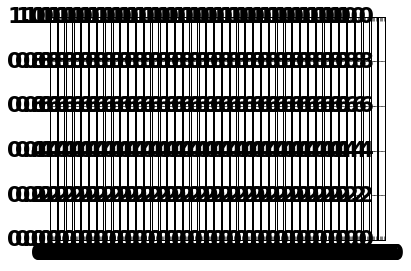

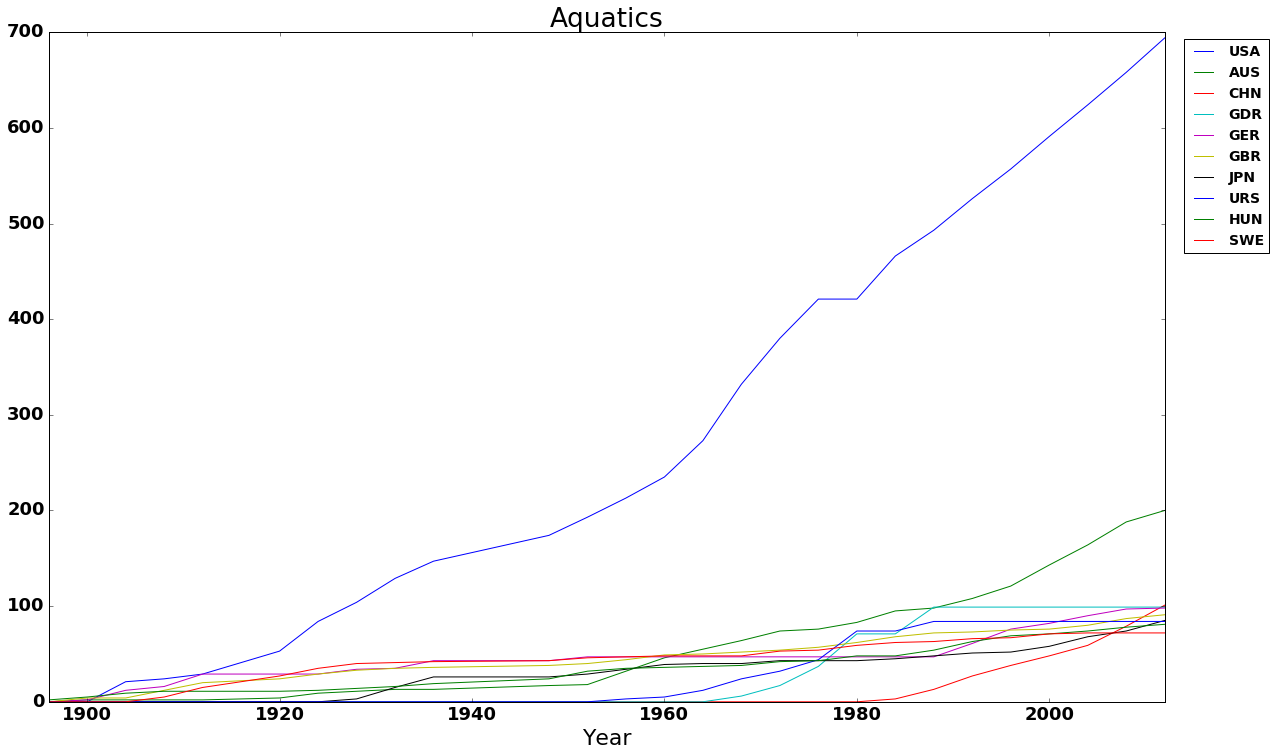

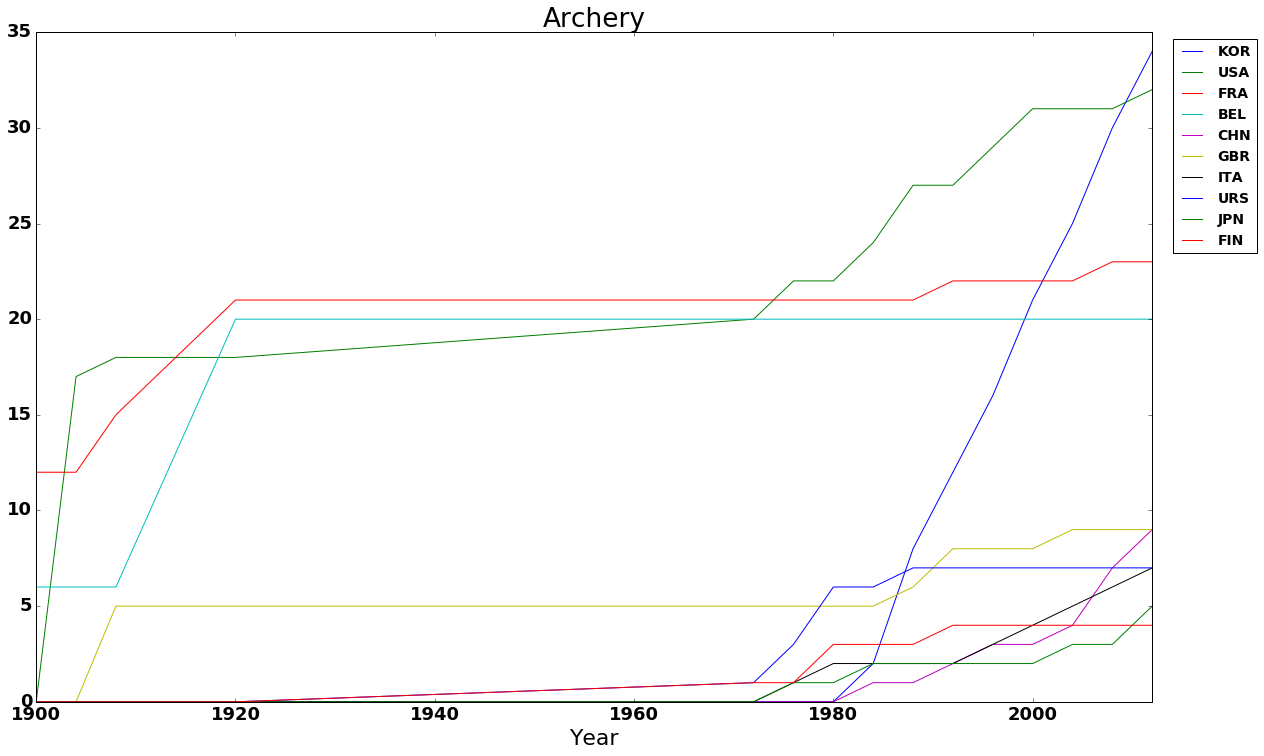

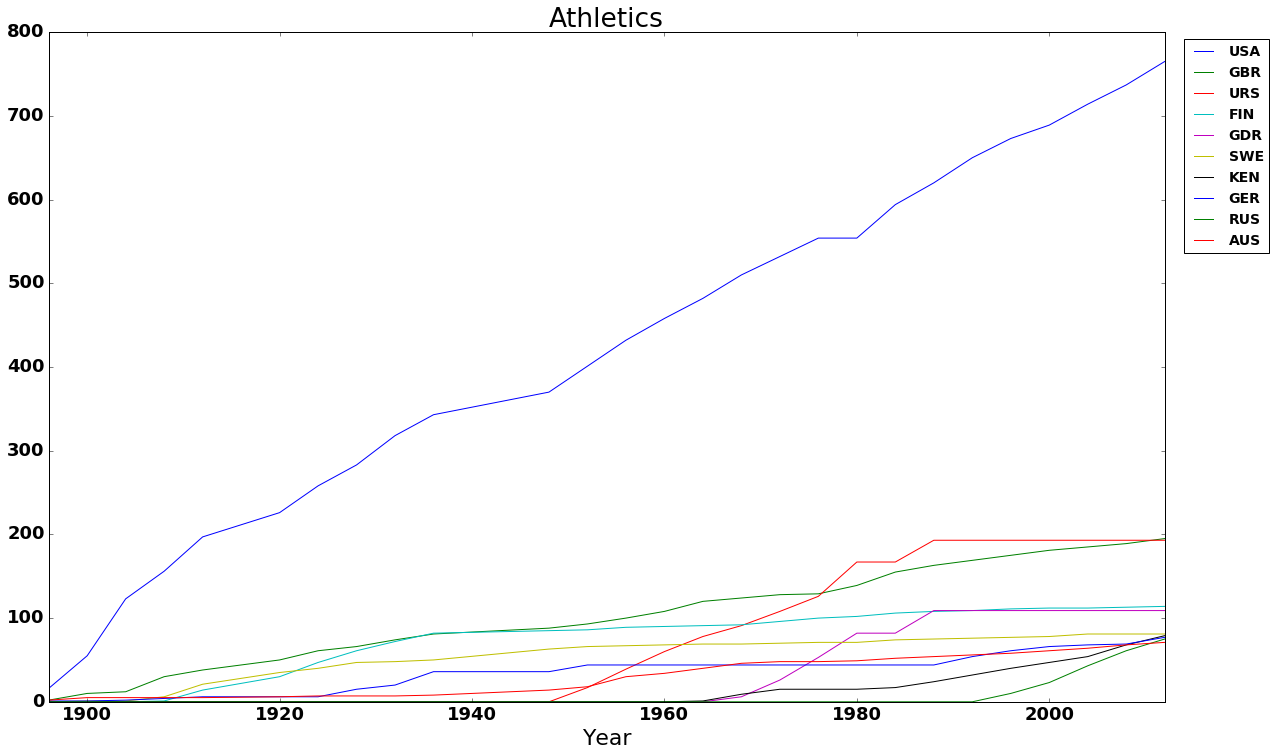

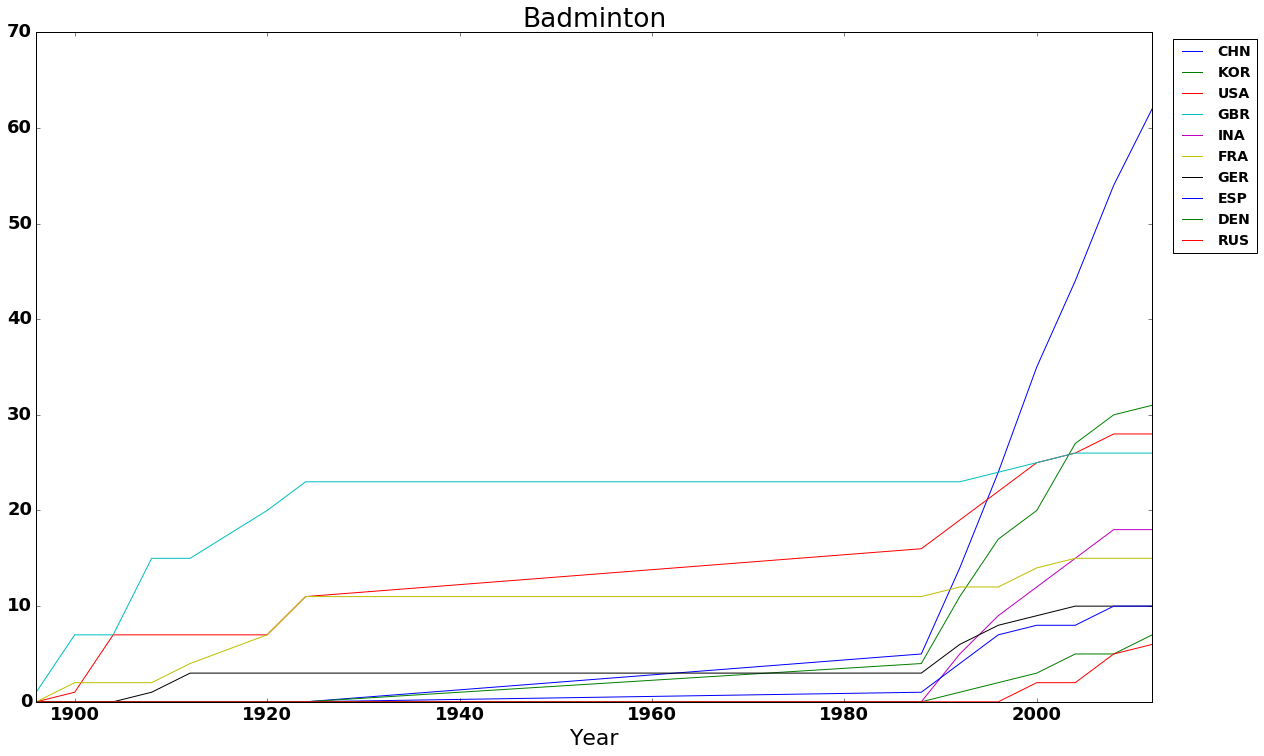

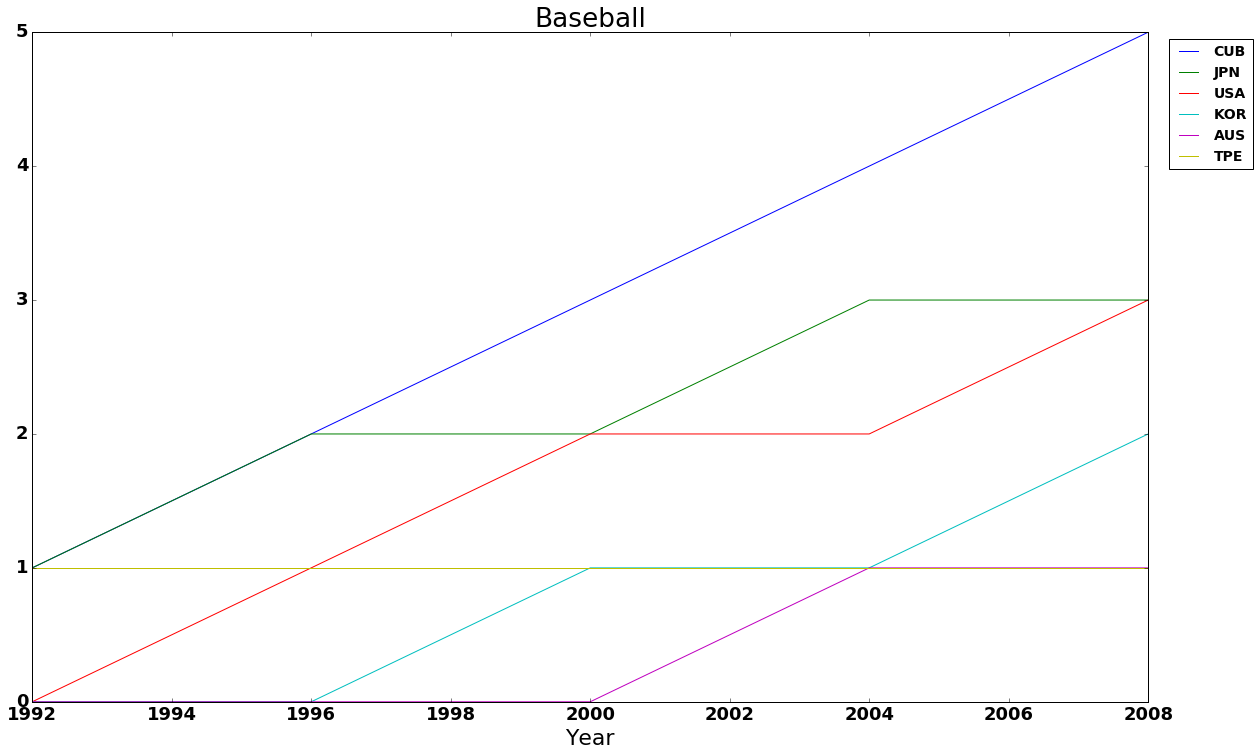

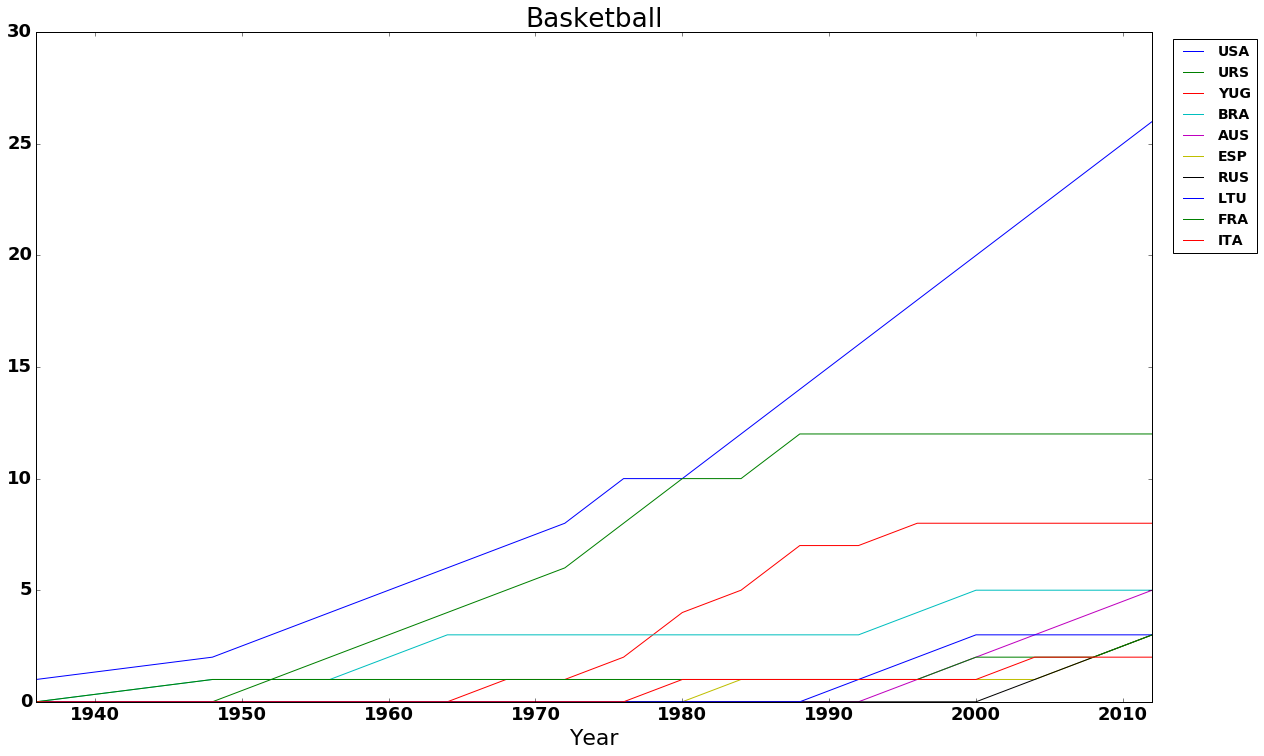

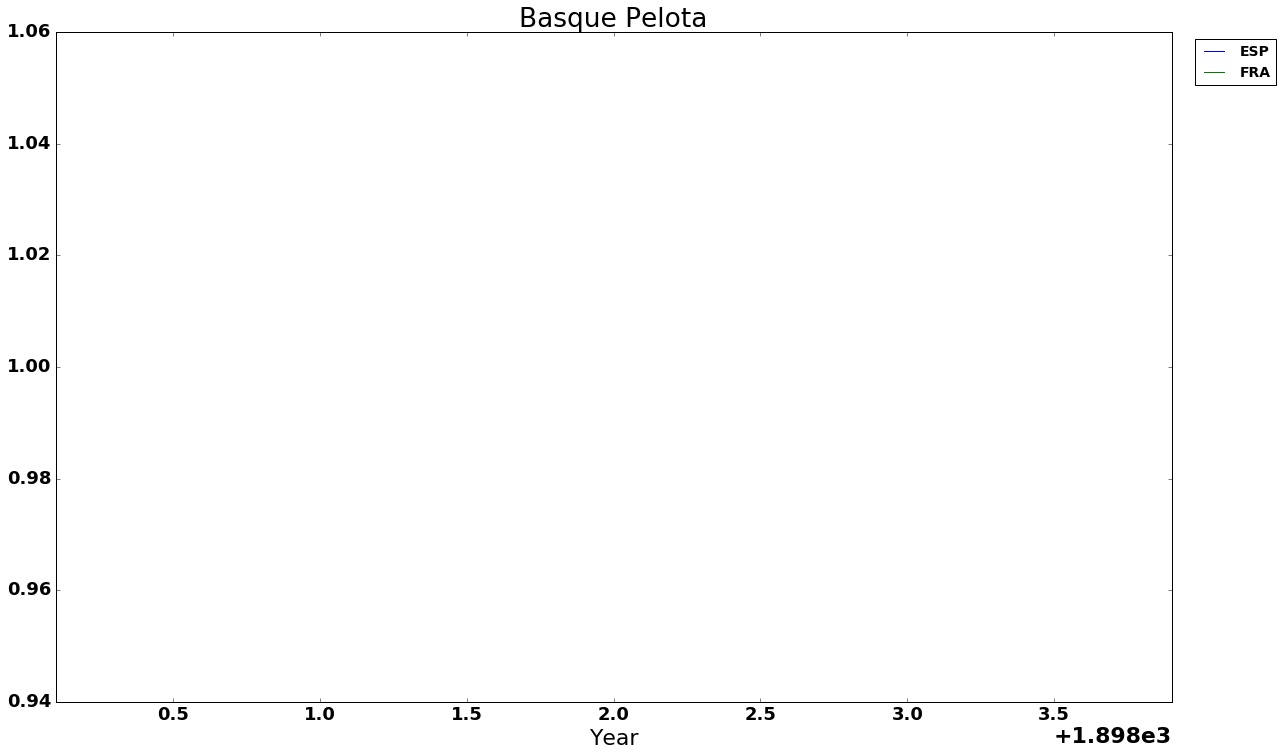

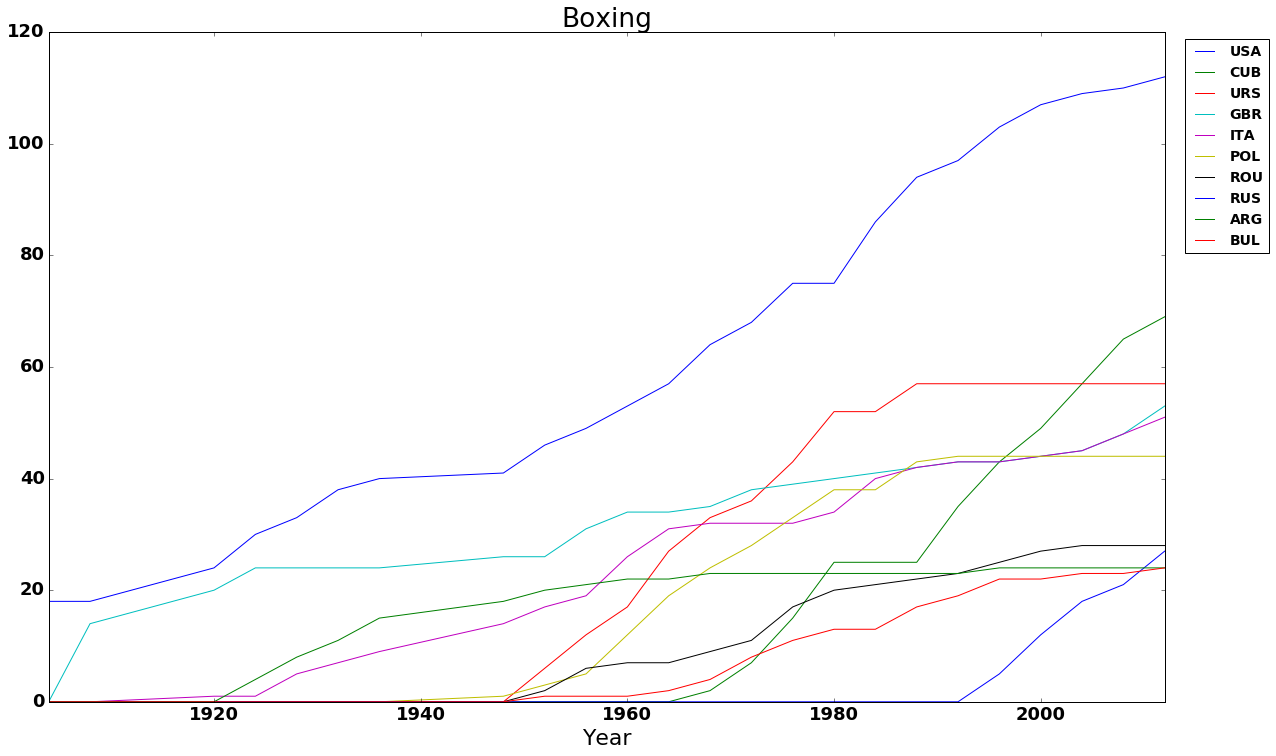

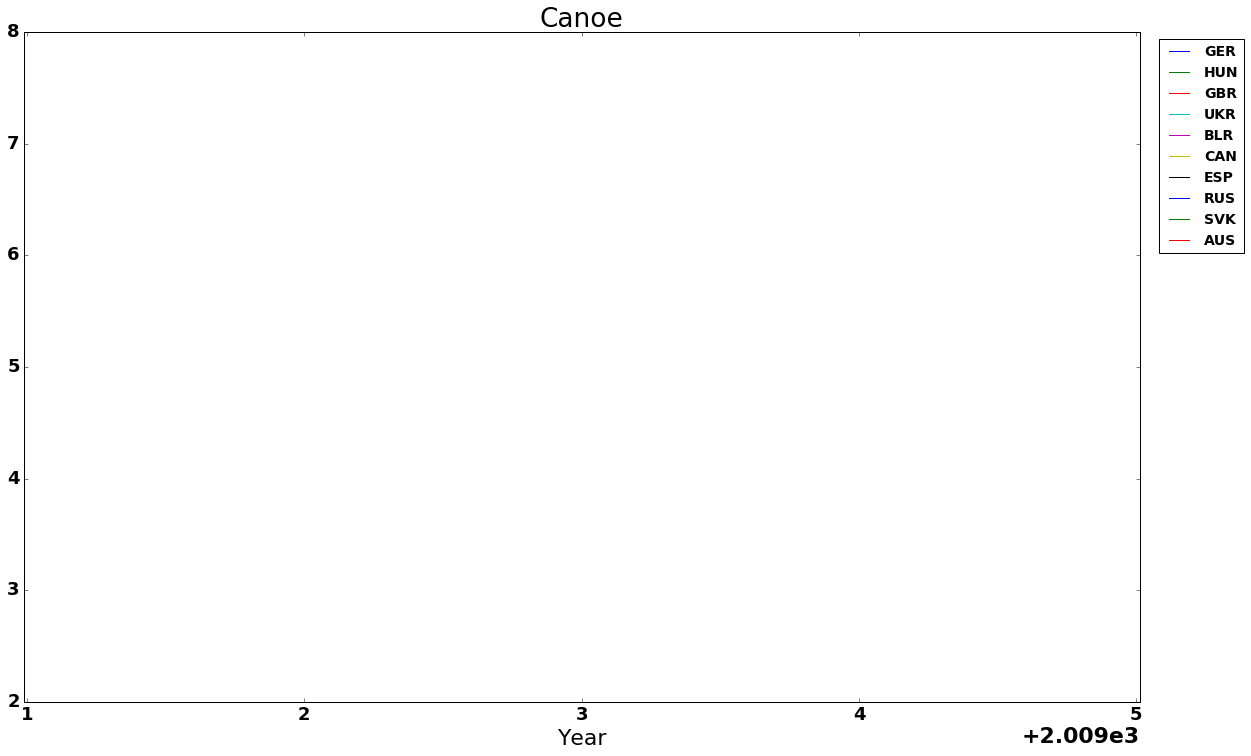

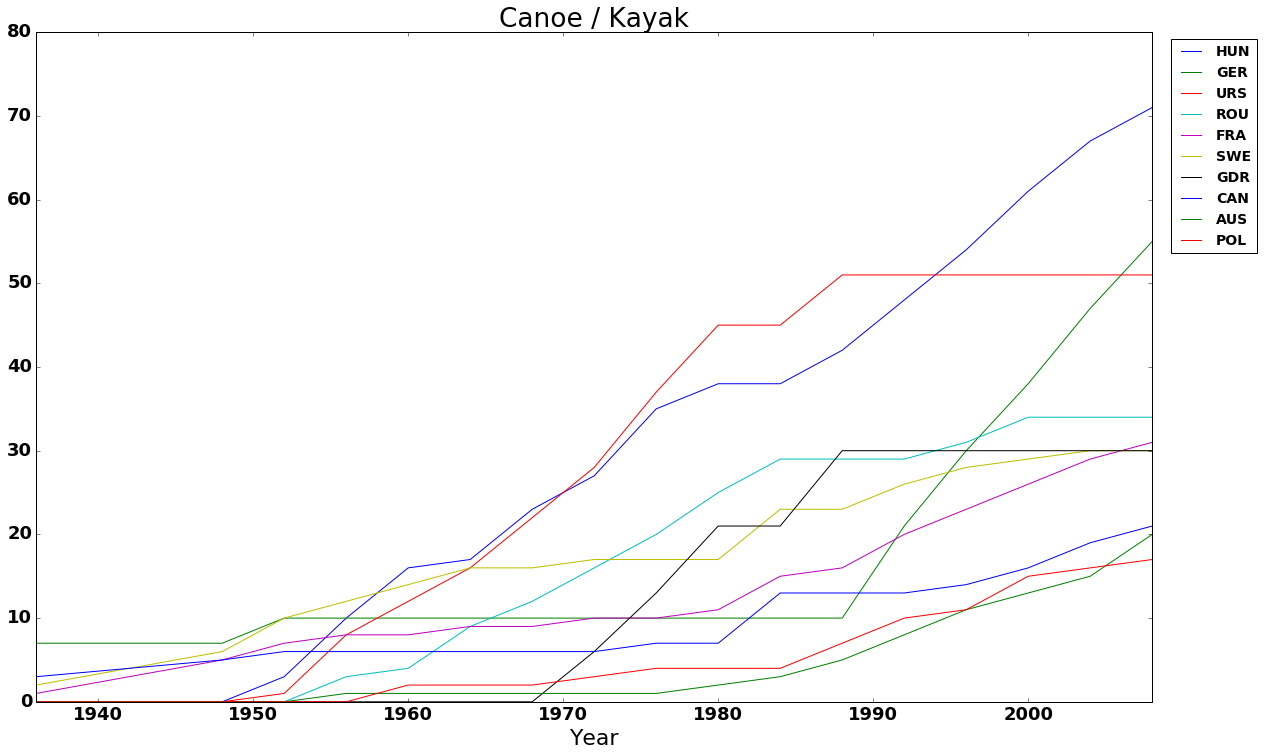

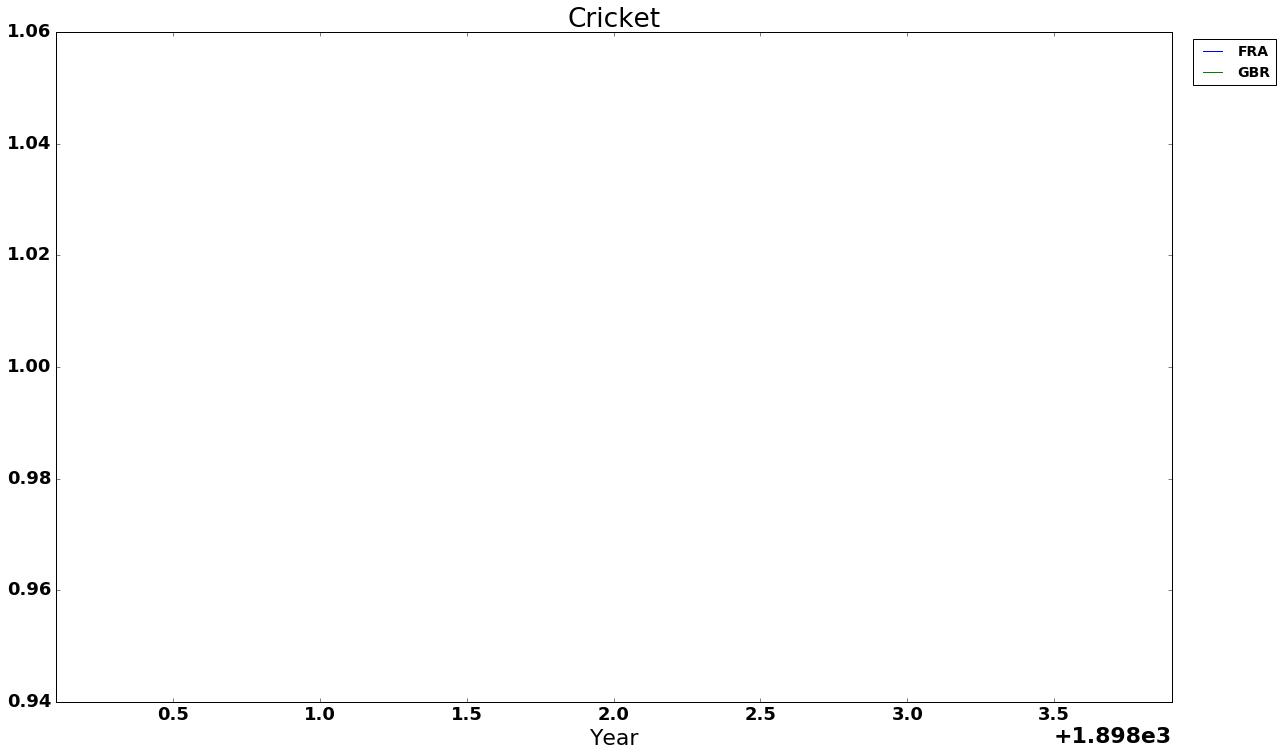

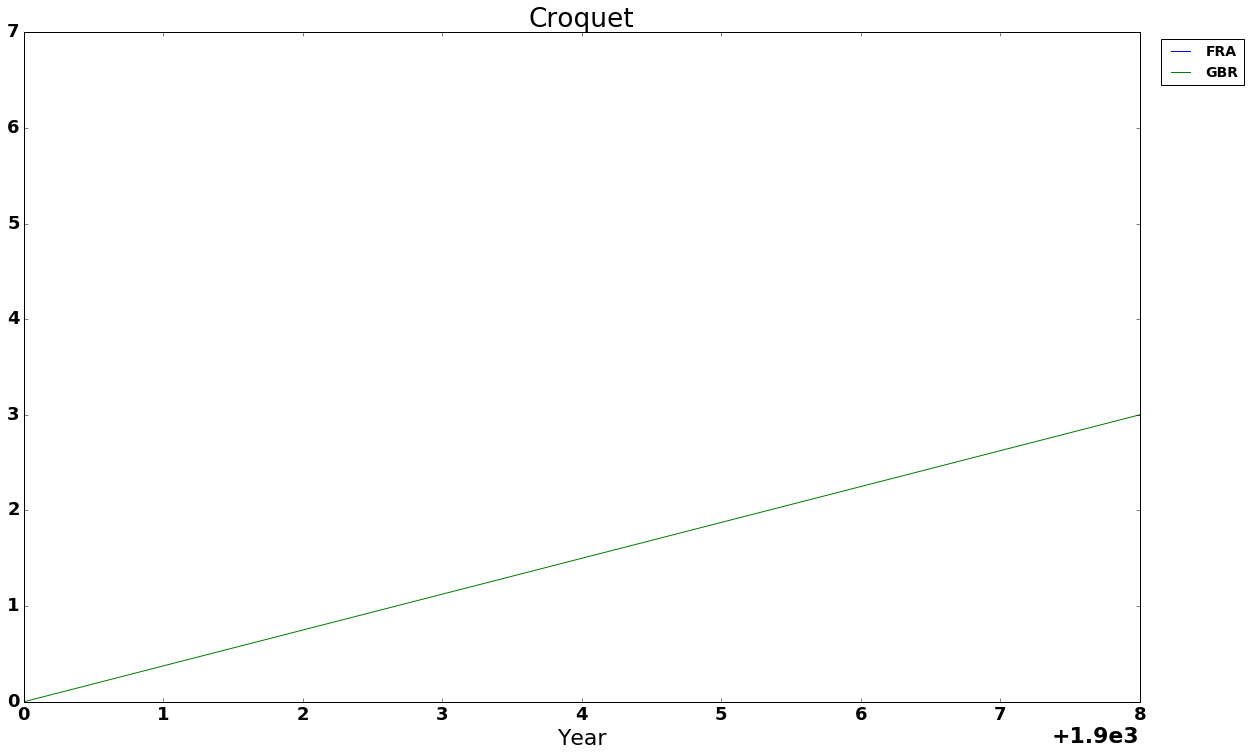

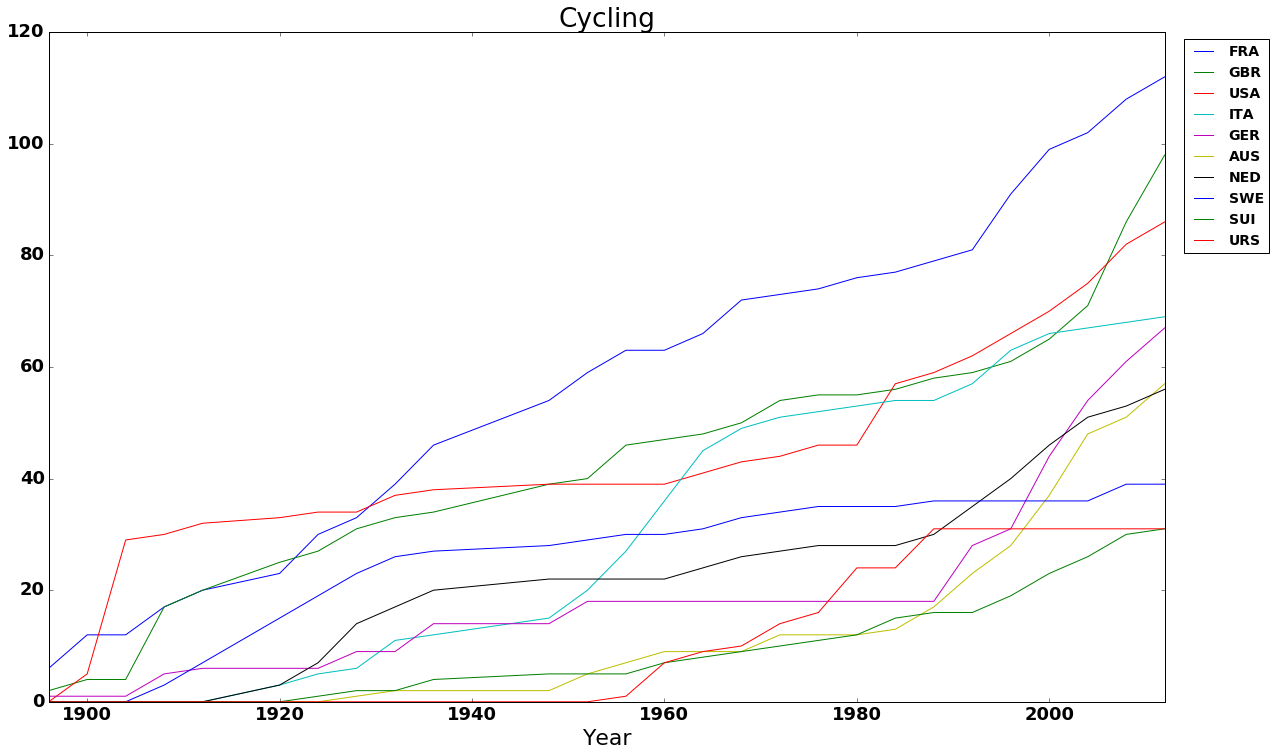

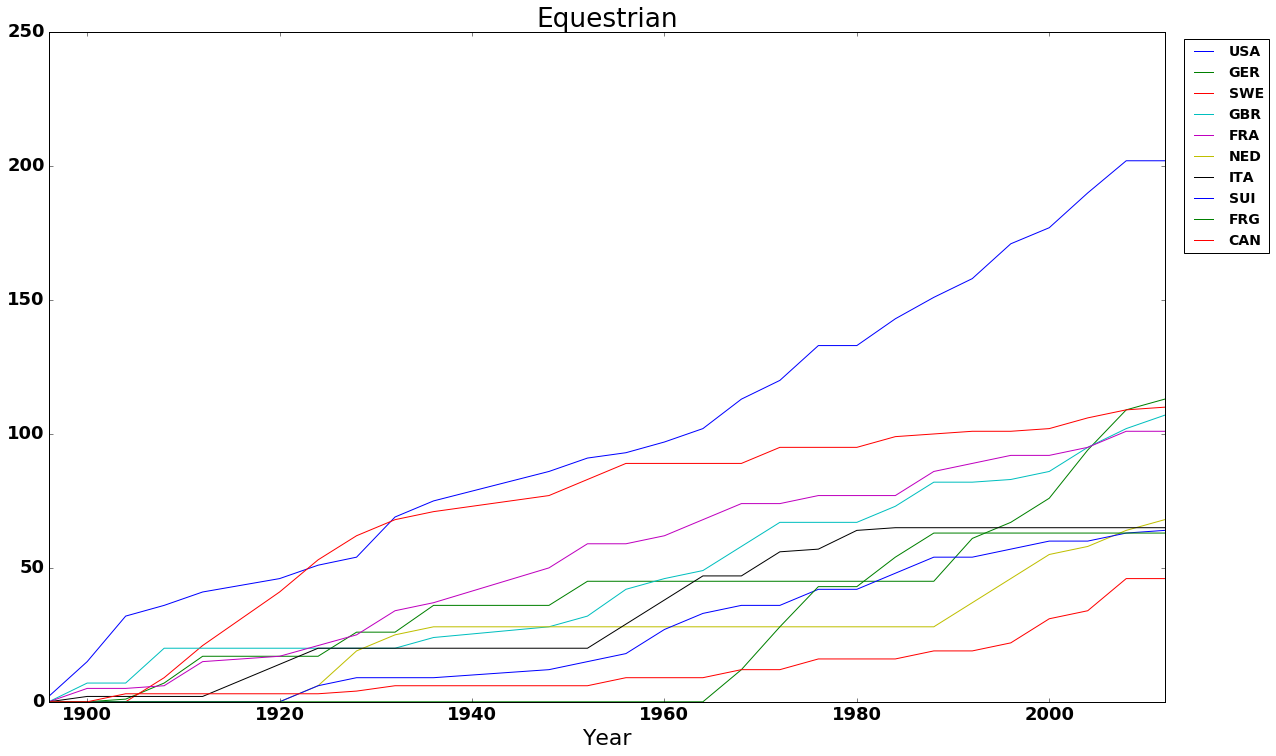

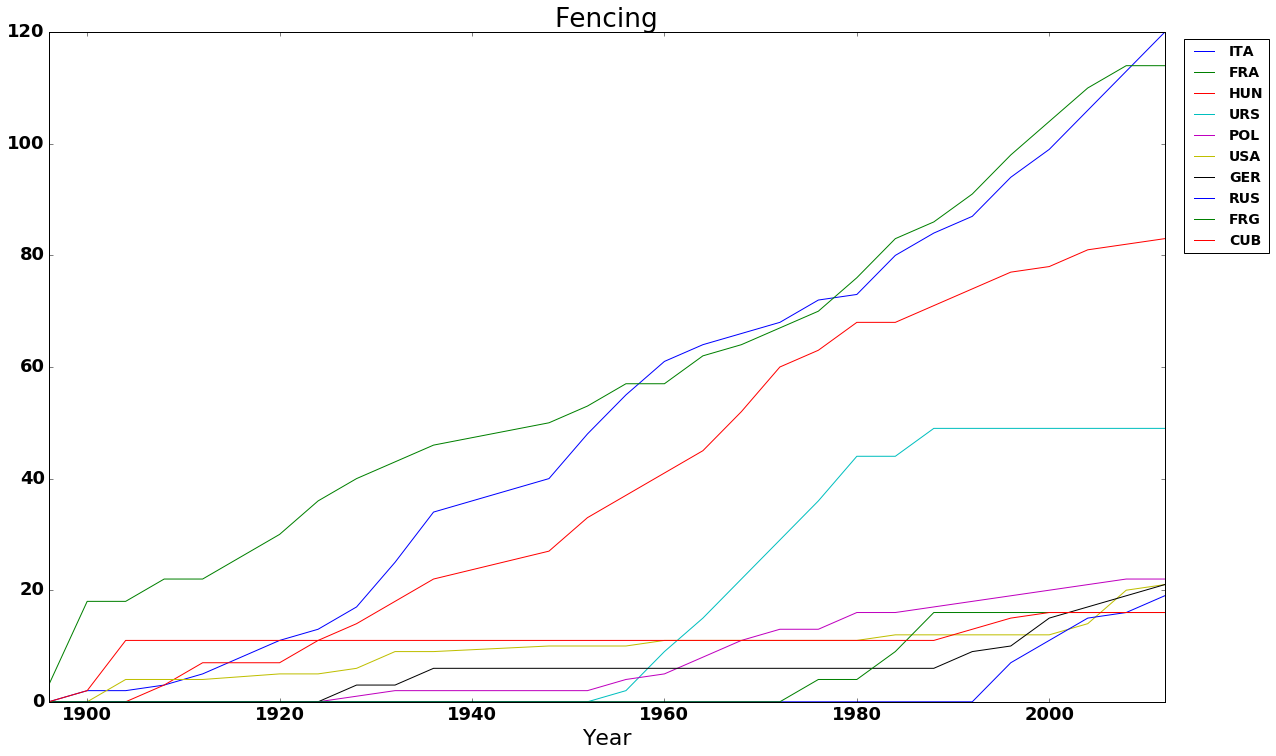

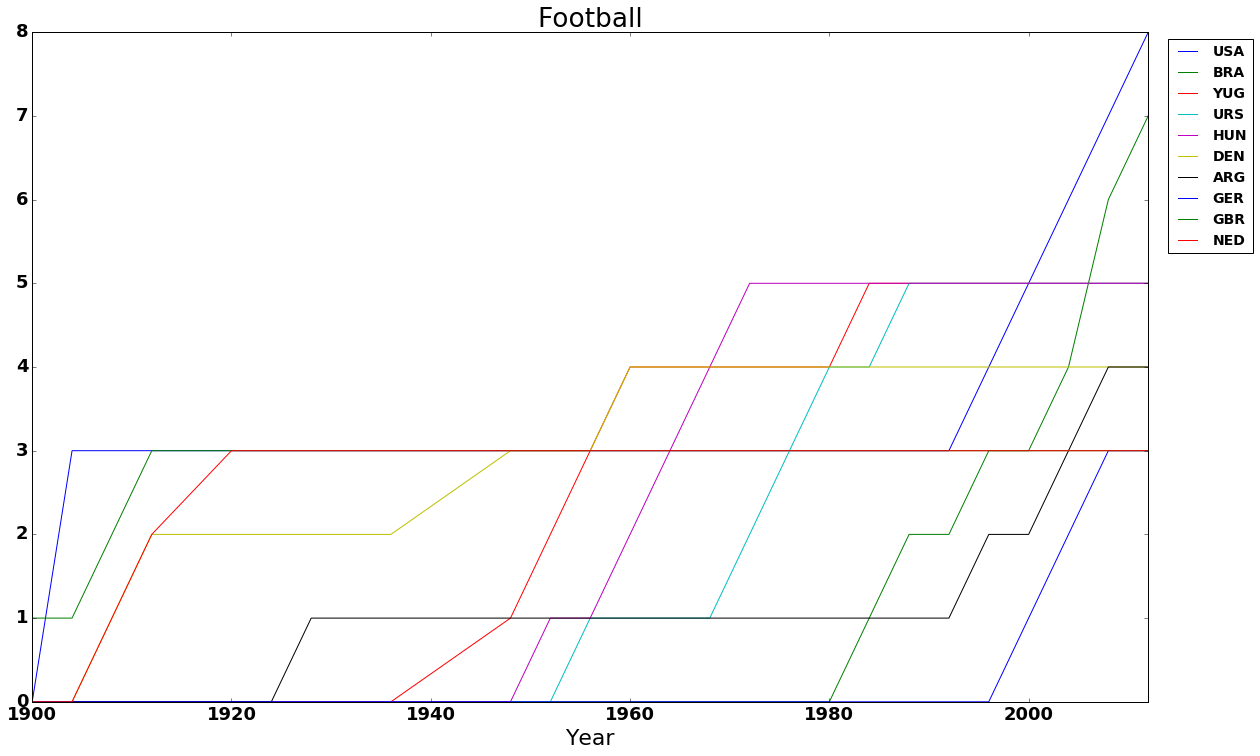

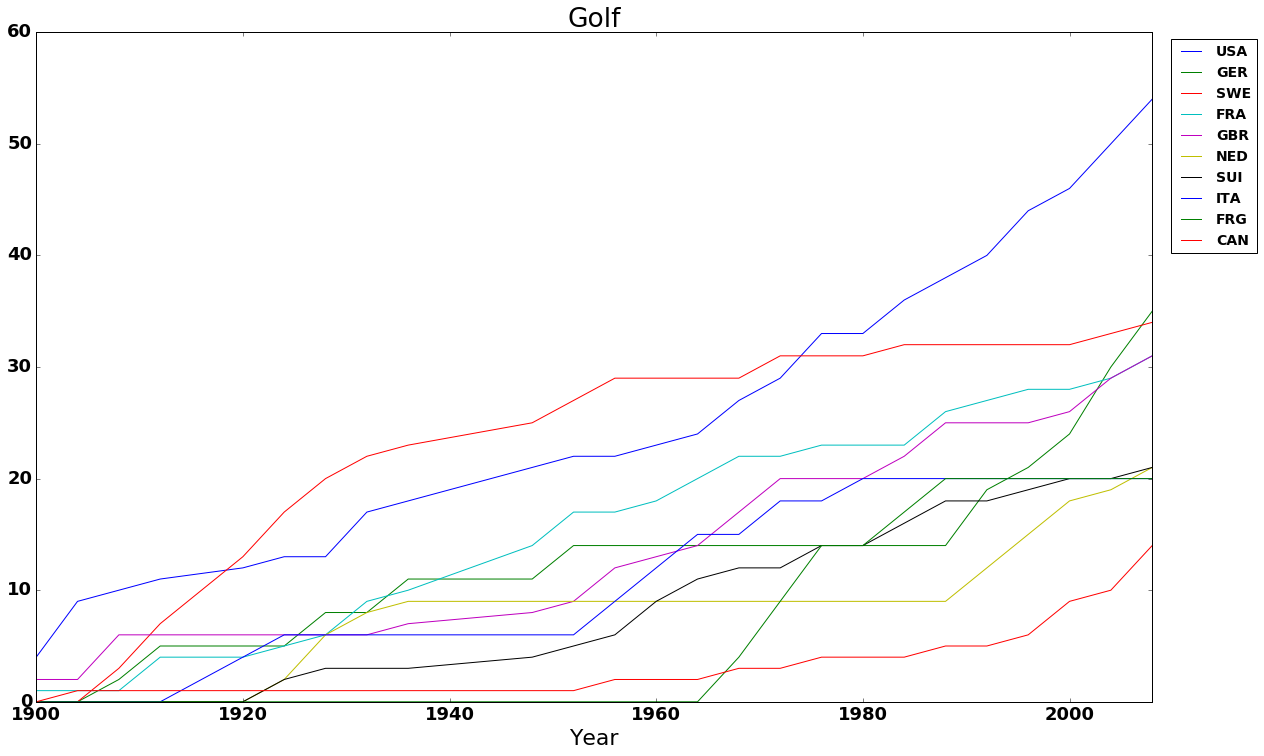

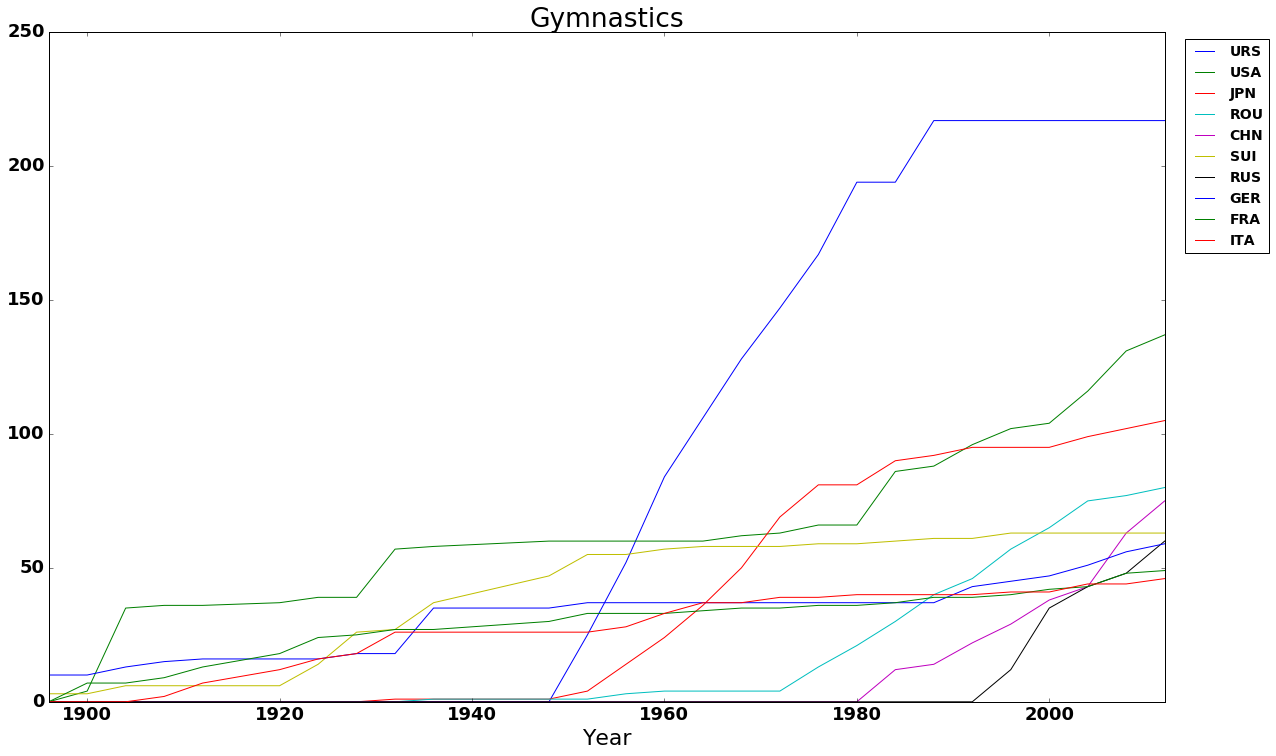

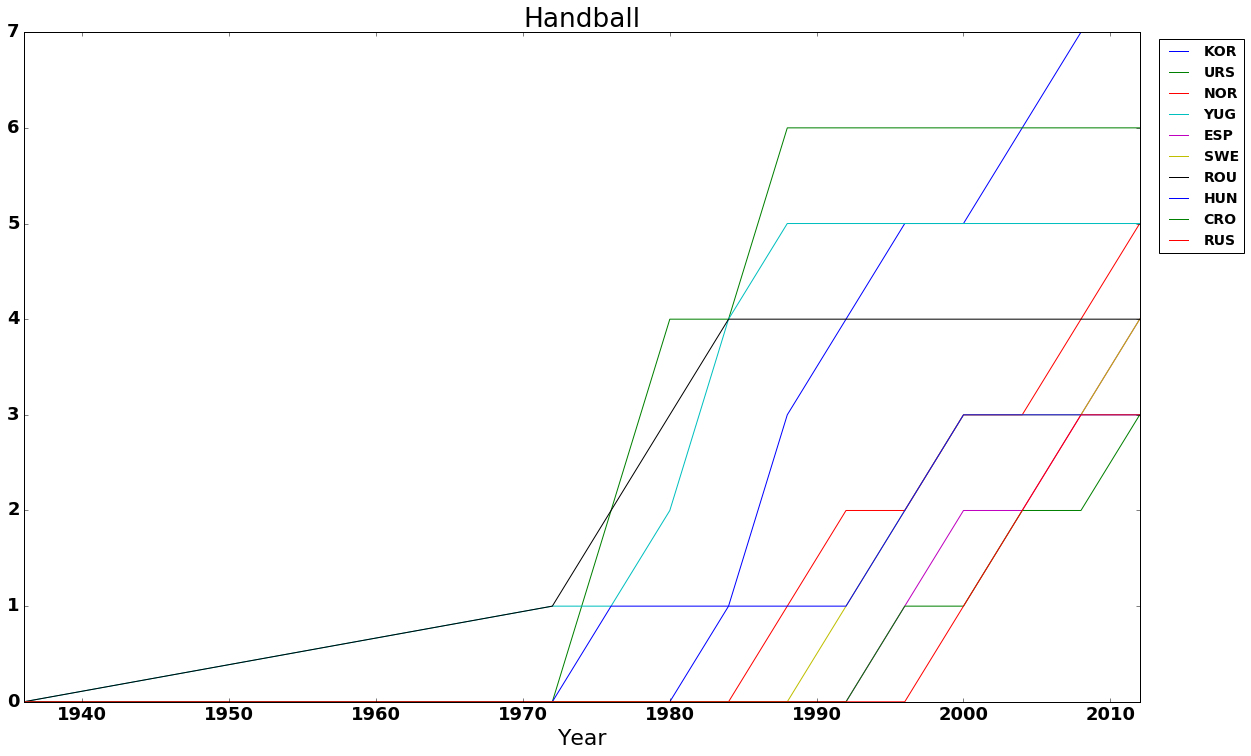

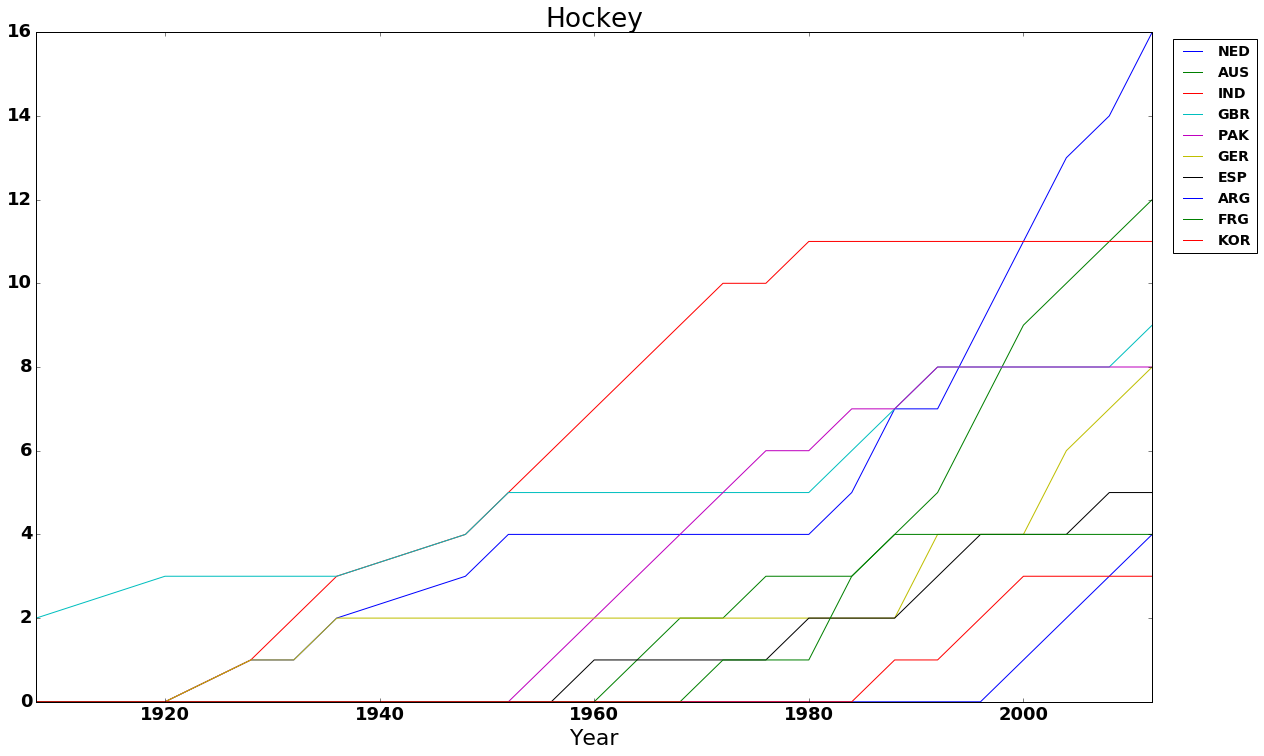

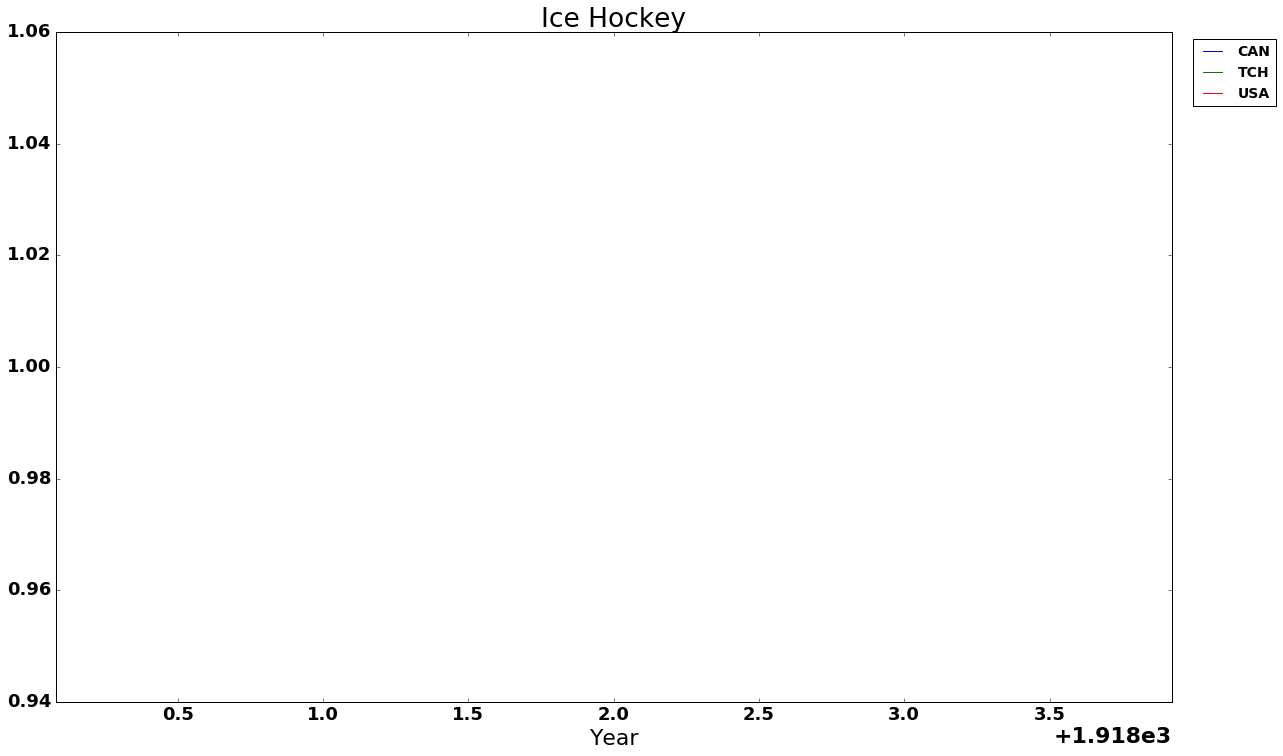

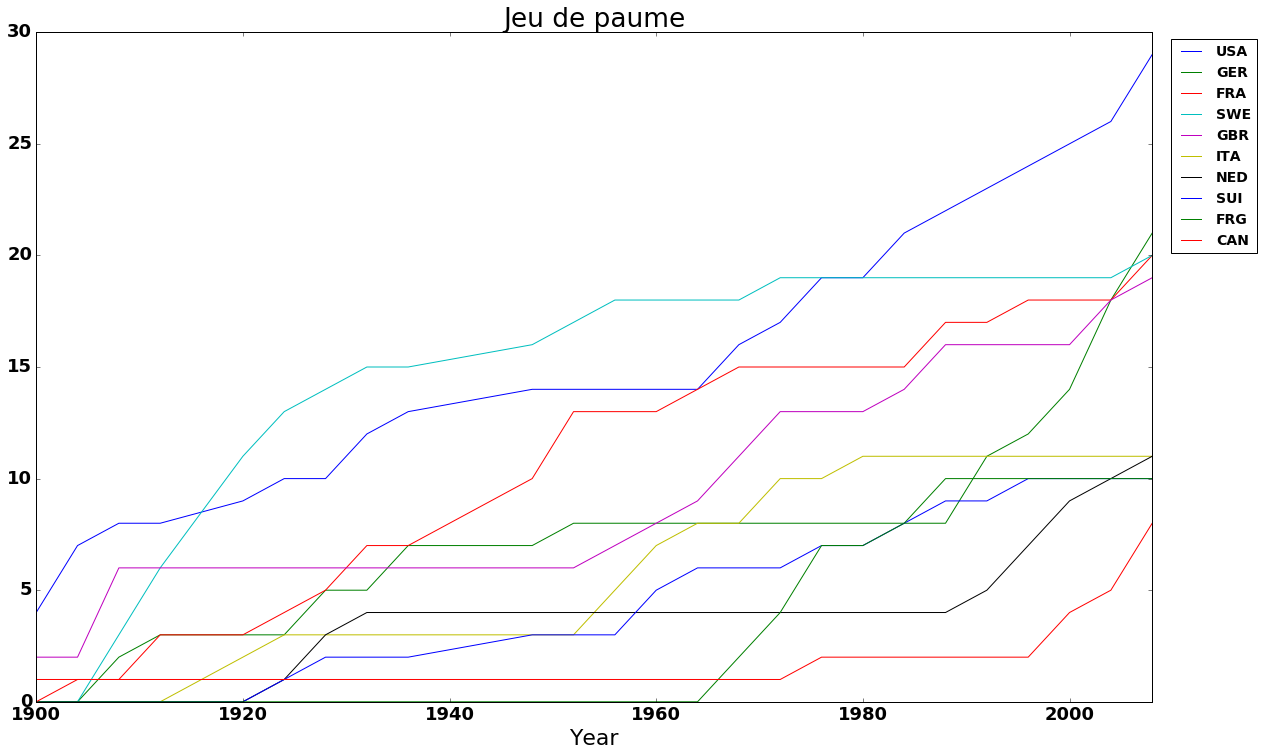

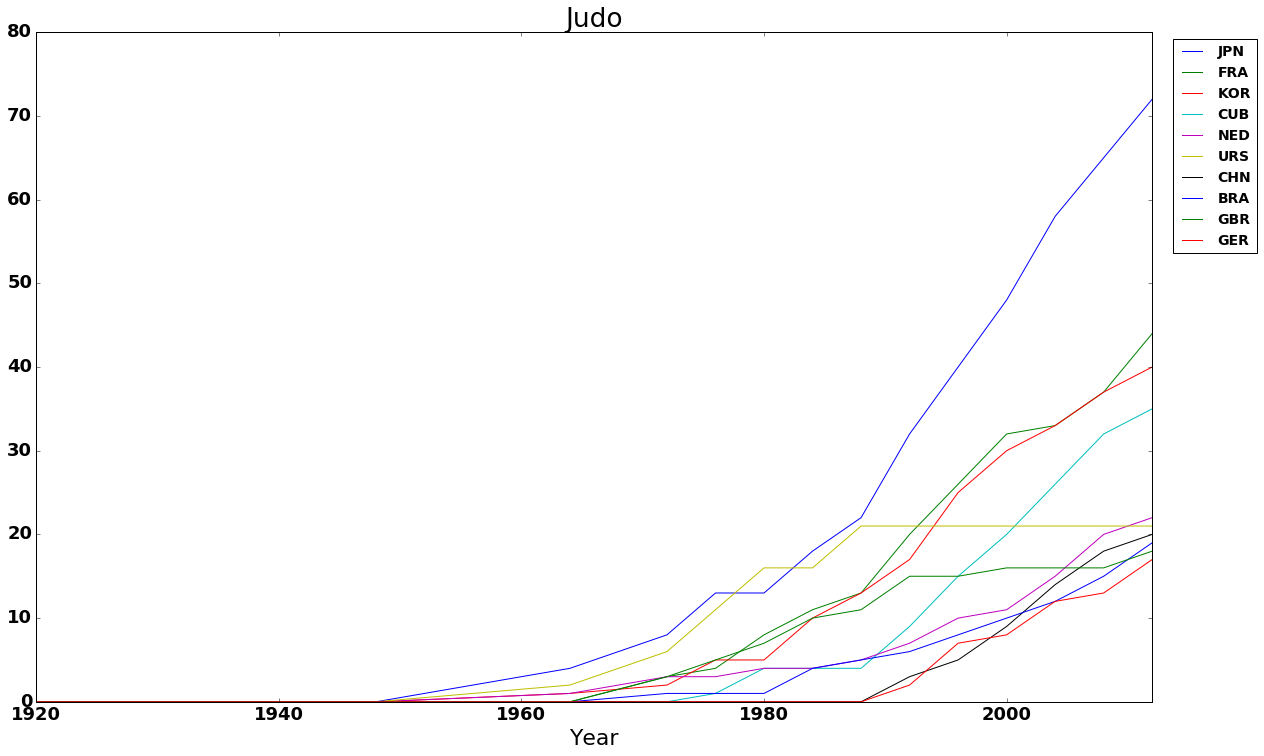

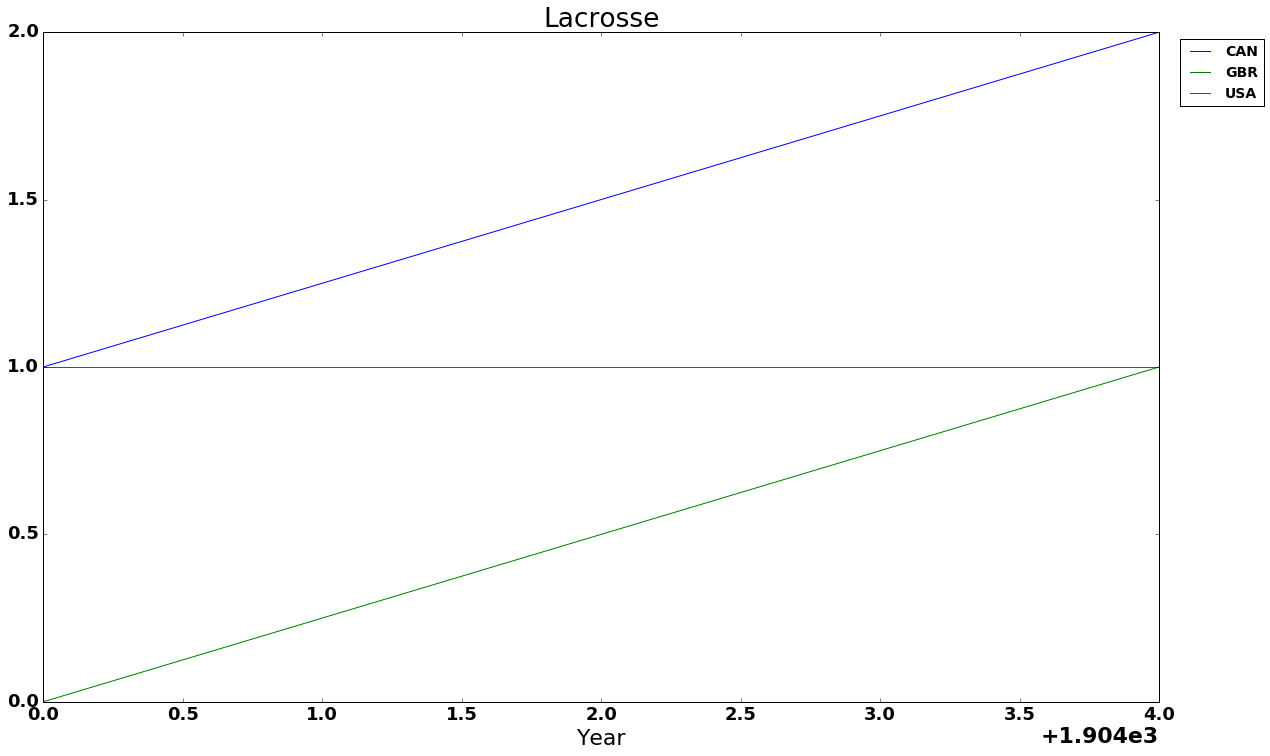

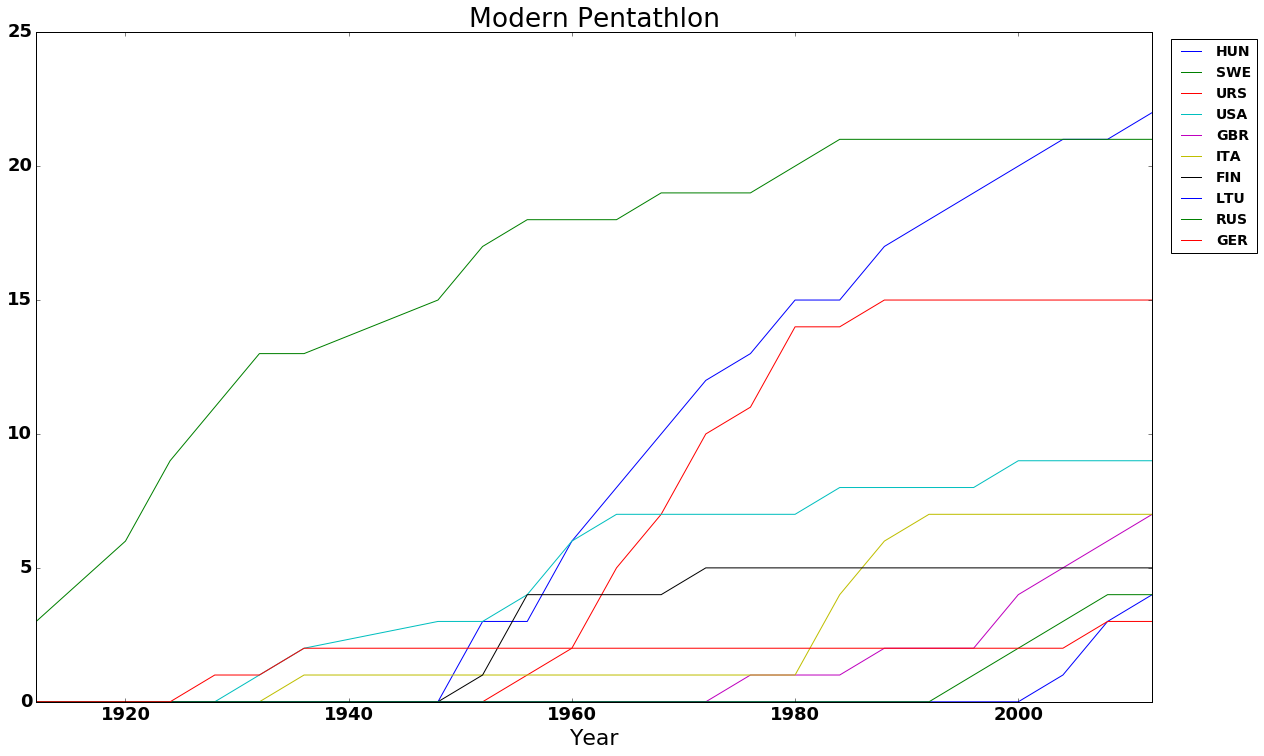

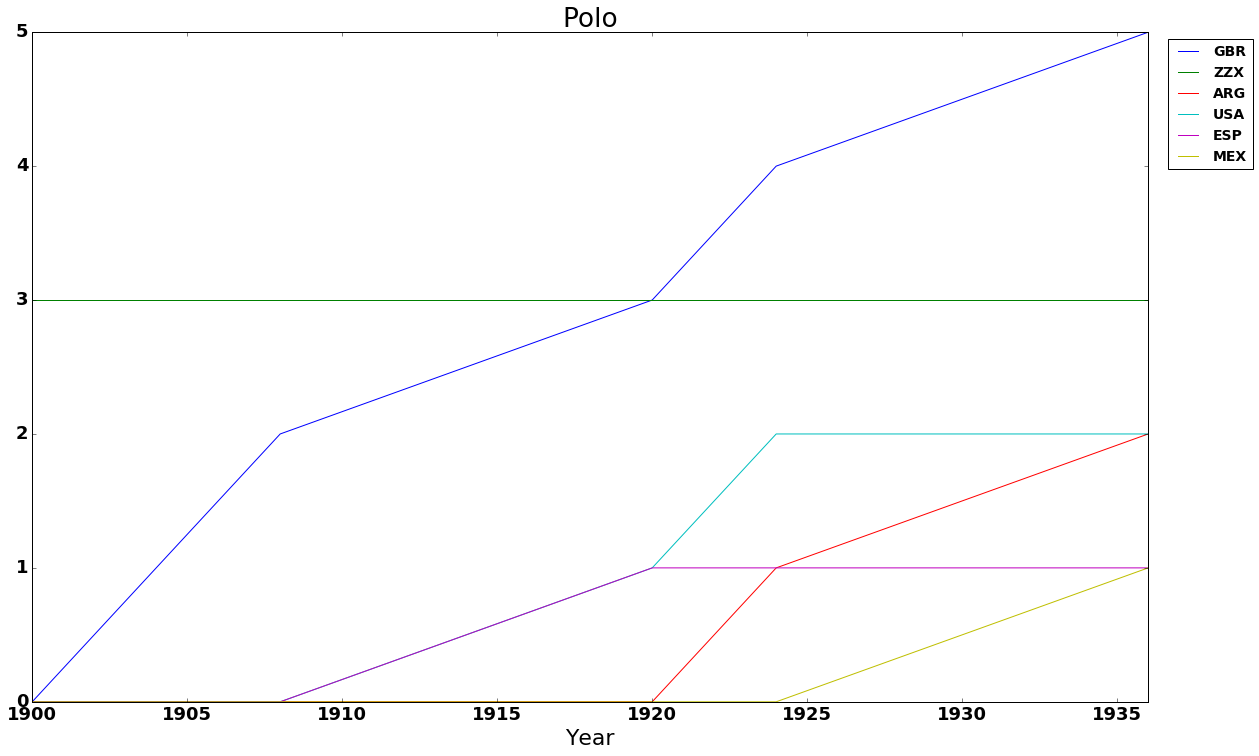

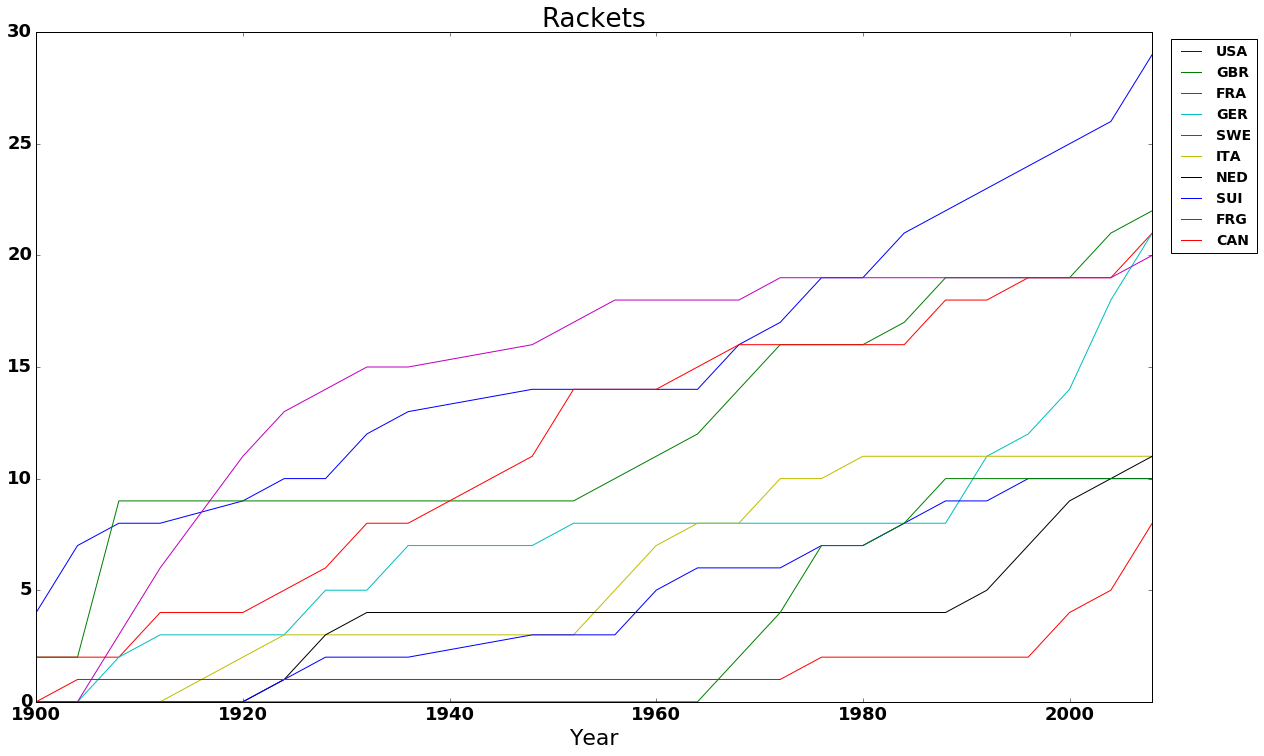

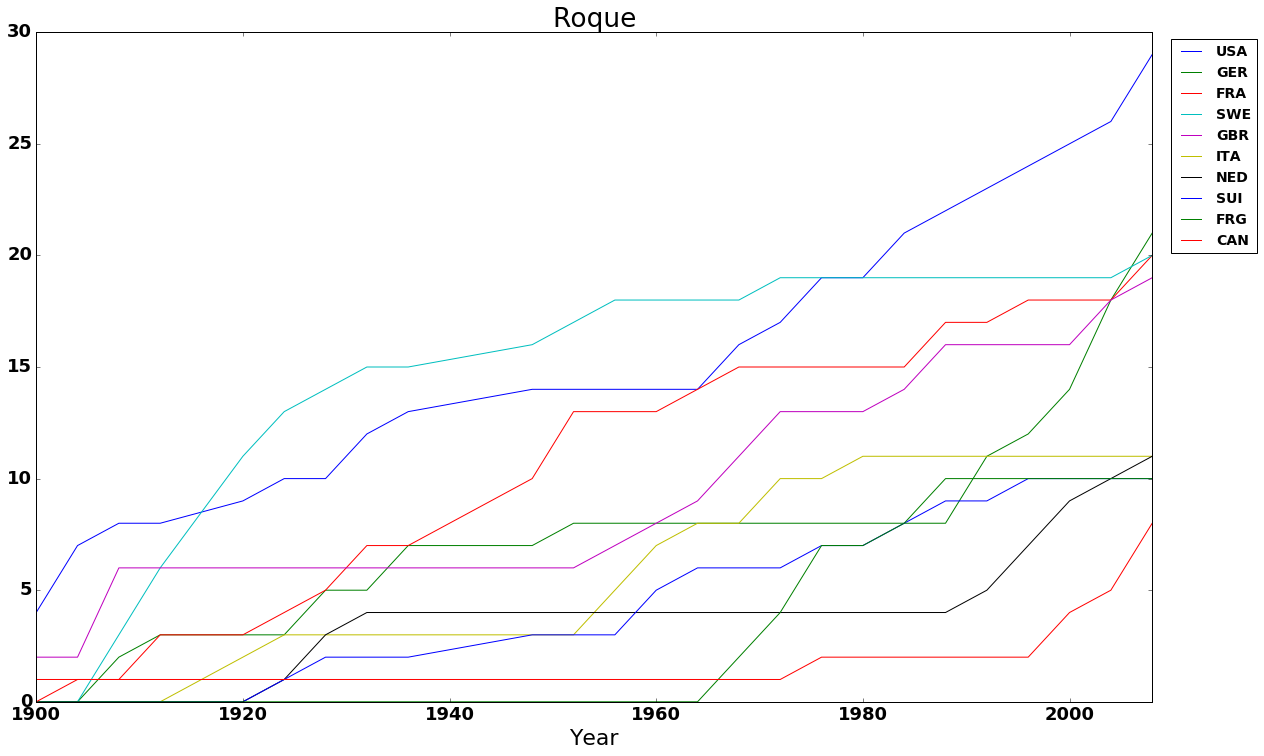

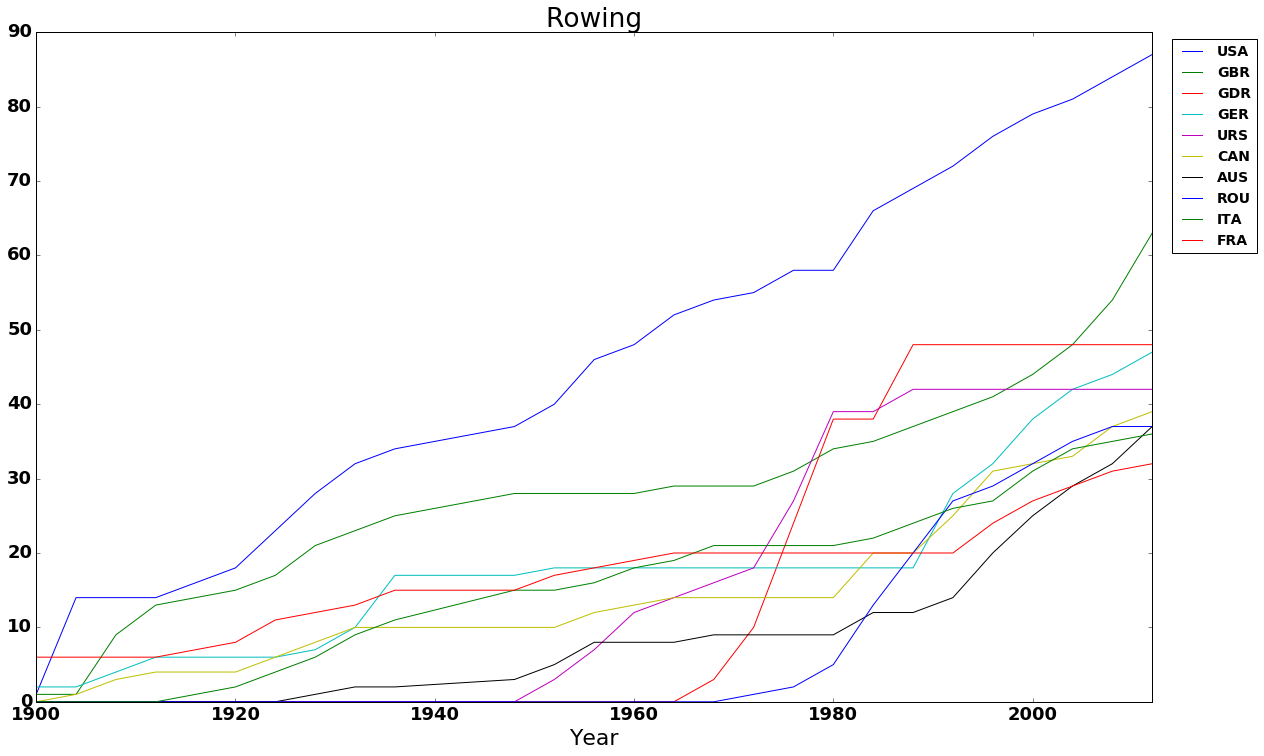

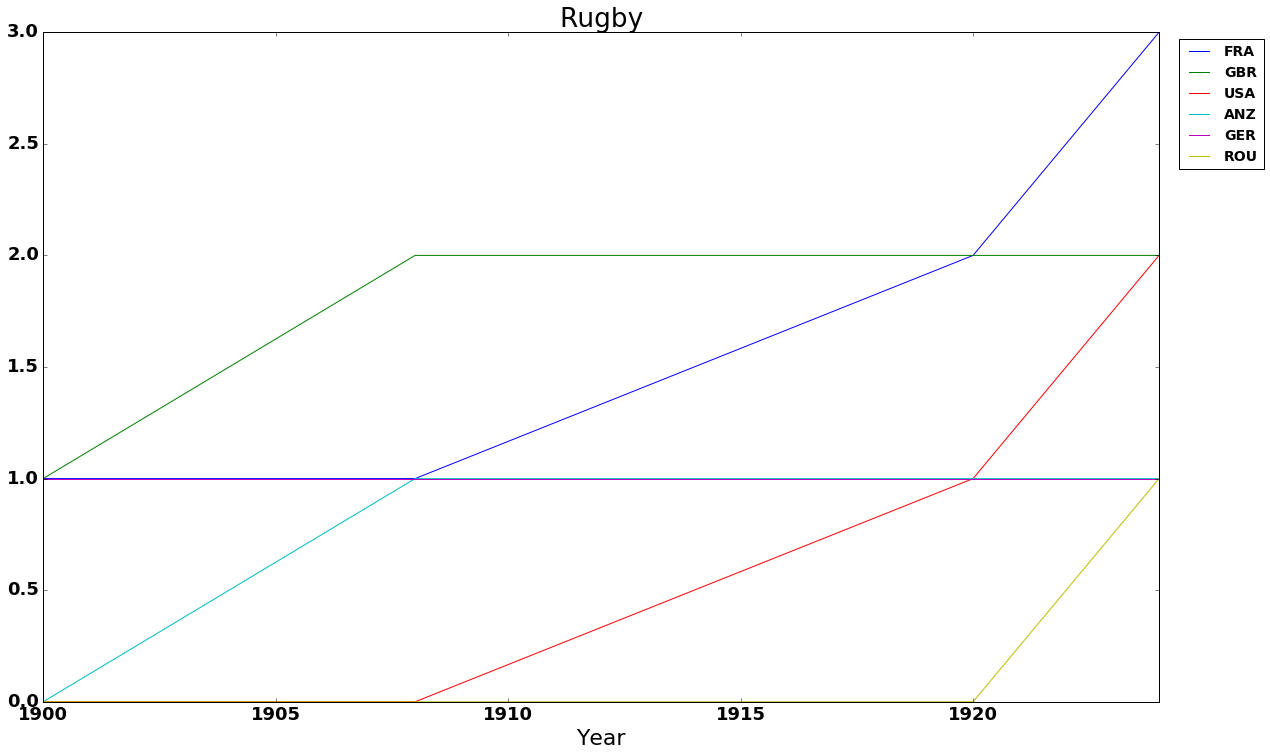

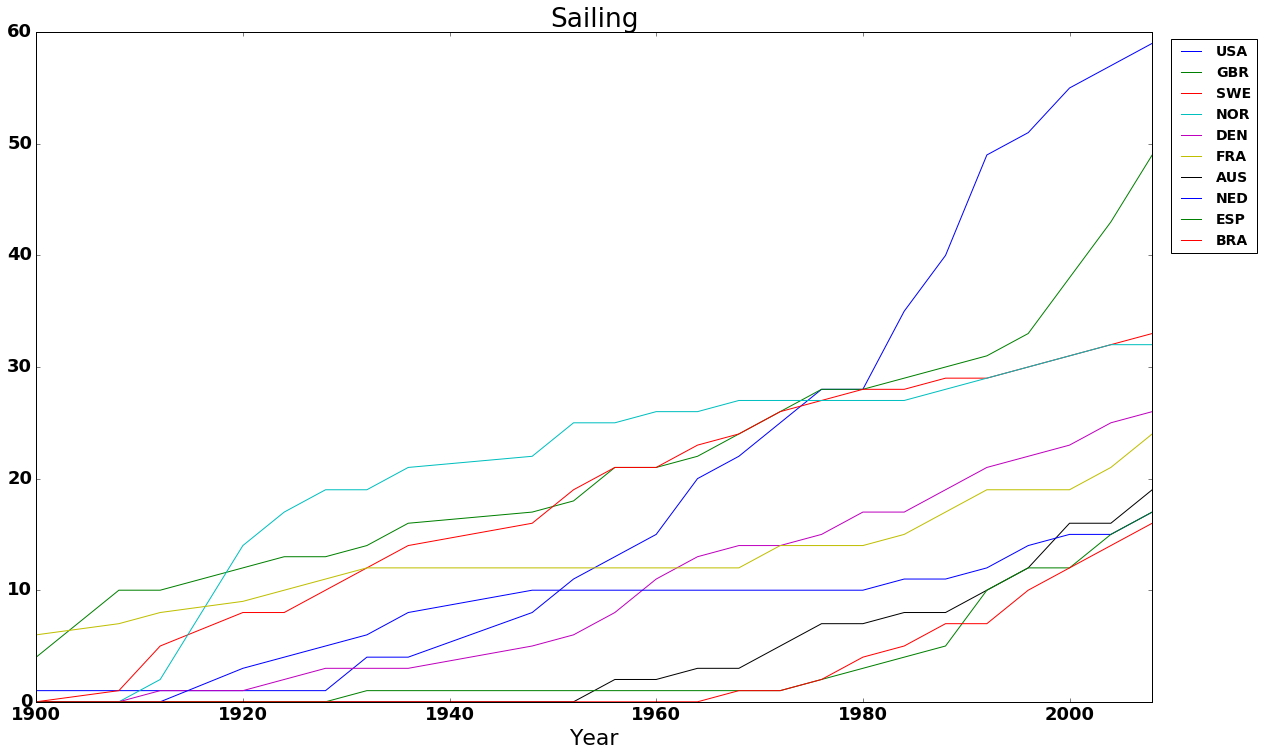

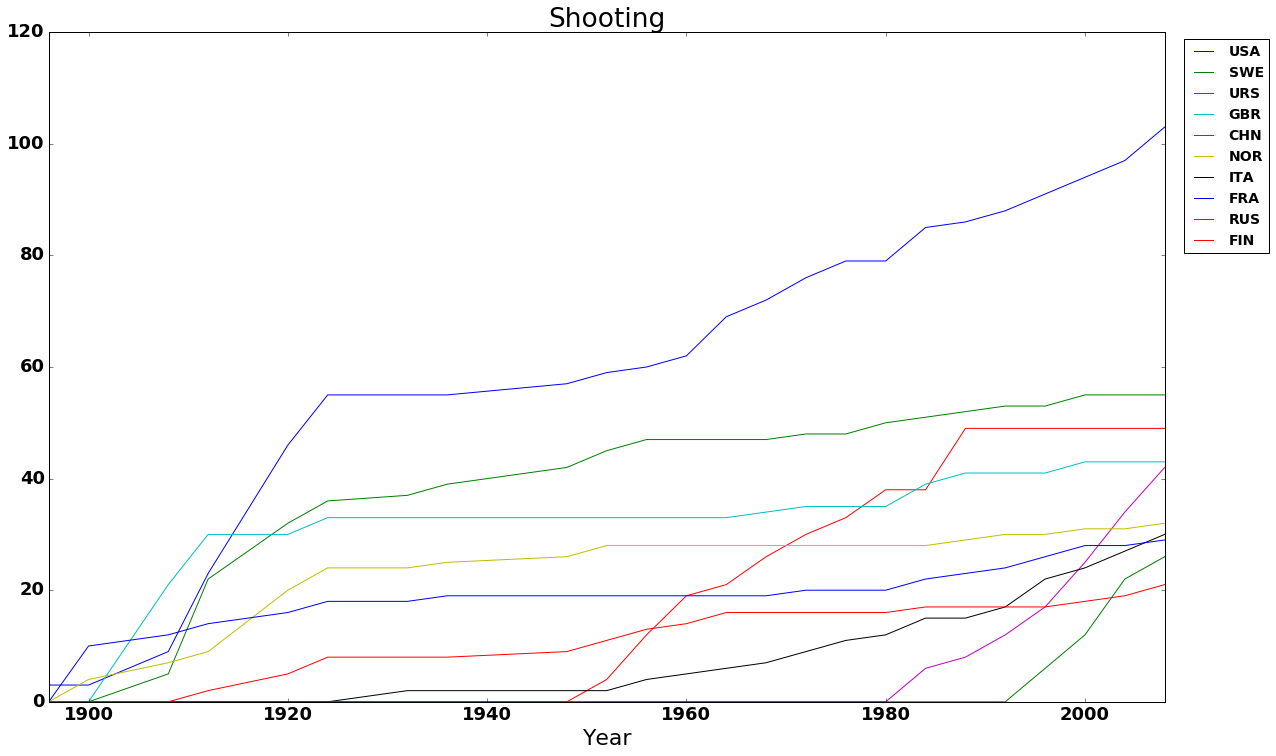

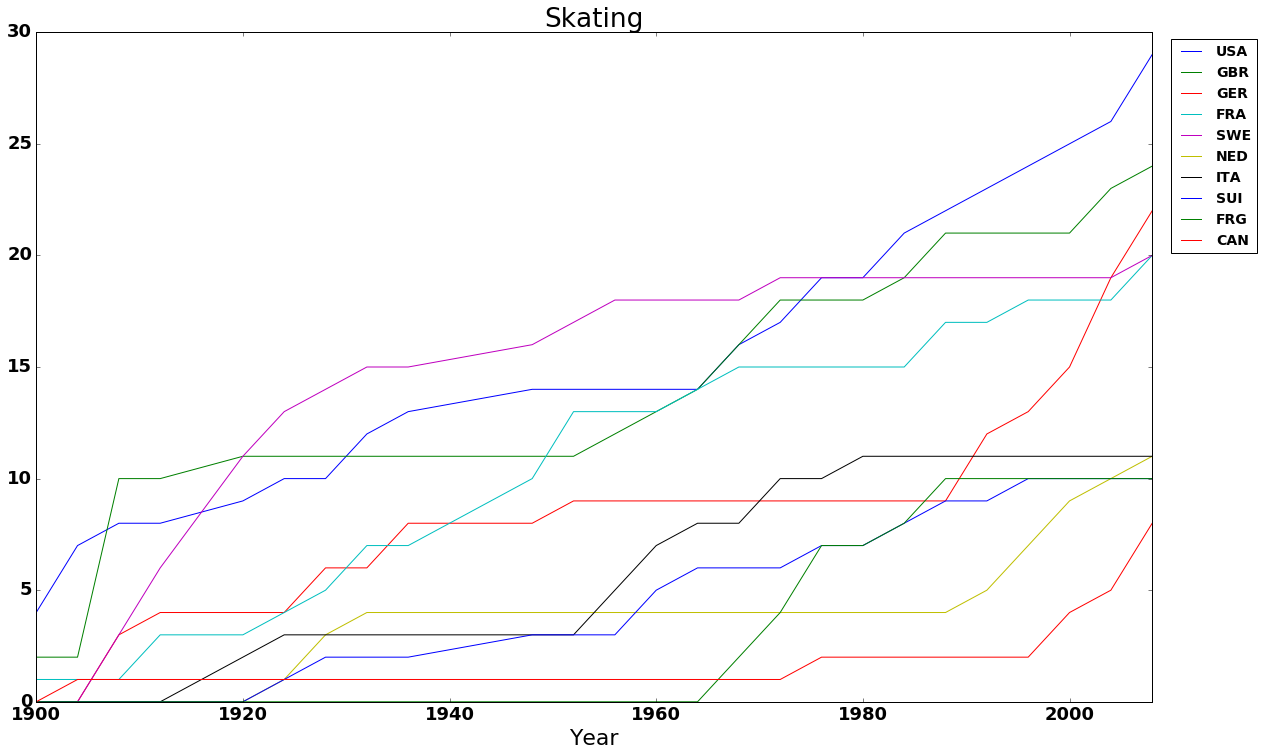

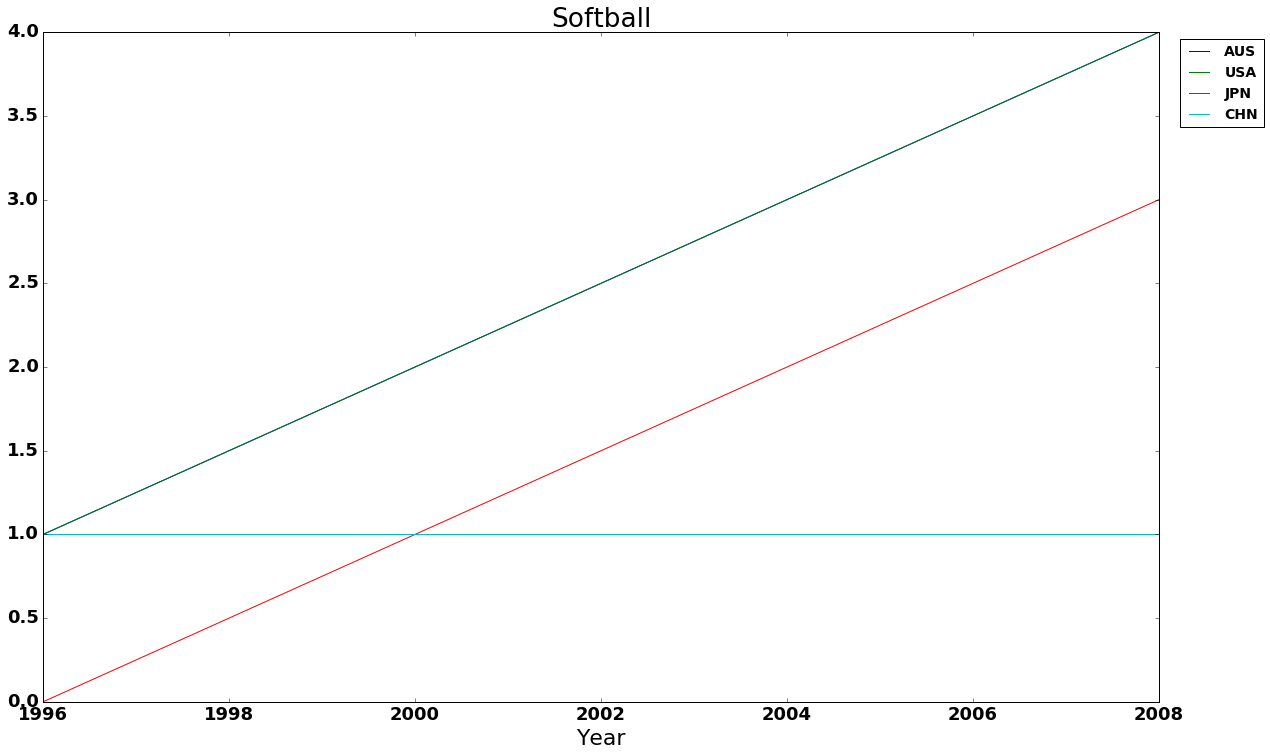

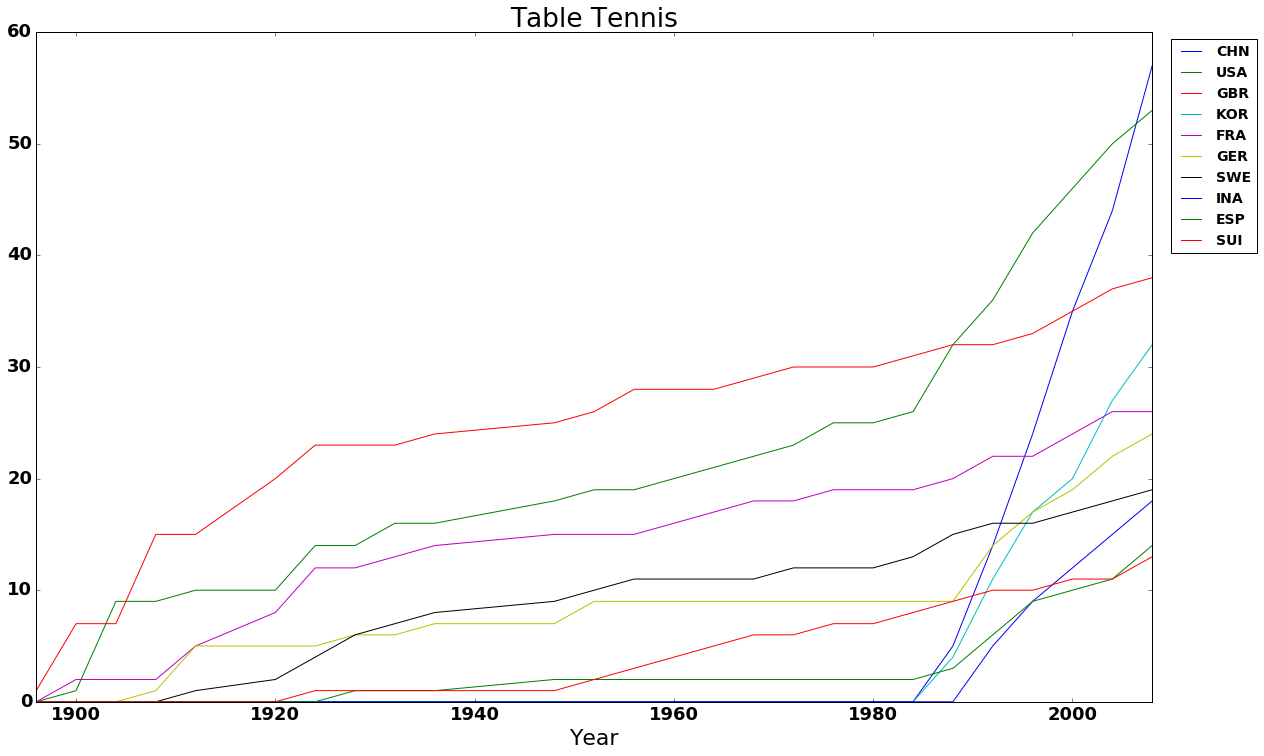

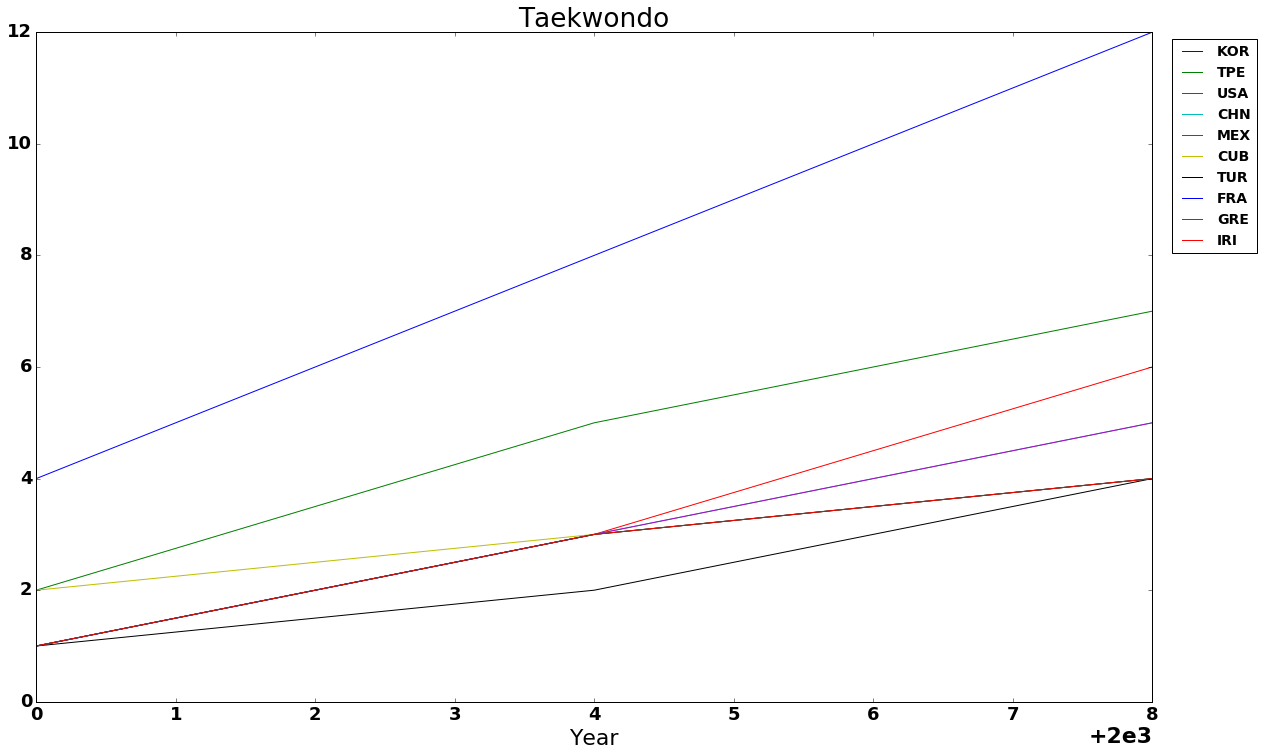

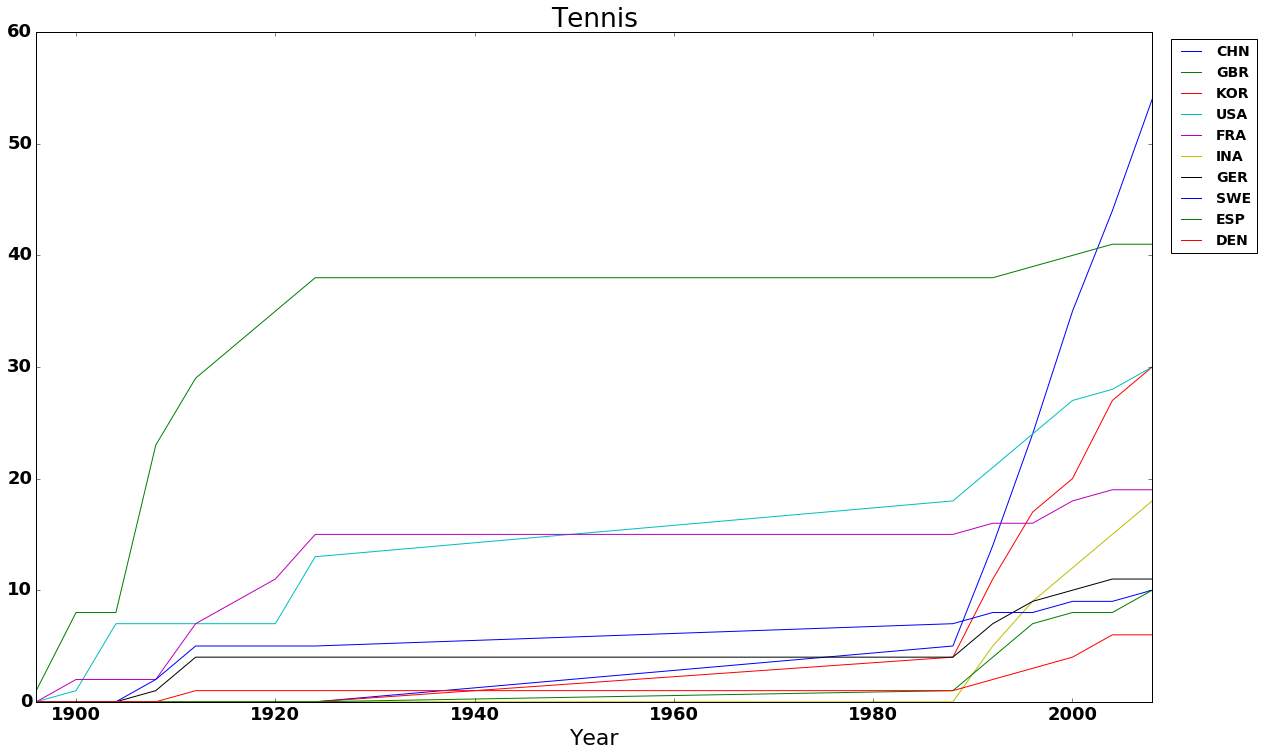

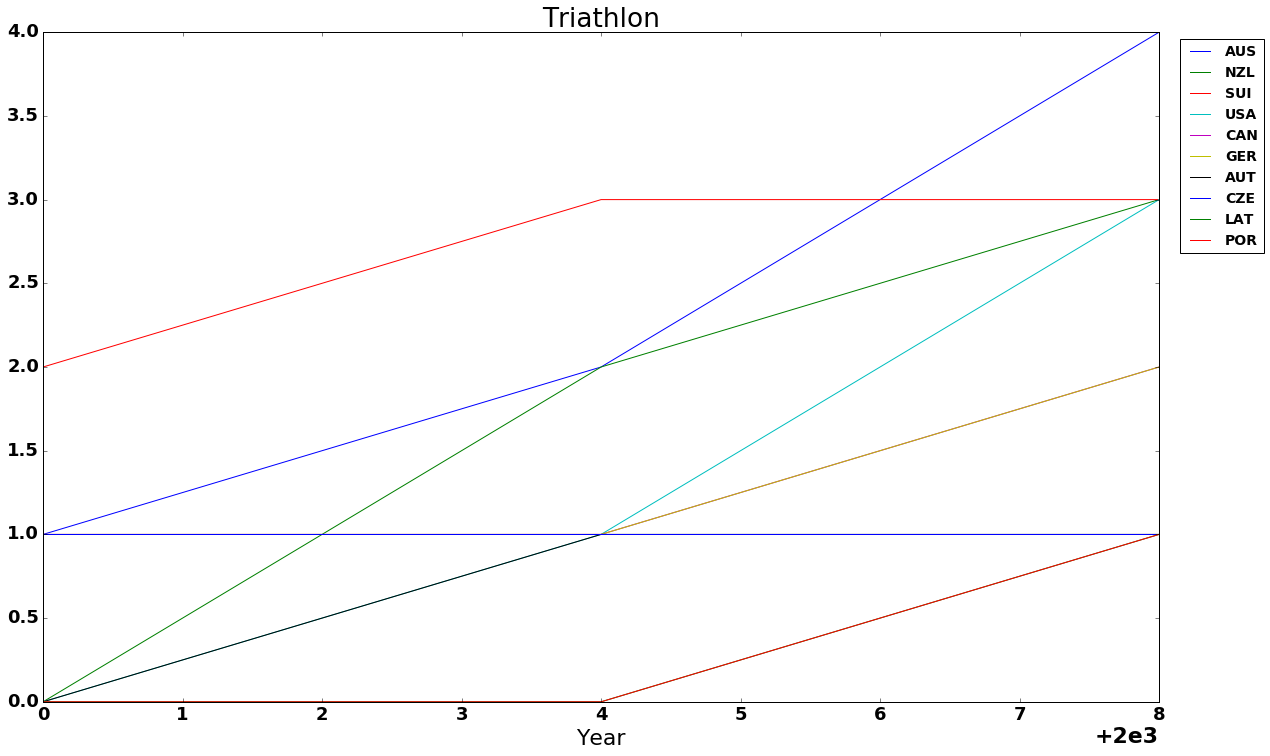

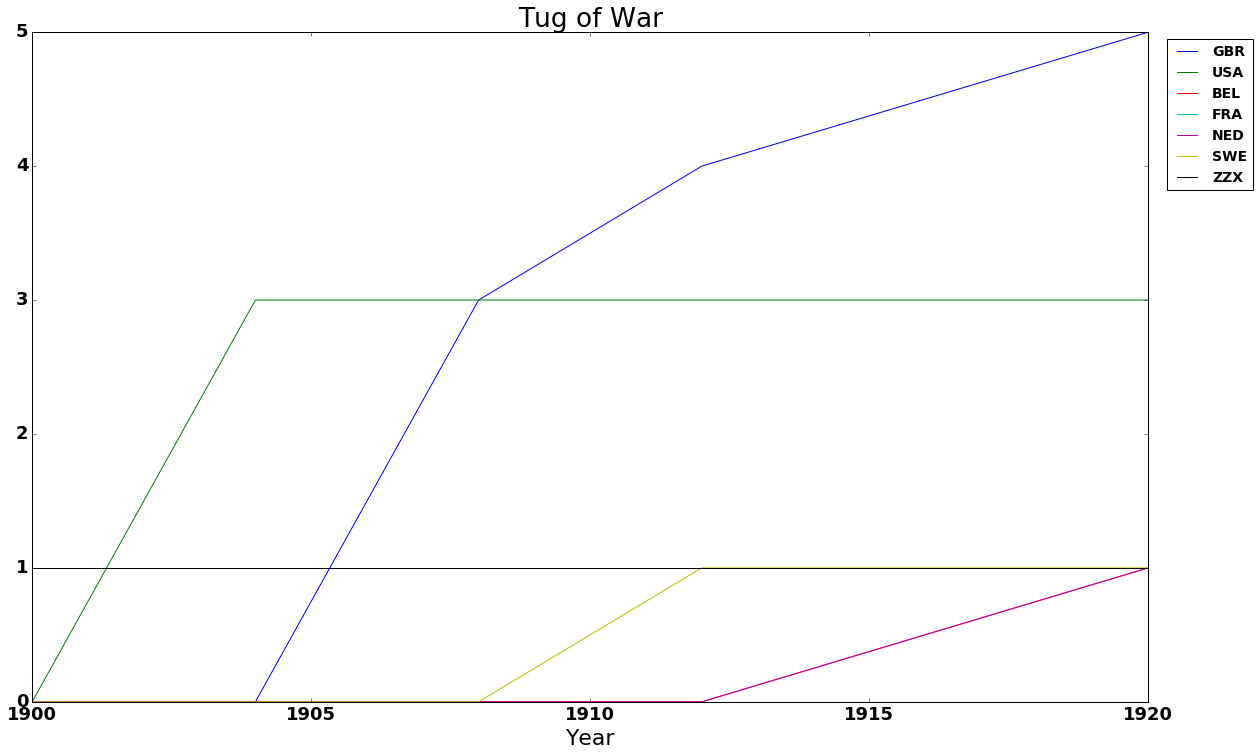

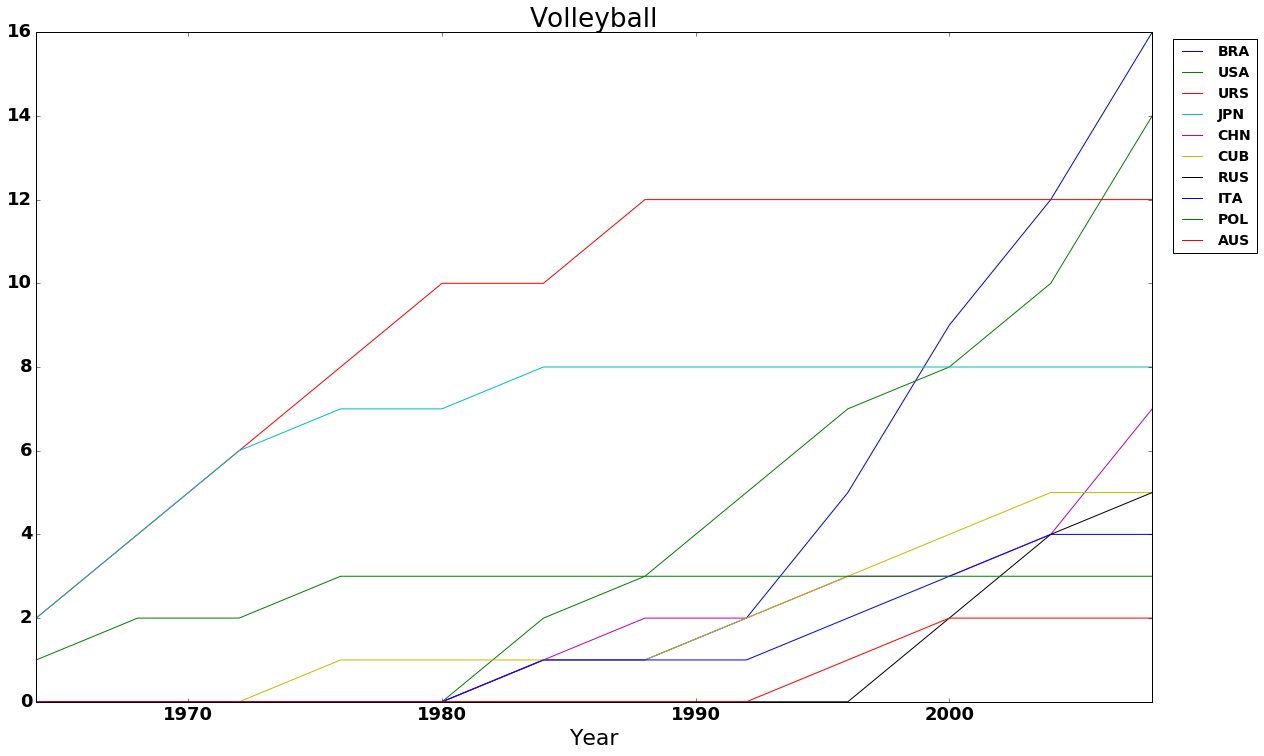

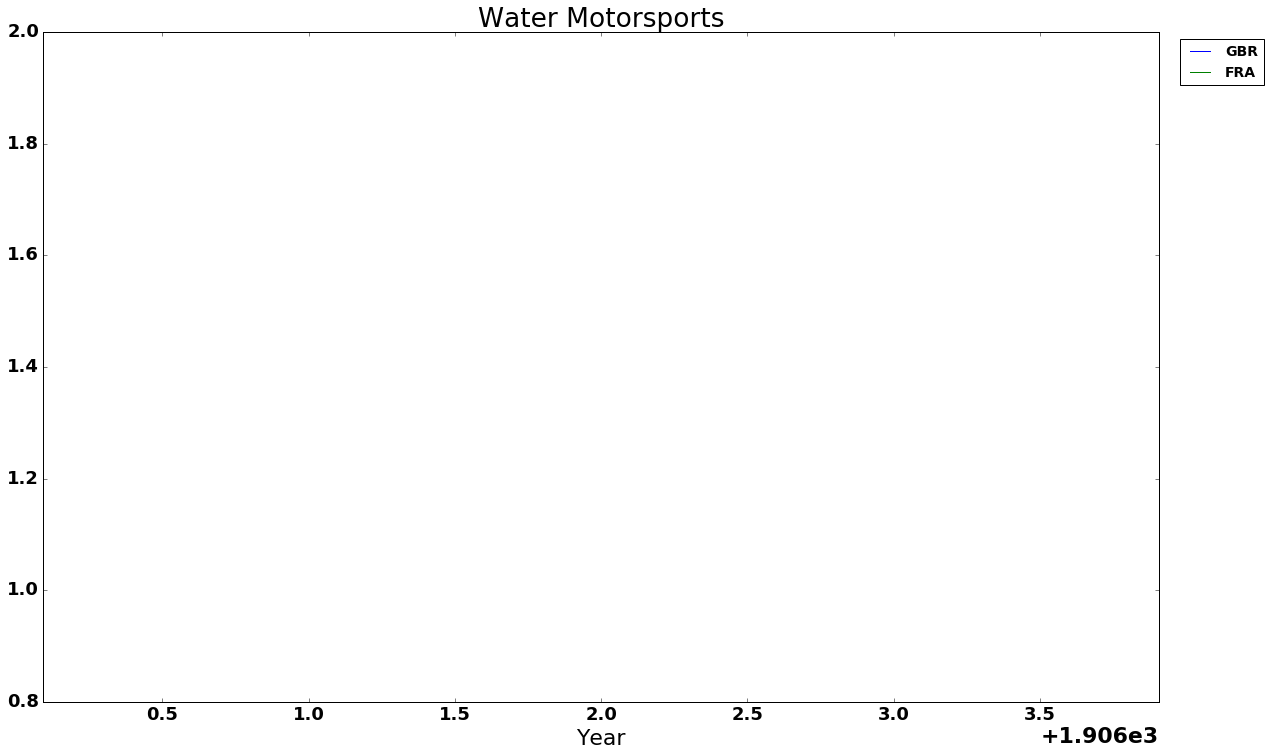

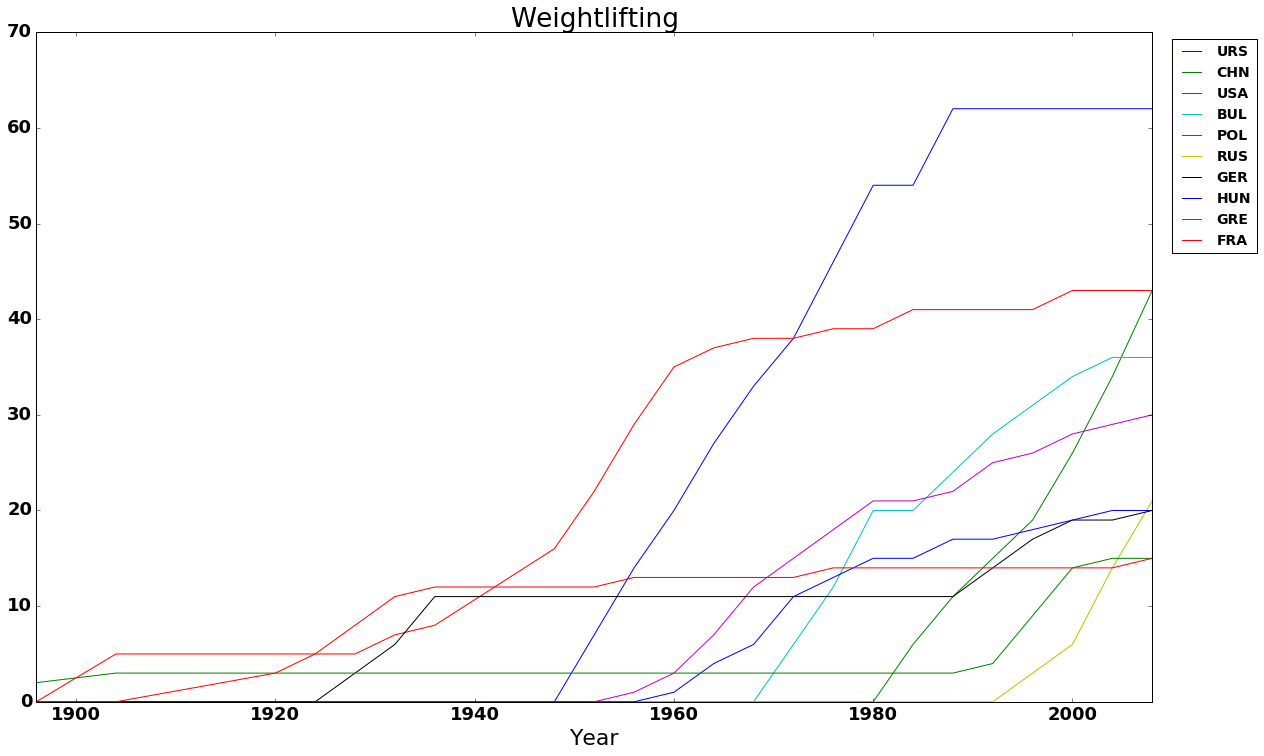

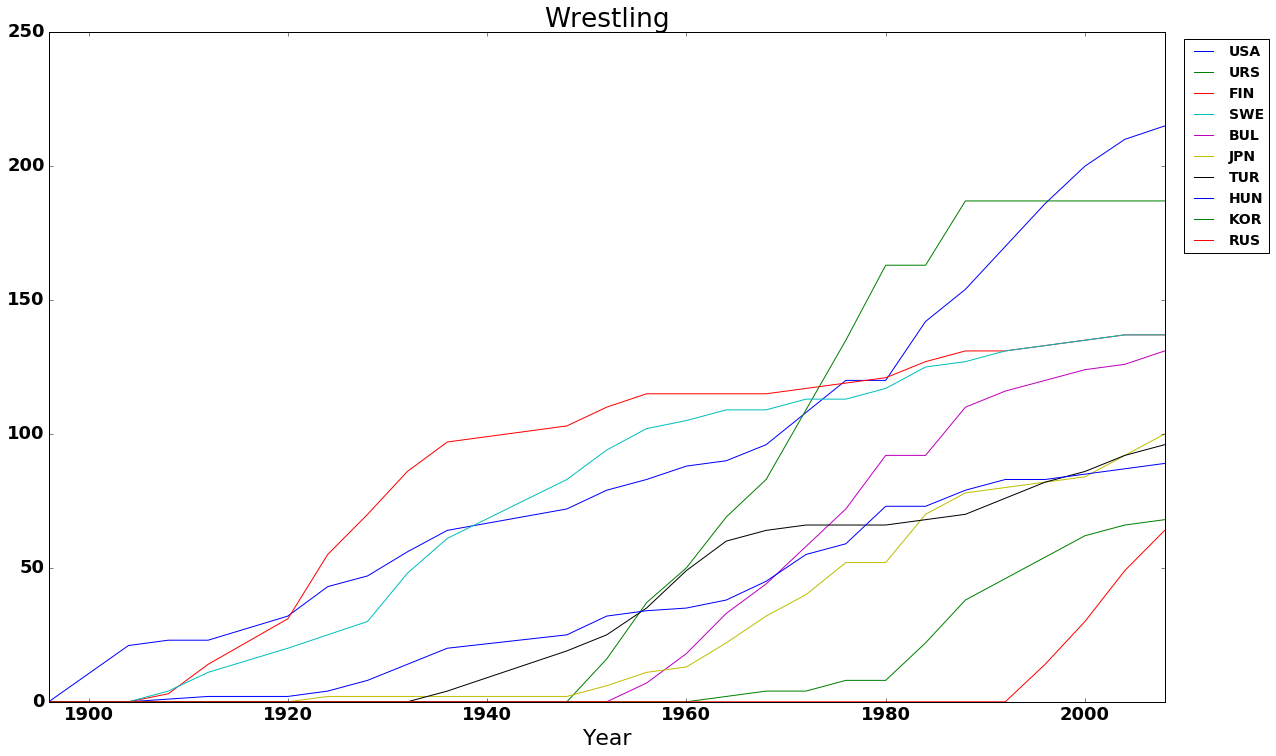

In [30]:
fig, axs = plt.subplots(1,sports_count)

sports = data.groupby(['Sport'])

for sport in sports:
    # sport_df = data[data['Sport'] == 'Weightlifting']
    sport_name = sport[0]
    sport_df = sport[1]

    # if sport_name != 'Weightlifting':
    #     continue

    # the medals in this list will be counted
    # normally only ['Gold'] or ['Gold, 'Silver', 'Bronze'] will be considered
    medal_to_include = ['Gold', 'Silver', 'Bronze']
    medals_we_care = sport_df[sport_df['Medal'].map(lambda x: x in medal_to_include)]

    # build the pivot table
    table = medals_we_care.drop(['Discipline', 'Event', 'Event gender', 'Sport'], 1).pivot_table(index=['NOC'], columns=['Year'], aggfunc='count')
    table = table.fillna(0).reset_index()

    # remove the multi-level columns
    new_table = table['Medal']
    # set index for as it's country name
    new_table = new_table.set_index(table['NOC'])
    # print(new_table.columns)
    
    for i, year in enumerate(new_table.columns):
        # we add a col to the next column in each loop,
        # to make a cumulative chart
        if i == (len(new_table.columns) - 1):
            continue

        next_year = new_table.columns[i+1]
        if next_year == 'NOC':
            continue

        new_table[next_year] = new_table[year] + new_table[next_year]

    new_table = new_table.sort_values(new_table.columns[-1], ascending=False)
    topten = new_table.iloc[0:10, :]

    # plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    topten.T.plot.line(figsize=(20,12), fontsize=18, title=sport_name).legend(bbox_to_anchor=(1.10, 1.0), fontsize=14)

<h1>Aquatics</h1>
There seems to be some missing data. Check each of the sports in different section.

In [31]:
# Take a look at how each top country did
data[data['Sport'] == 'Aquatics'].groupby(['NOC']).count().sort_values(['Medal'], ascending=False).head()

Discipline  Event  Event gender  Medal  Sport  Year
NOC                                                     
USA         694    694           694    694    694   694
AUS         200    200           200    200    200   200
CHN         101    101           101    101    101   101
GDR          99     99            99     99     99    99
GER          98     98            98     98     98    98

In [32]:
set(data[(data['Sport'] == 'Aquatics') & (data['NOC'] == 'USA')]['Medal'])

{'Bronze', 'Gold', 'Silver'}

(243, 7)


/Users/wangchi-an/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


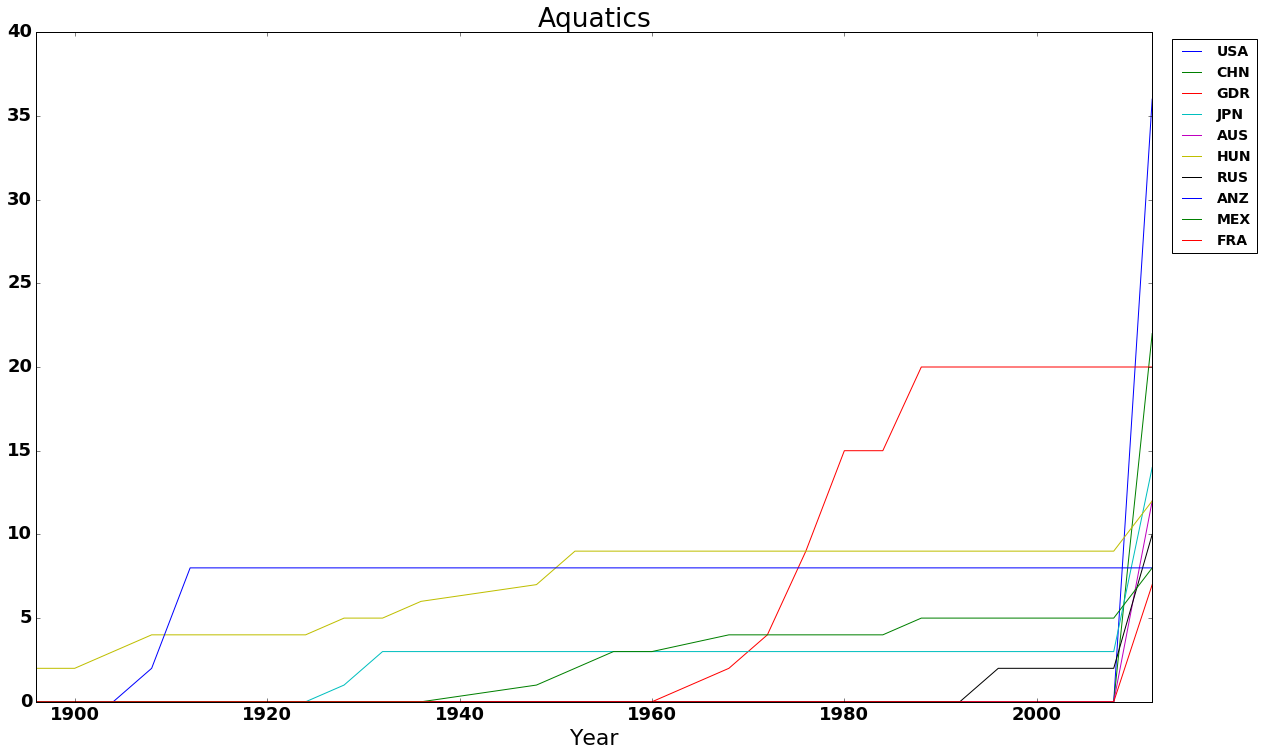

In [23]:
sport_name = 'Aquatics'
sport_df = data[data['Sport'] == sport_name]

# the medals in this list will be counted
# normally only ['Gold'] or ['Gold, 'Silver', 'Bronze'] will be considered
medal_to_include = ['Gold', 'Silver', 'Bronze']
# medal_to_include = ['Gold']

medals_we_care = sport_df[sport_df['Medal'].map(lambda x: x in medal_to_include)]
print(medals_we_care.shape)


# build the pivot table
table = medals_we_care.drop(['Discipline', 'Event', 'Event gender', 'Sport'], 1).pivot_table(index=['NOC'], columns=['Year'], aggfunc='count')
table = table.fillna(0).reset_index()

# remove the multi-level columns
new_table = table['Medal']
# set index for as it's country name
new_table = new_table.set_index(table['NOC'])
# print(new_table.columns)

for i, year in enumerate(new_table.columns):
    # we add a col to the next column in each loop,
    # to make a cumulative chart
    if i == (len(new_table.columns) - 1):
        continue

    next_year = new_table.columns[i+1]
    if next_year == 'NOC':
        continue

    new_table[next_year] = new_table[year] + new_table[next_year]

new_table = new_table.sort_values(new_table.columns[-1], ascending=False)
topten = new_table.iloc[0:10, :]

# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
topten.T.plot.line(figsize=(20,12), fontsize=18, title=sport_name).legend(bbox_to_anchor=(1.10, 1.0), fontsize=14)

<h1> Showing Same plots but only with Gold Medals</h1>

/Users/wangchi-an/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1900.0, right=1900.0
  'left=%s, right=%s') % (left, right))
/Users/wangchi-an/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2012.0, right=2012.0
  'left=%s, right=%s') % (left, right))
/Users/wangchi-an/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/wangchi-an/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_base

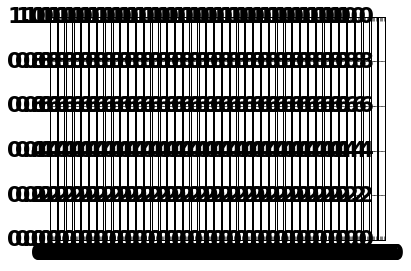

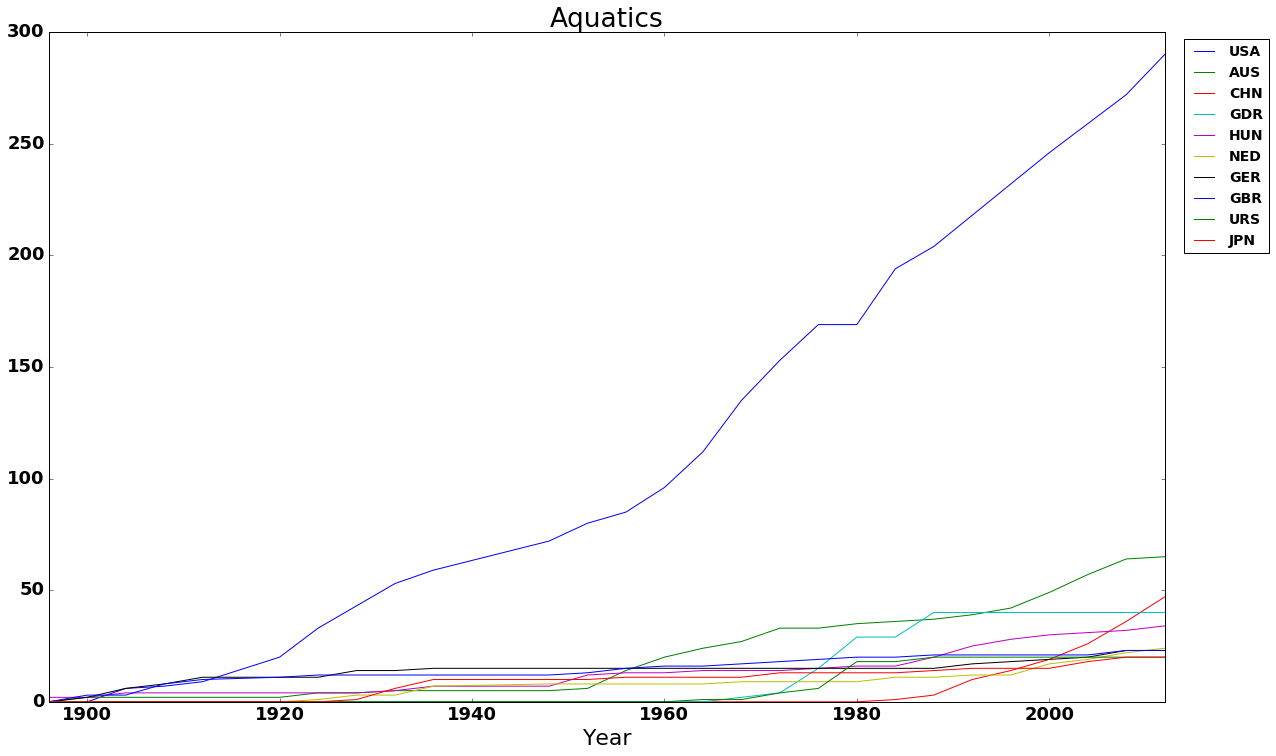

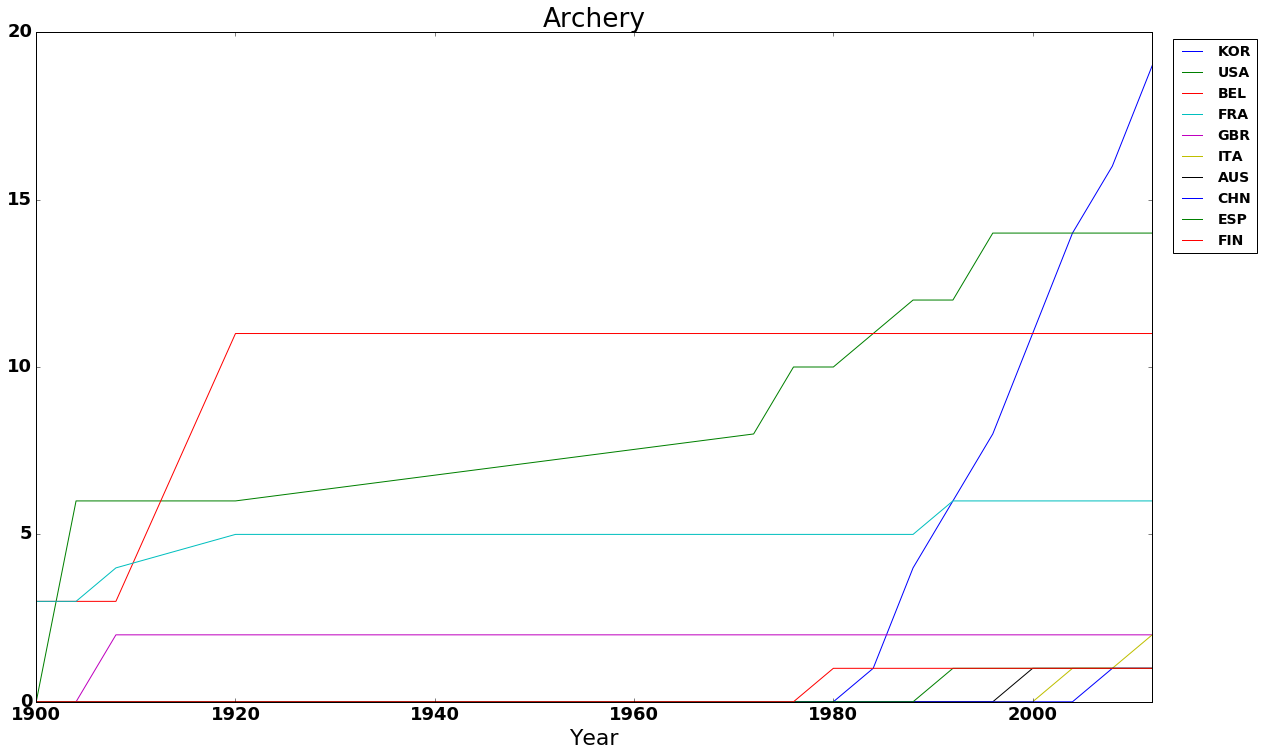

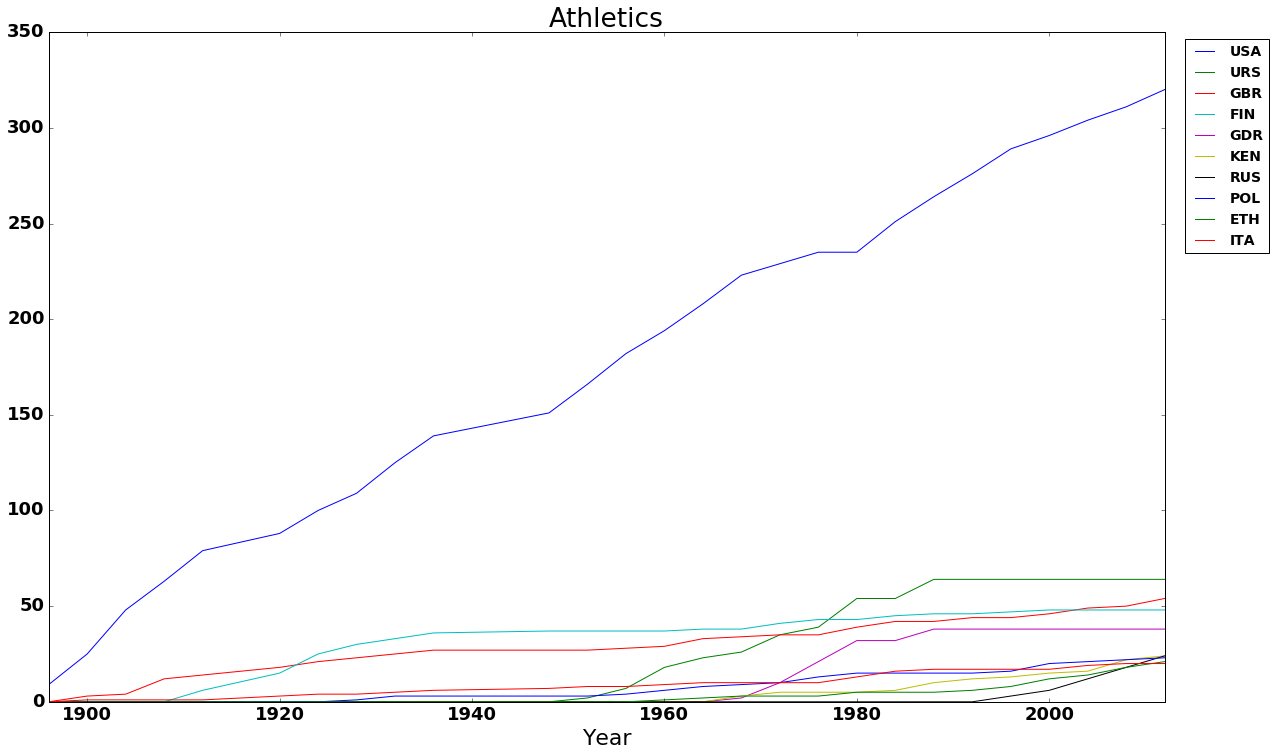

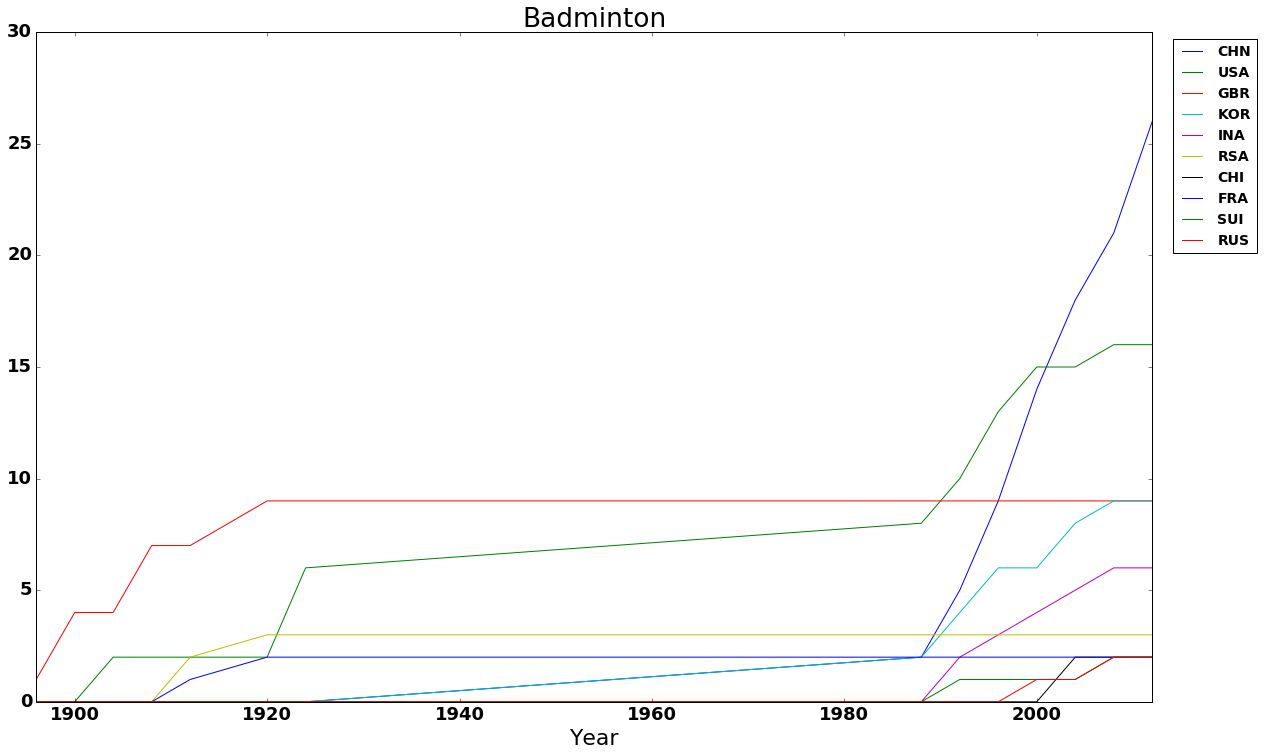

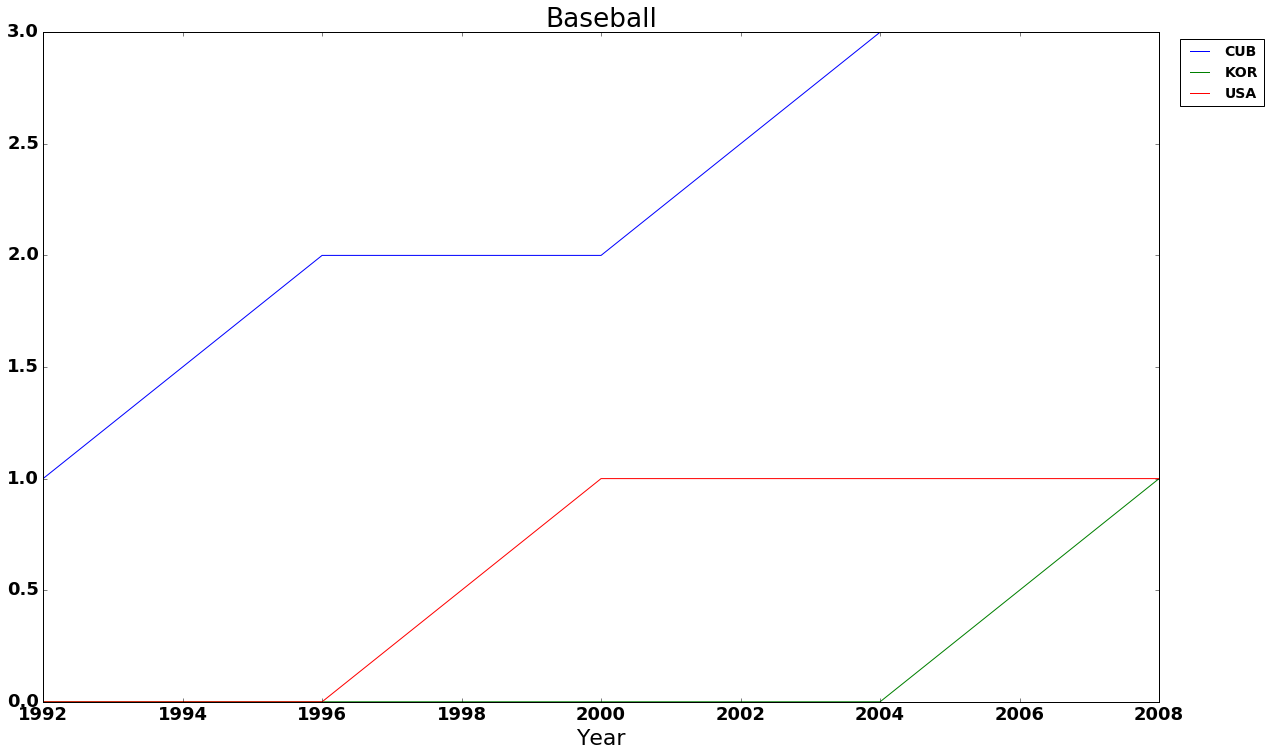

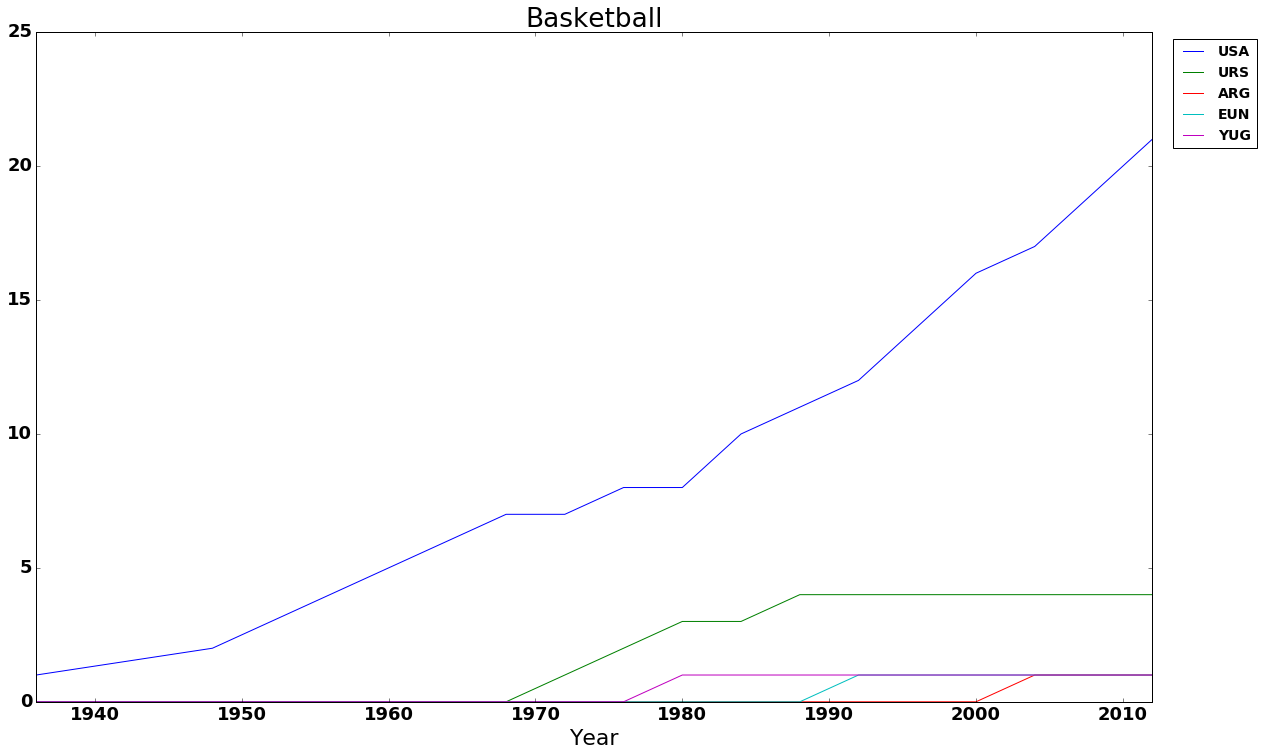

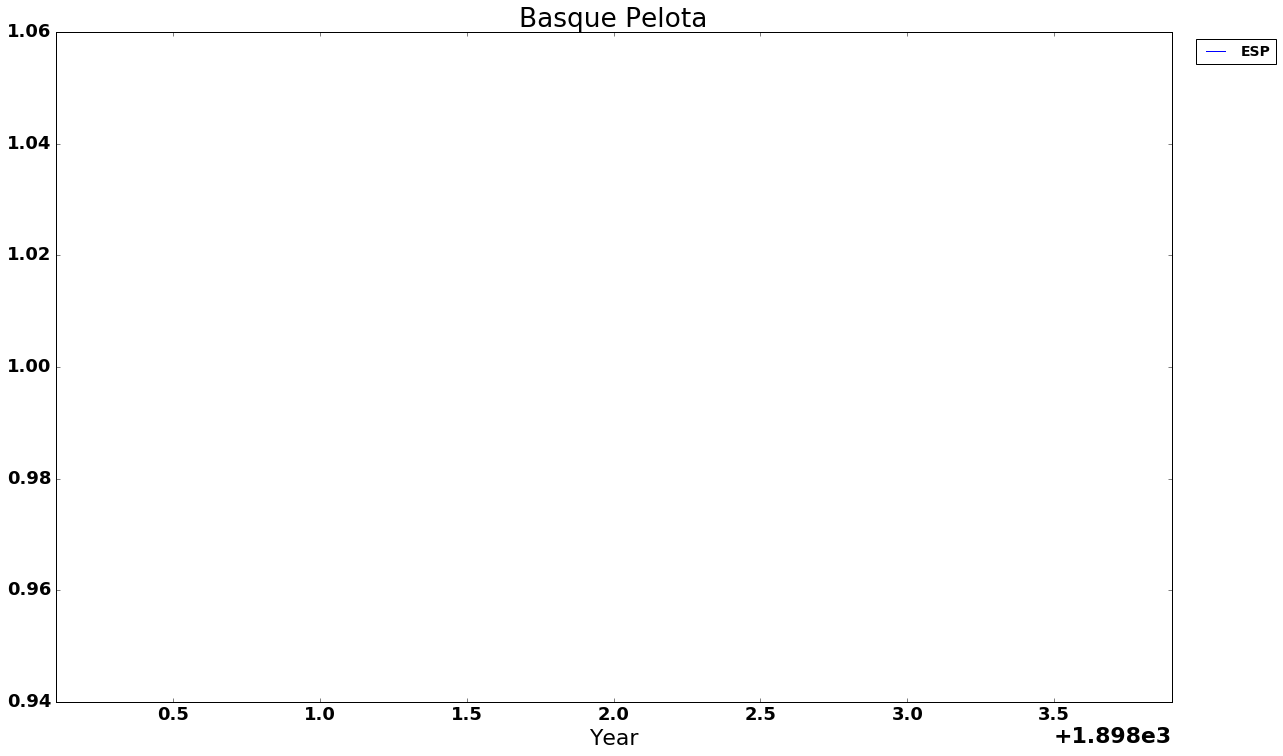

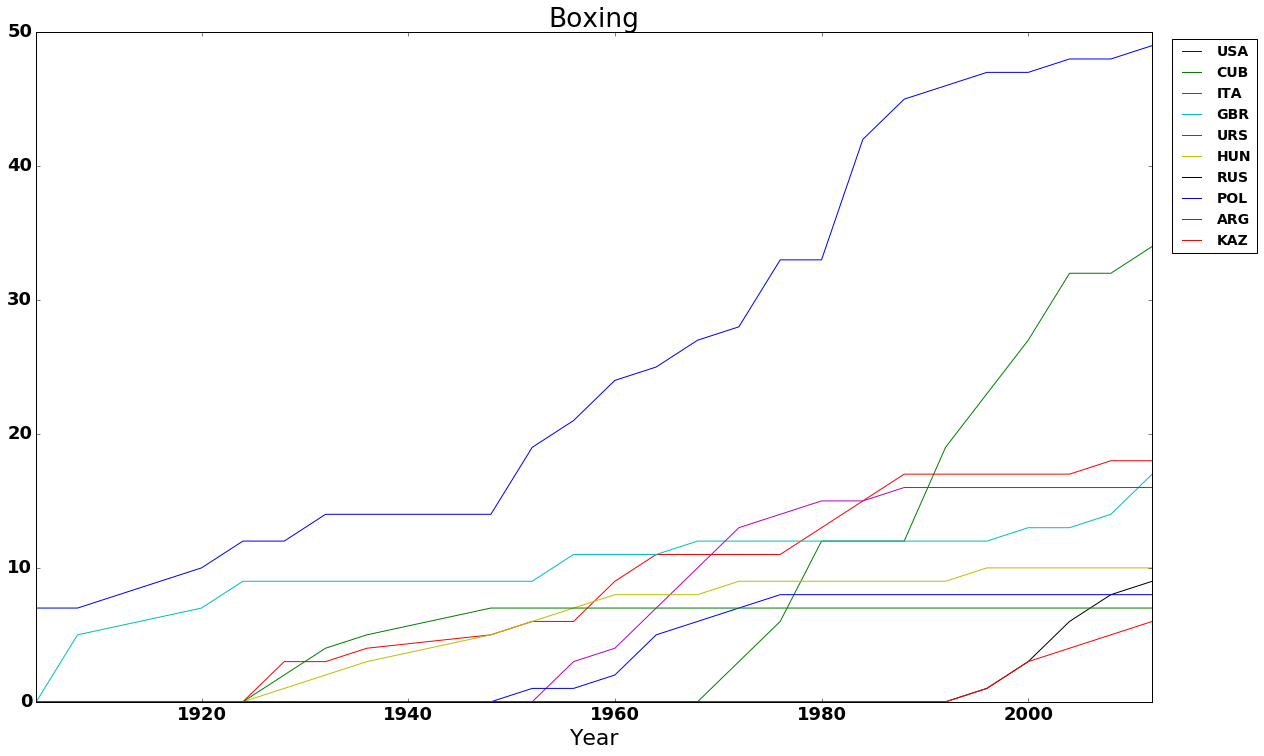

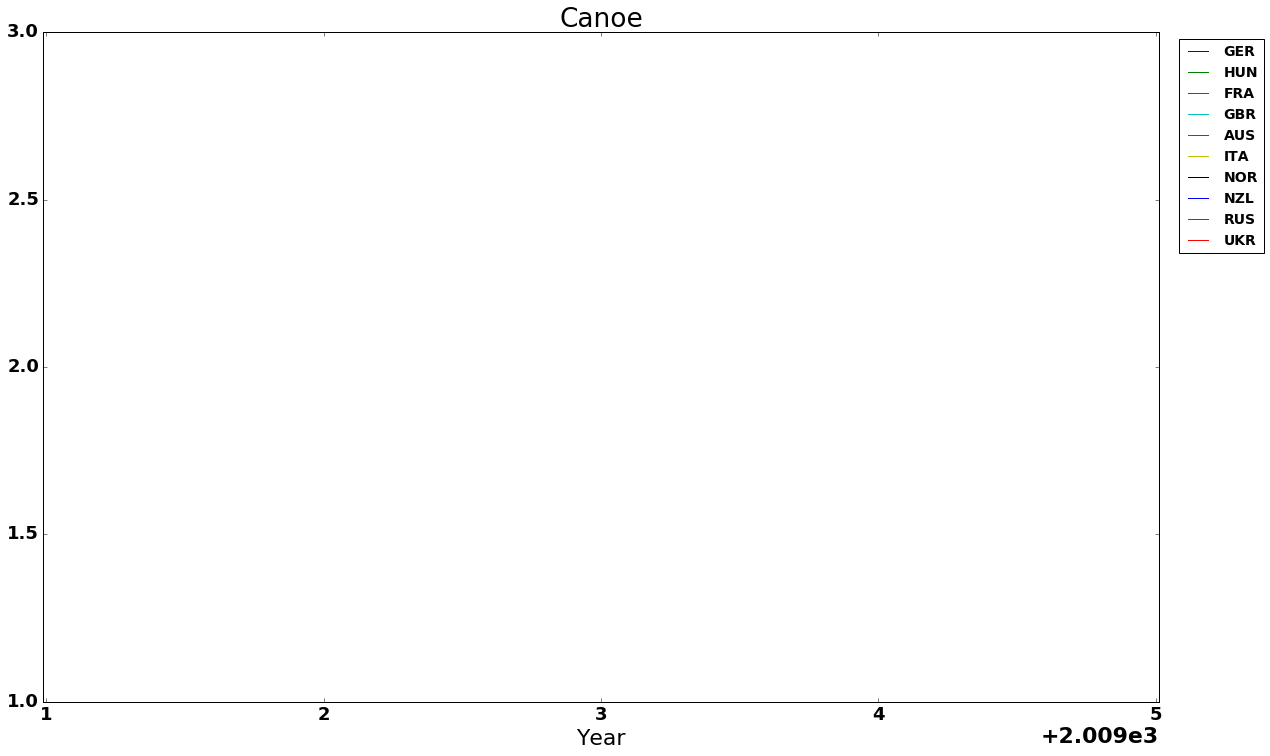

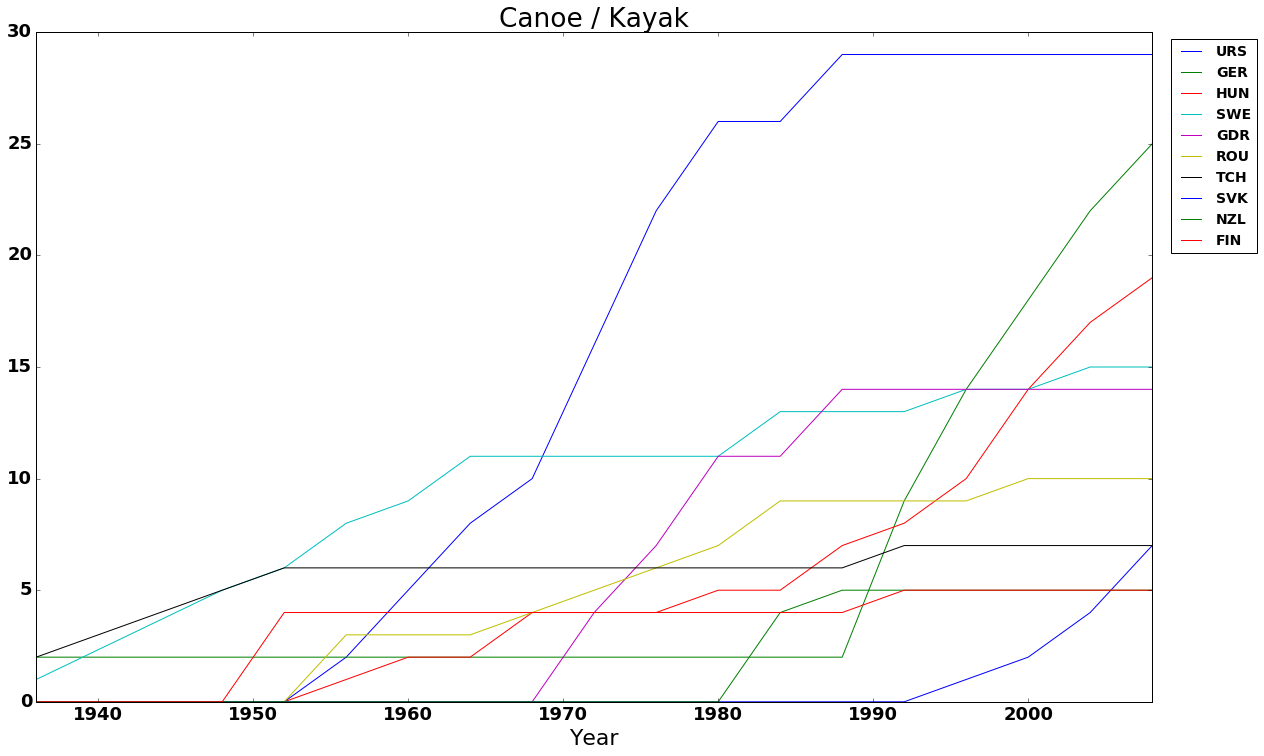

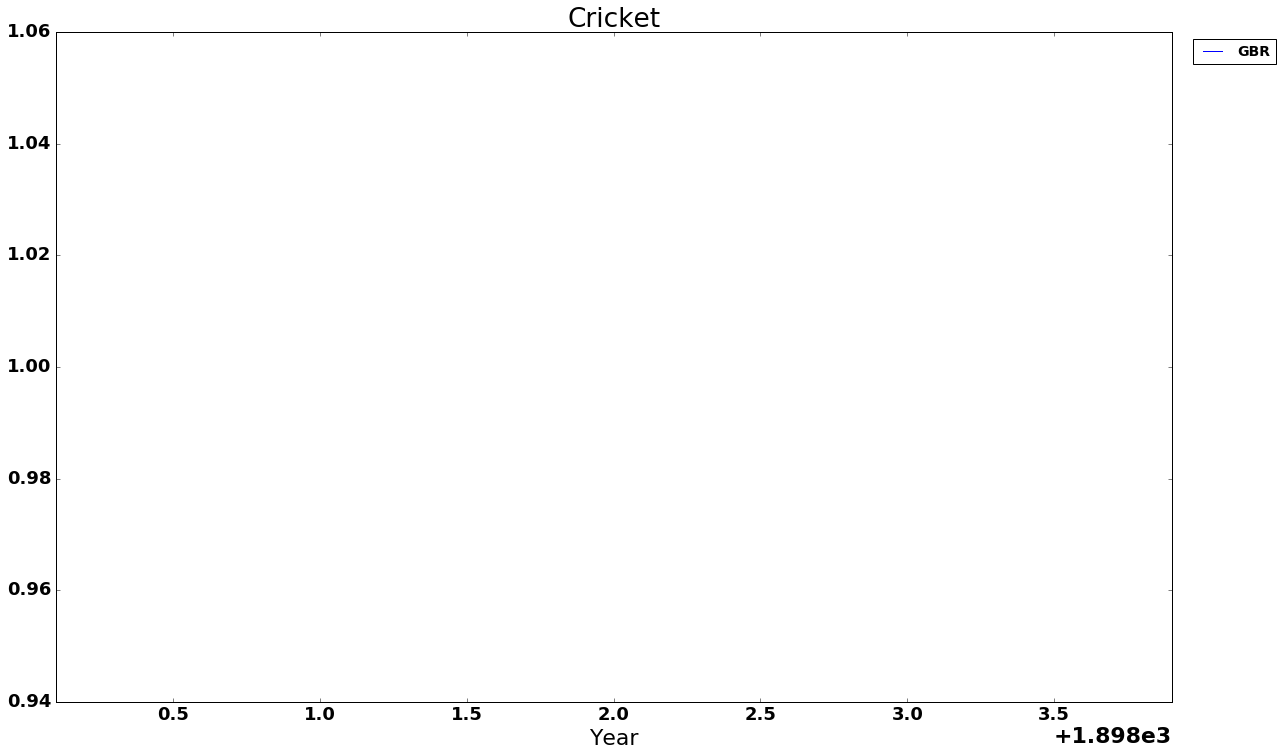

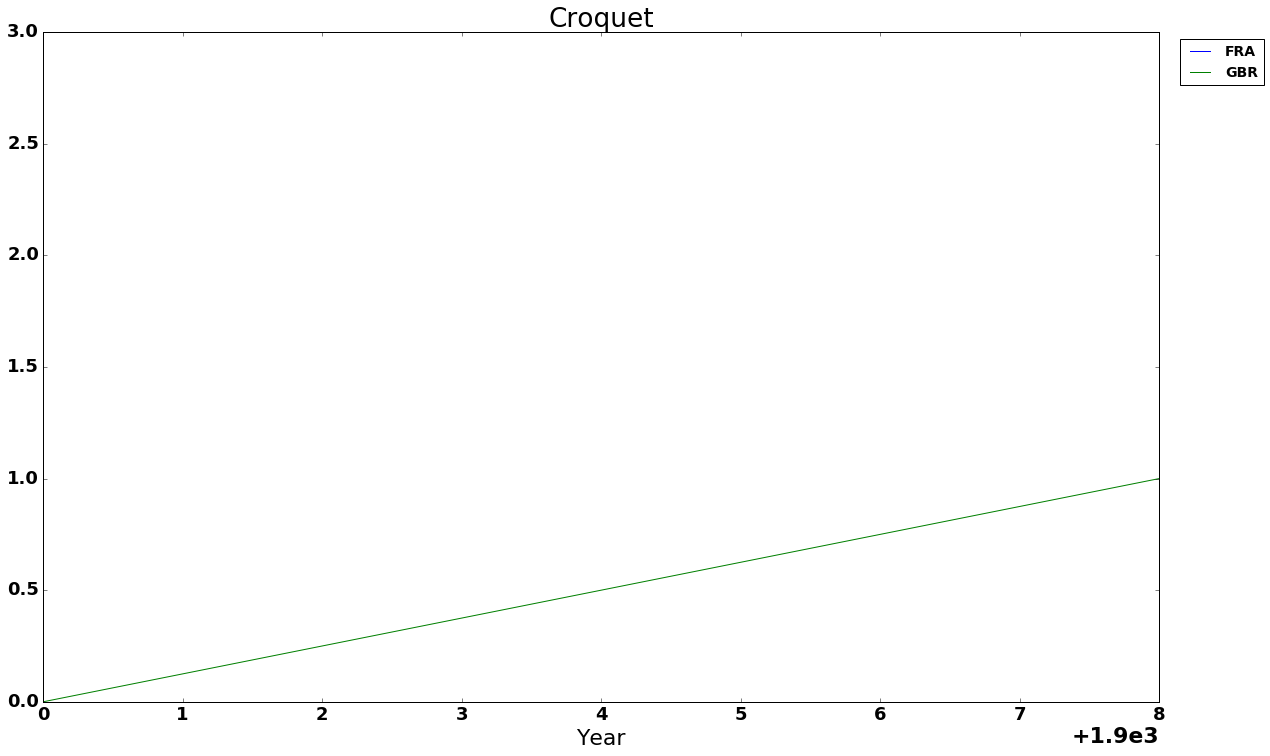

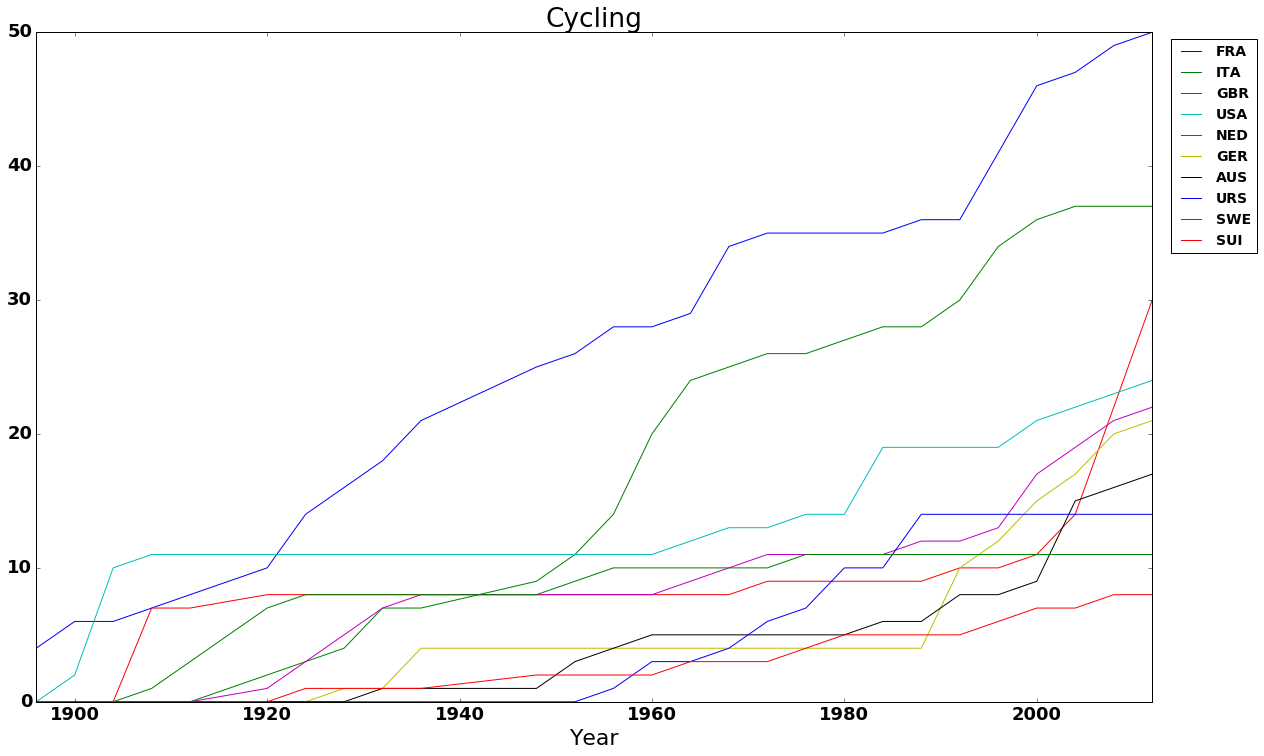

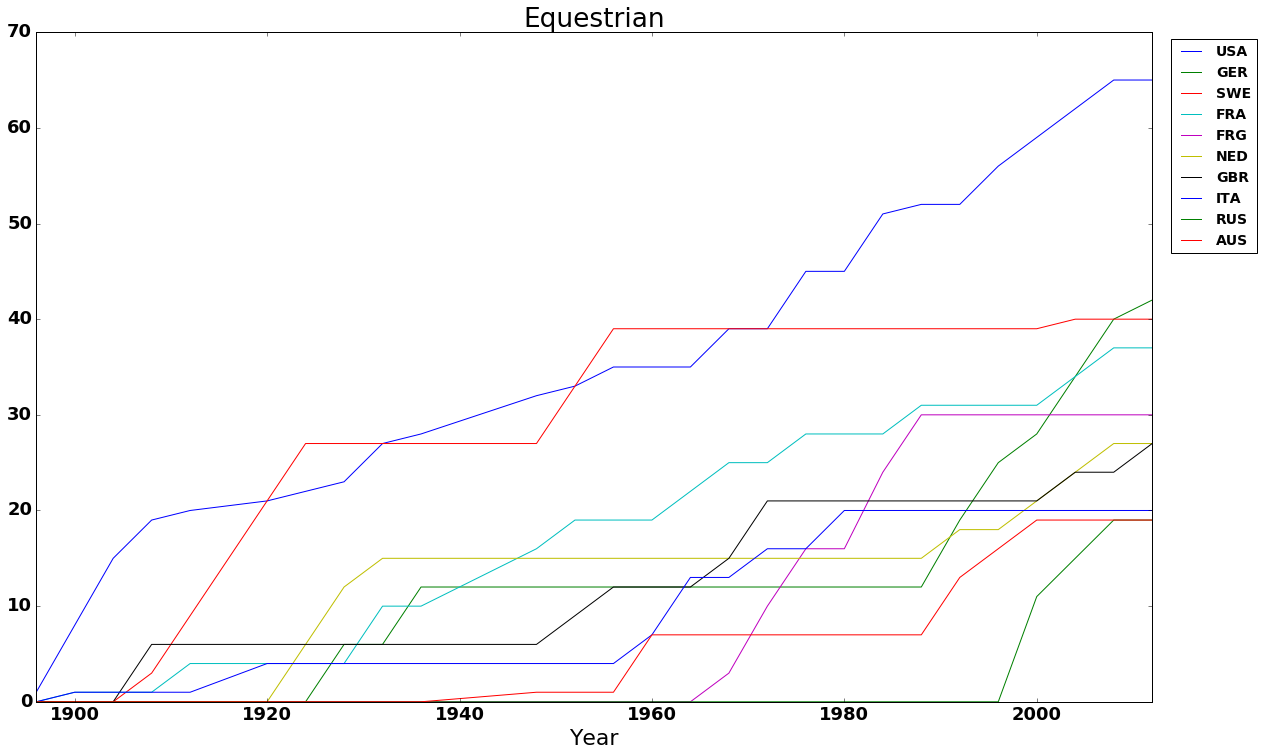

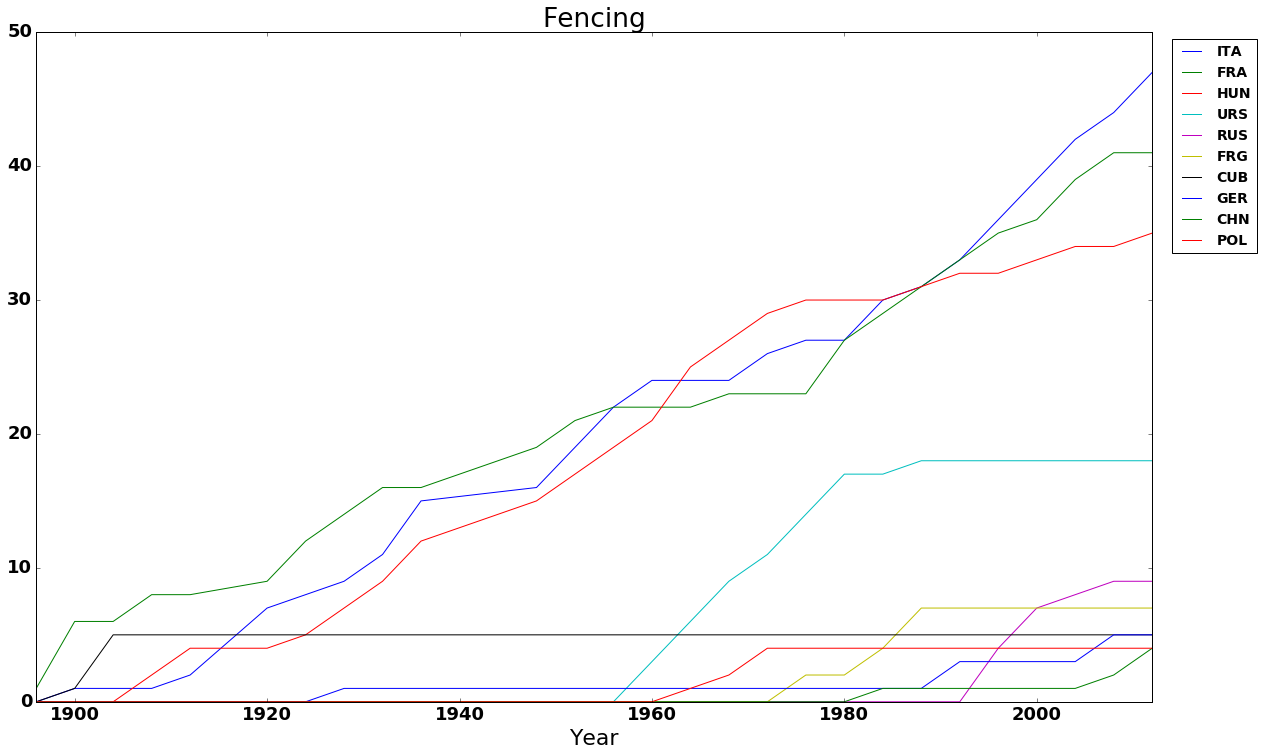

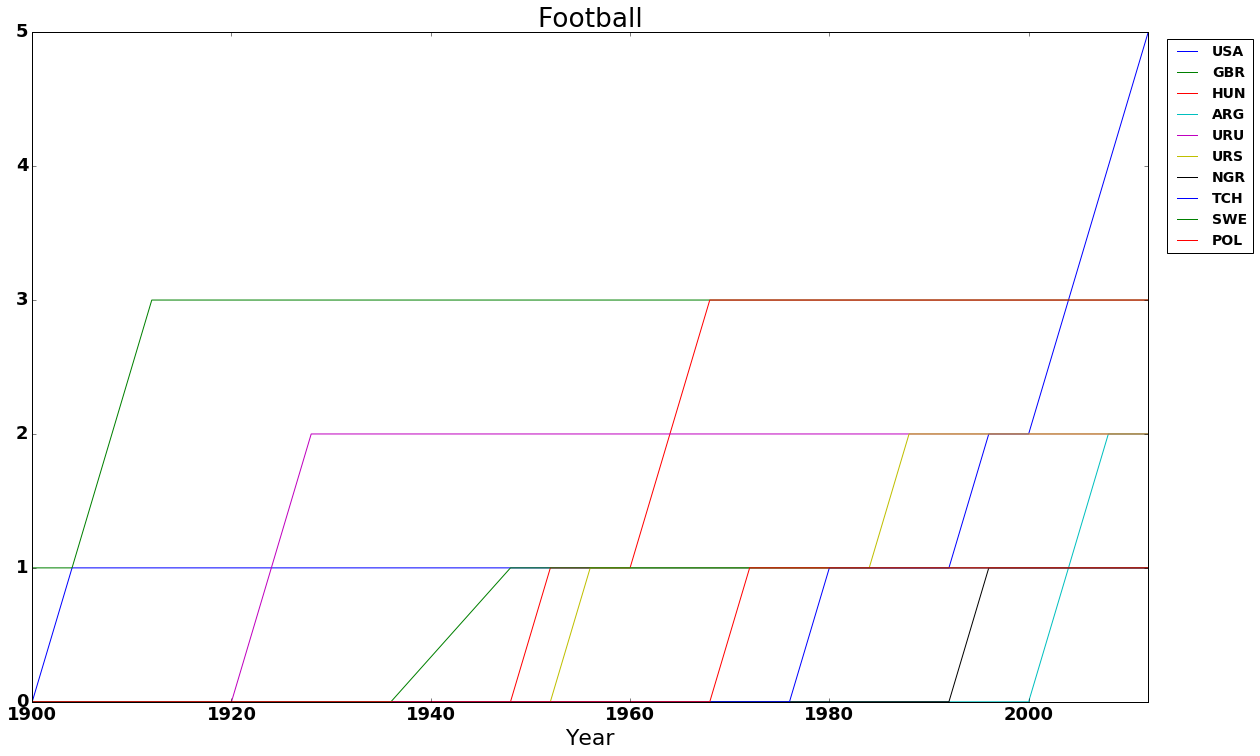

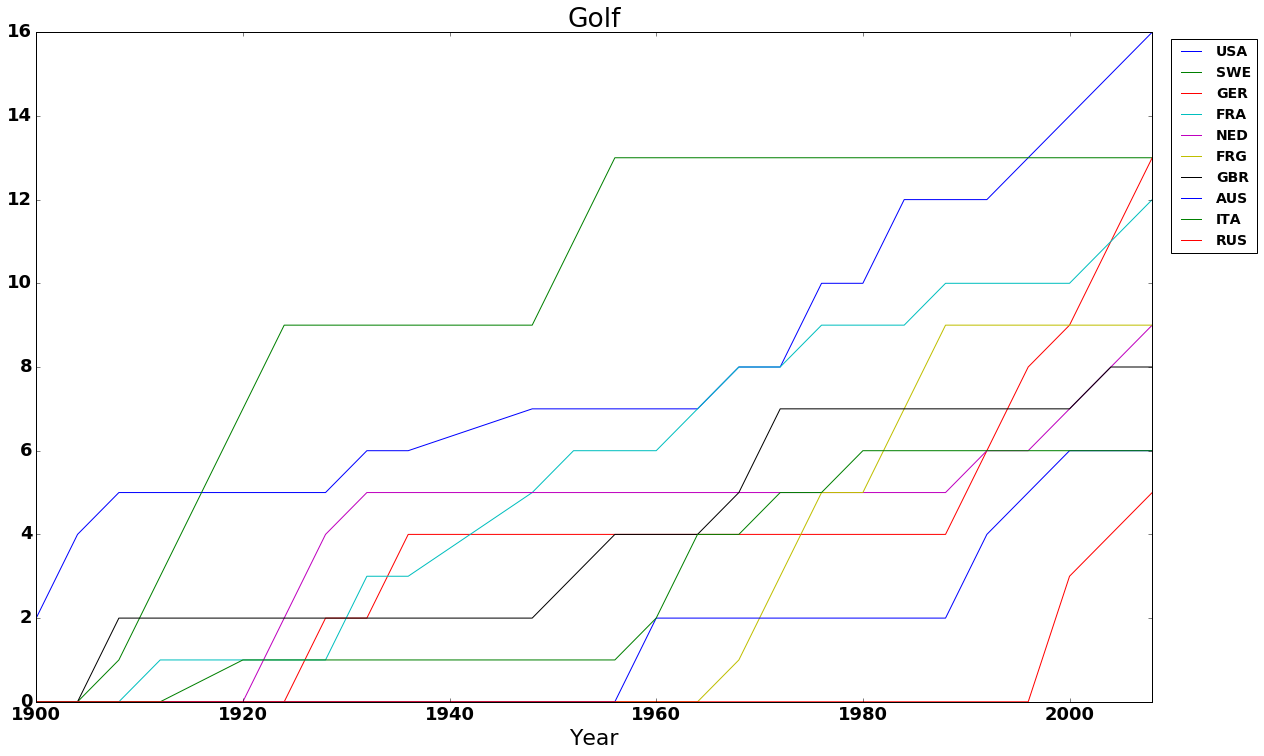

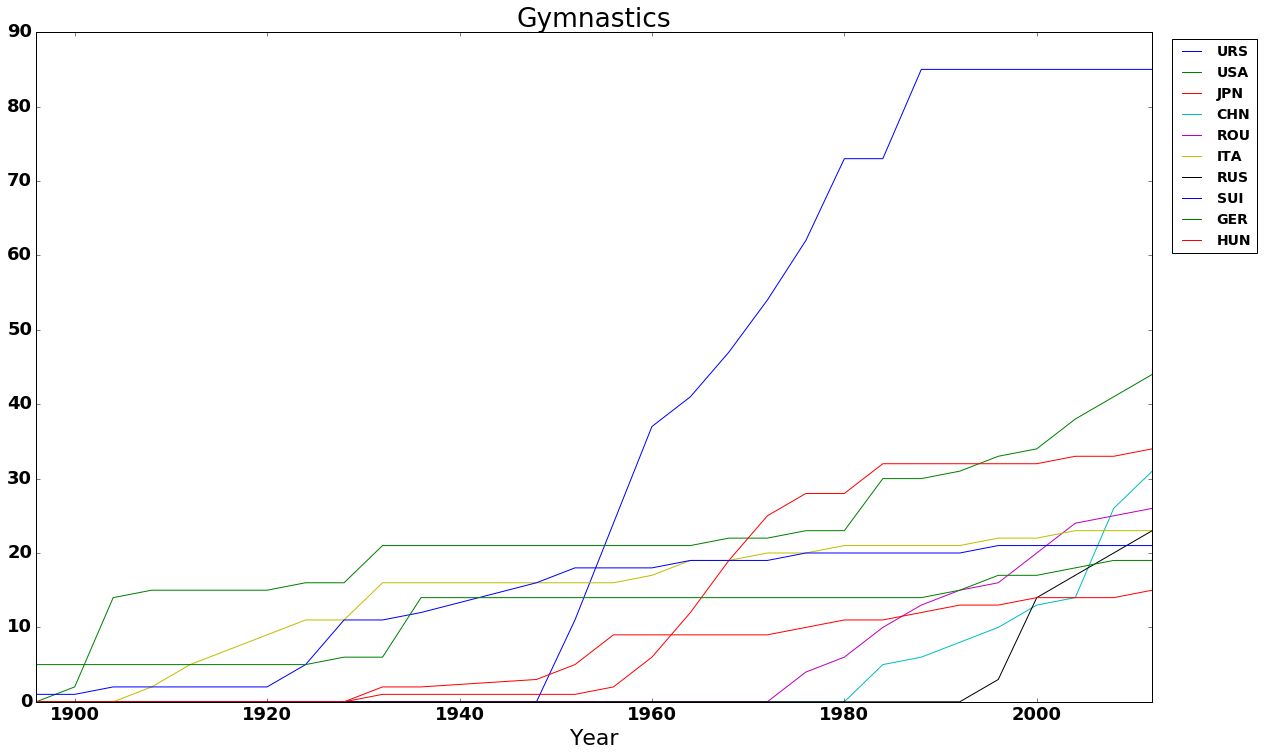

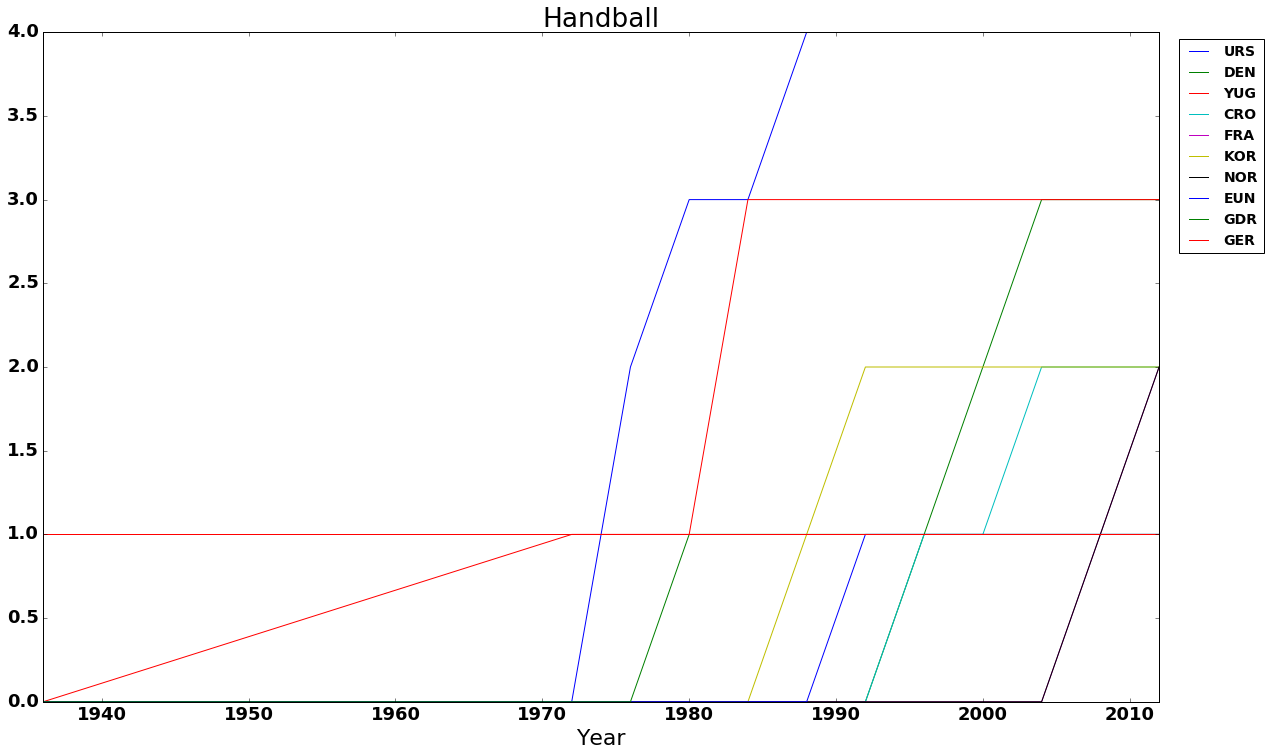

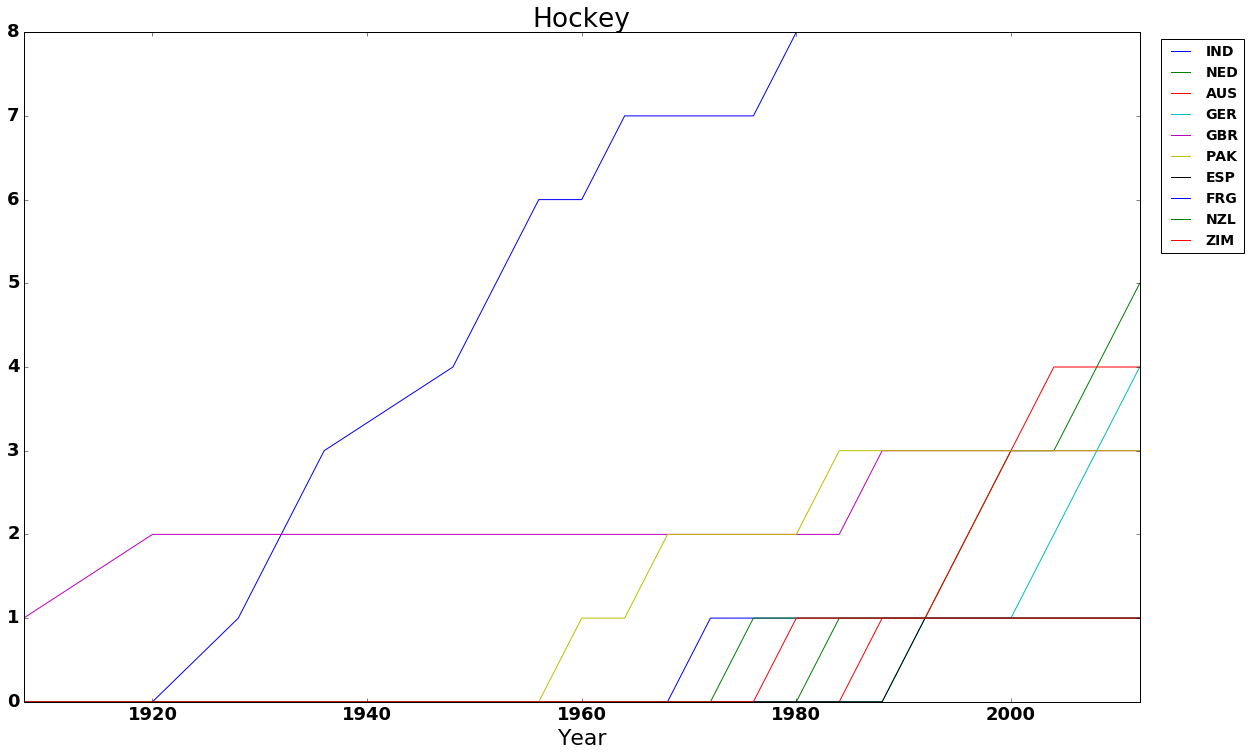

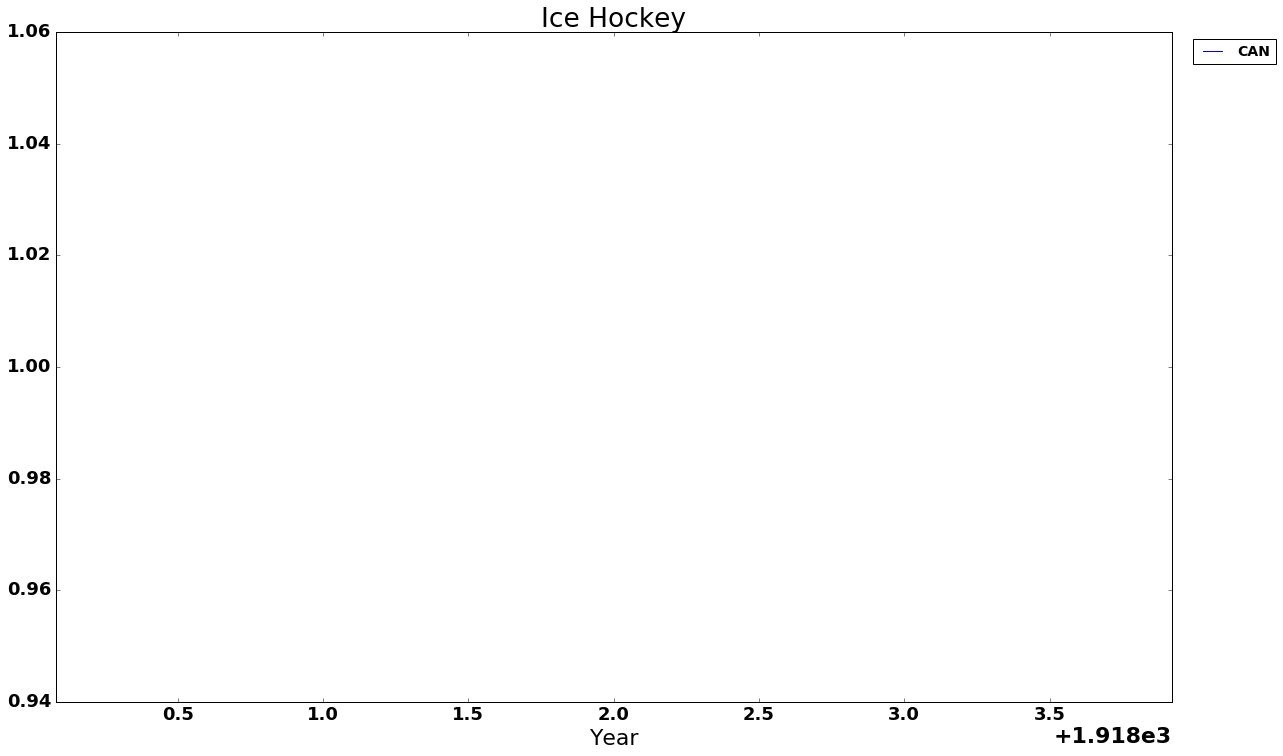

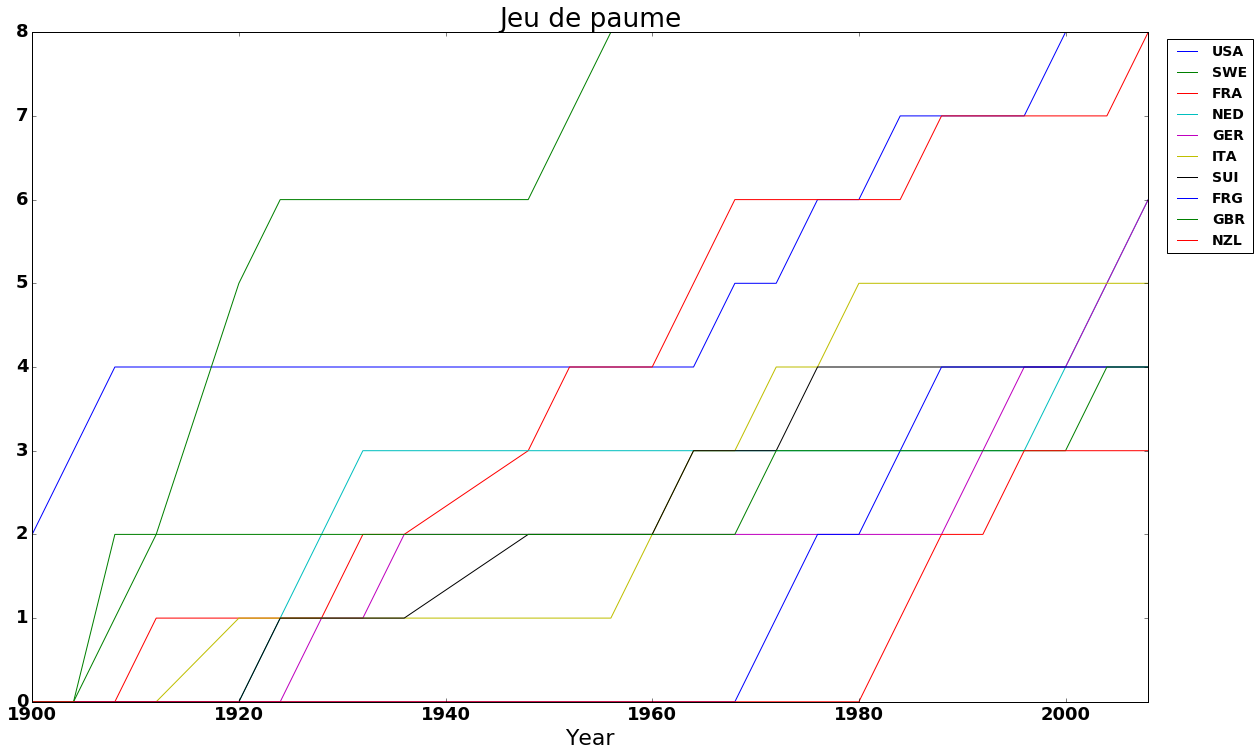

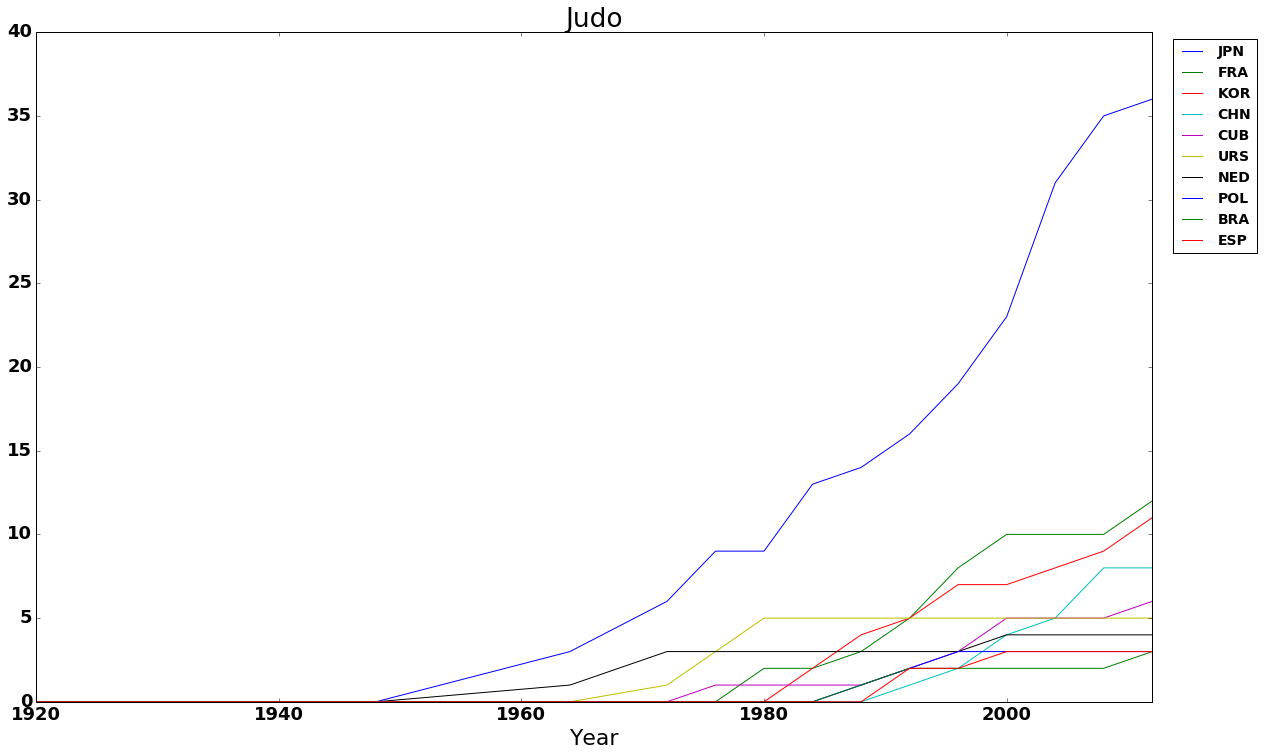

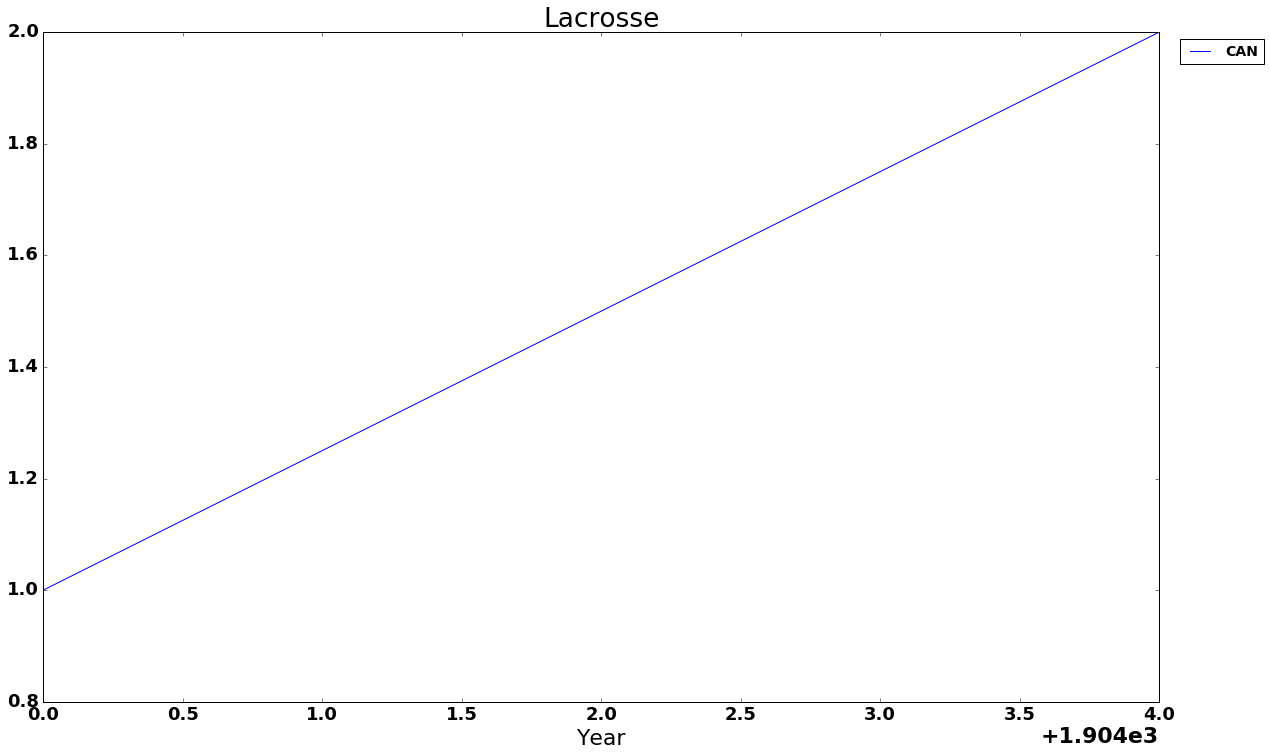

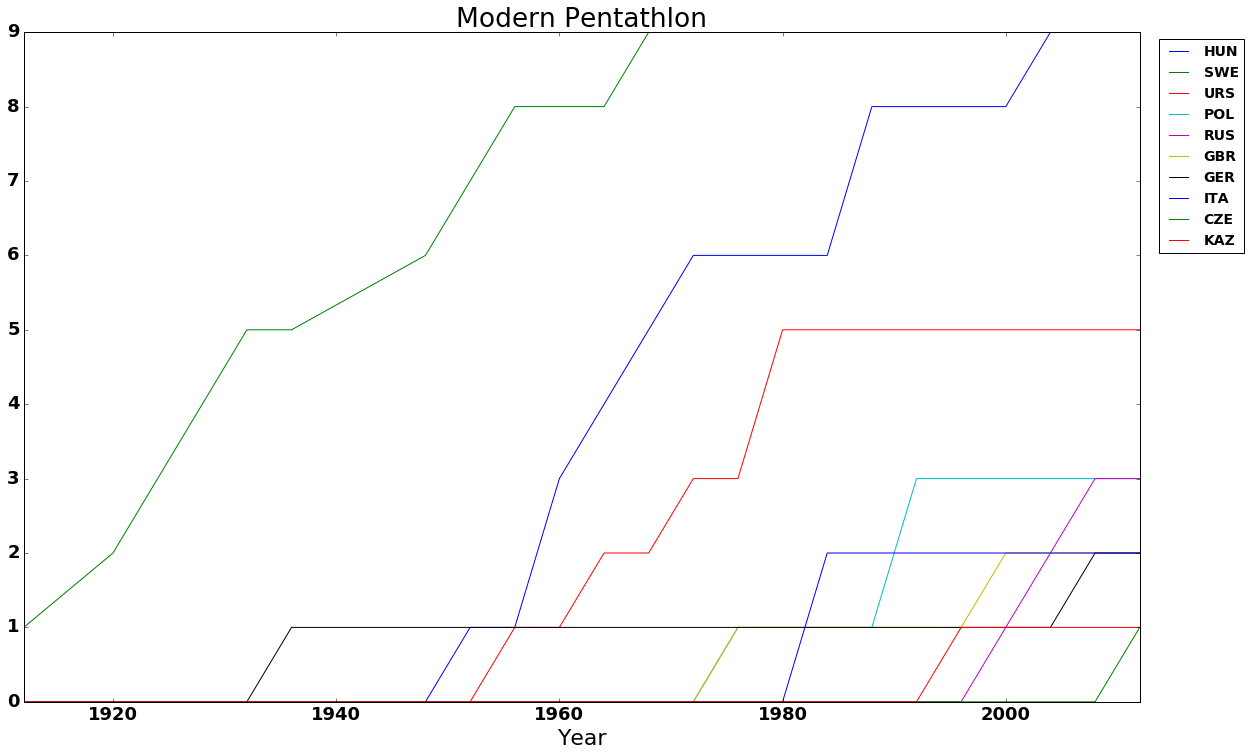

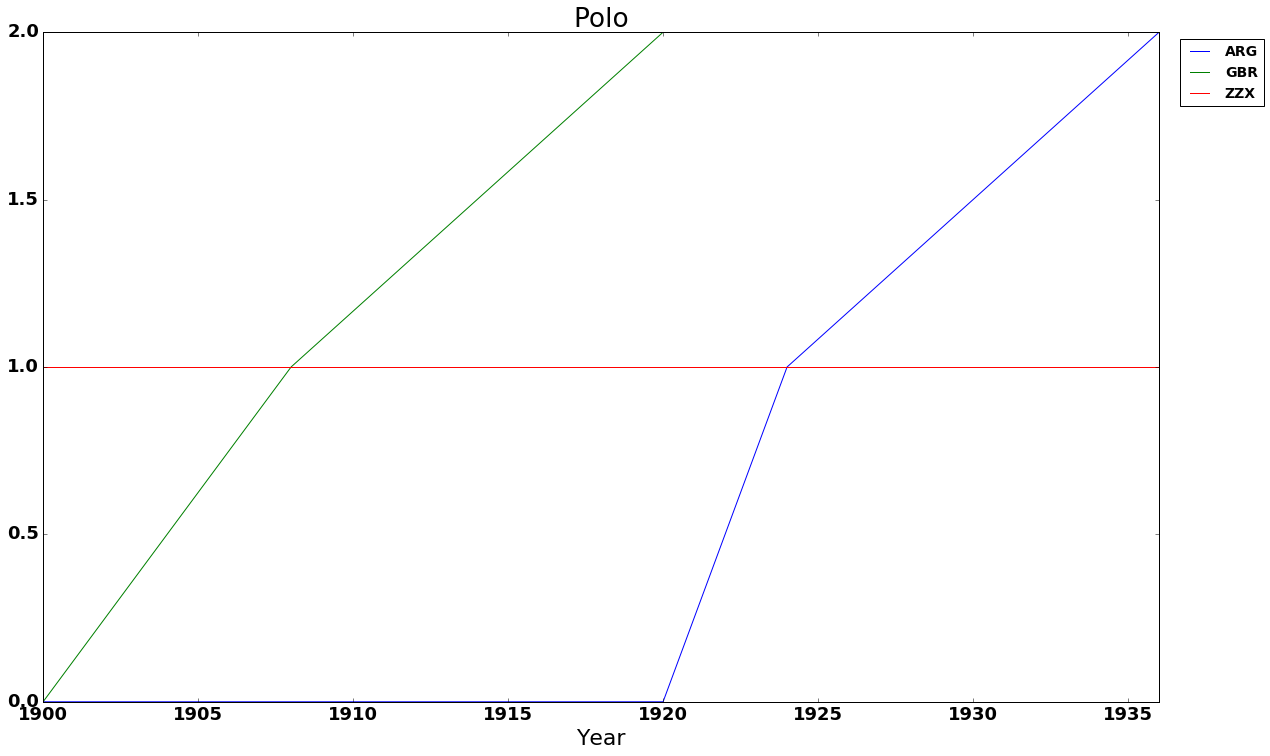

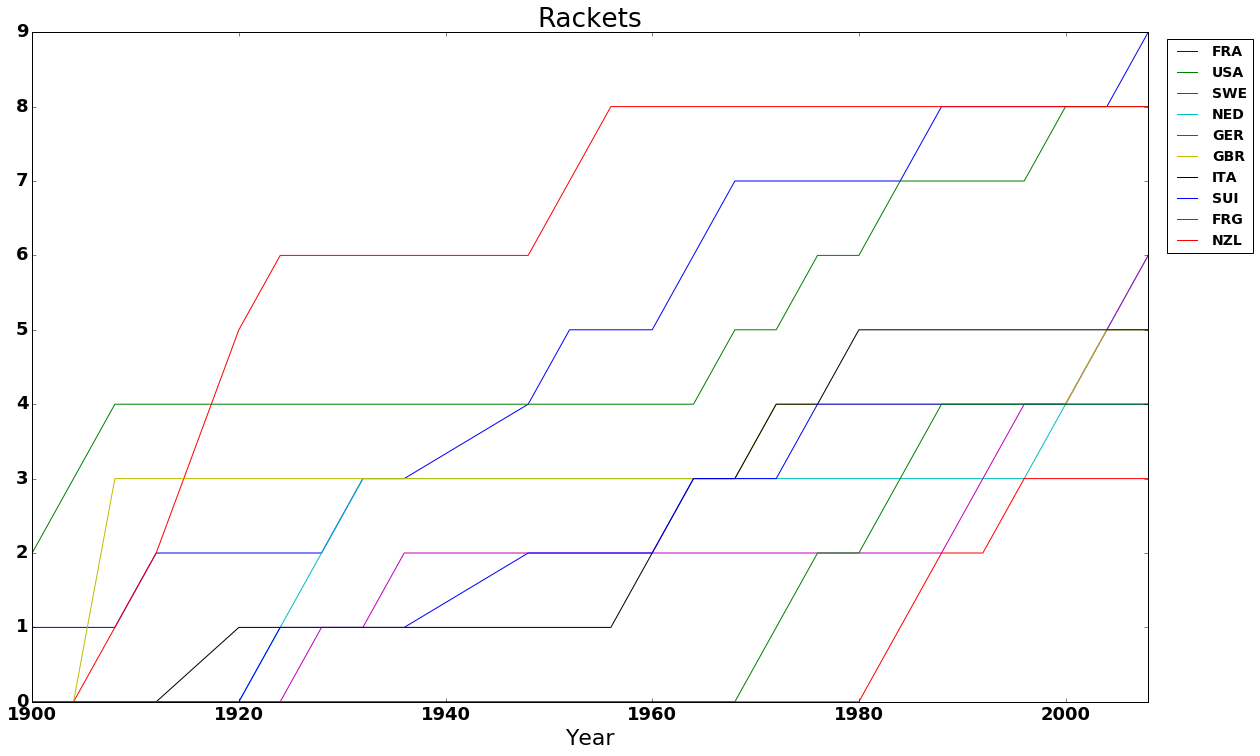

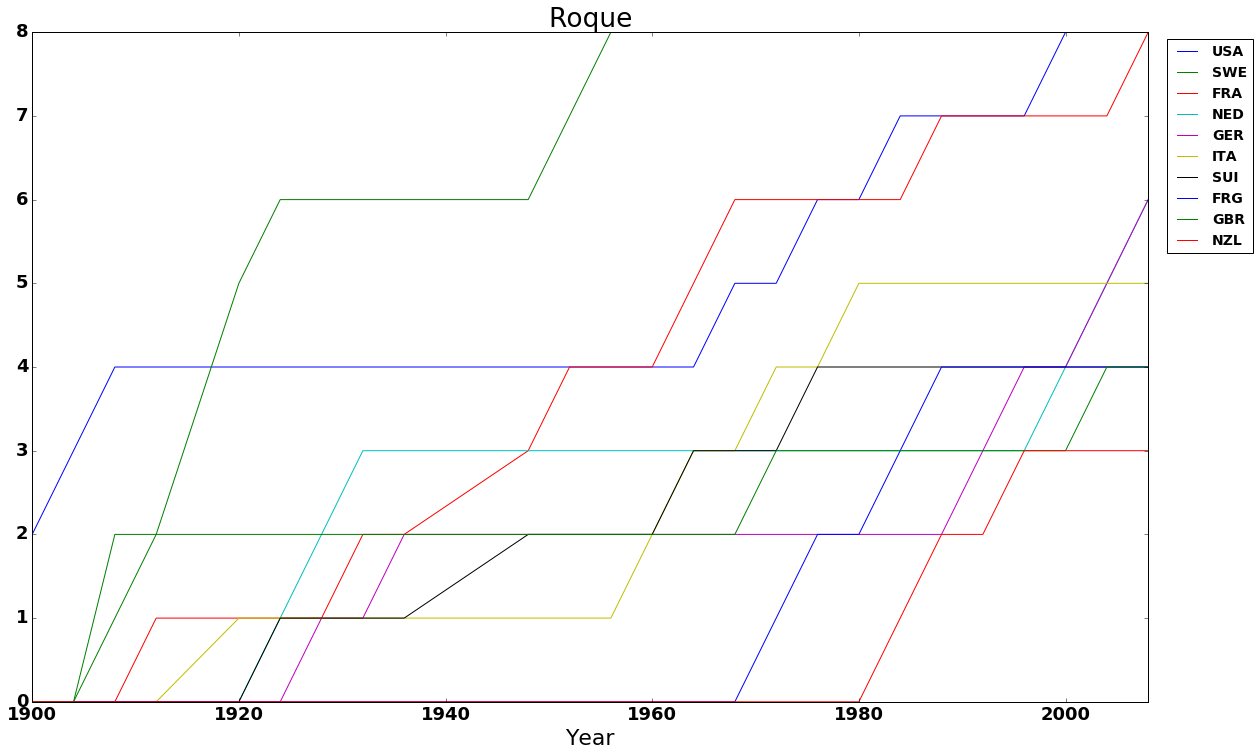

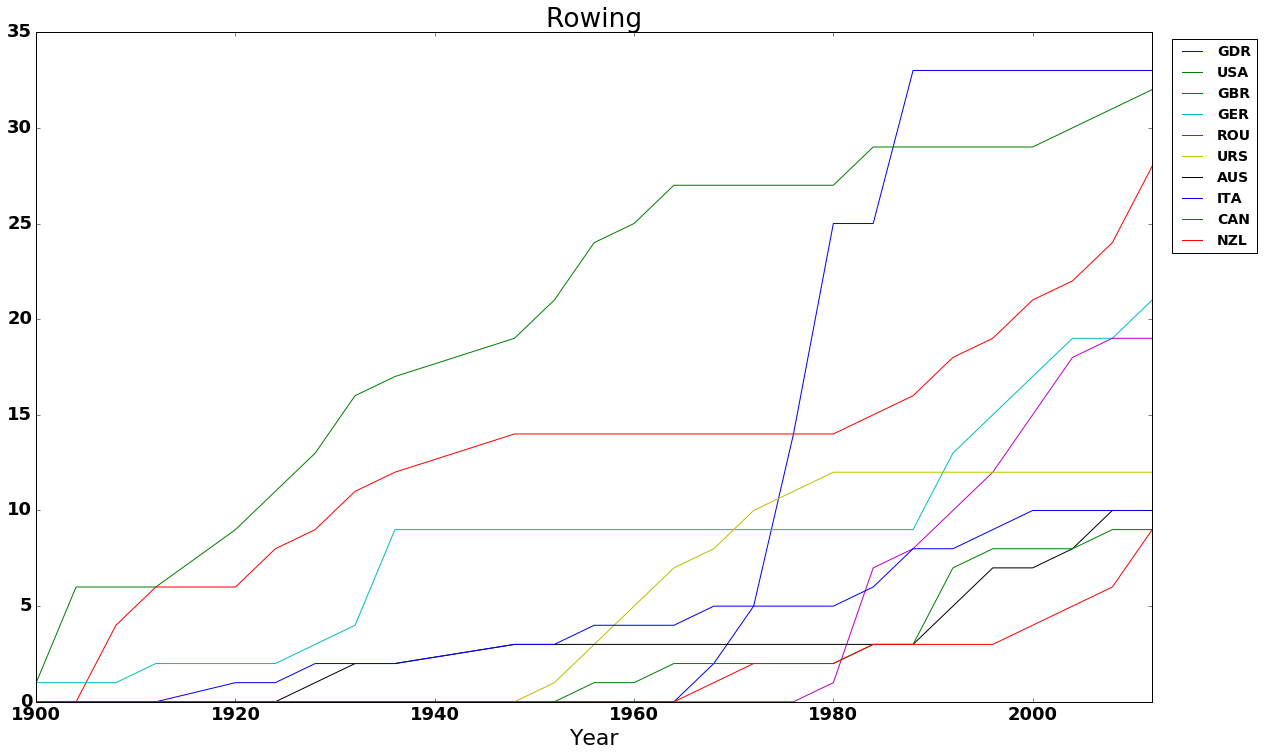

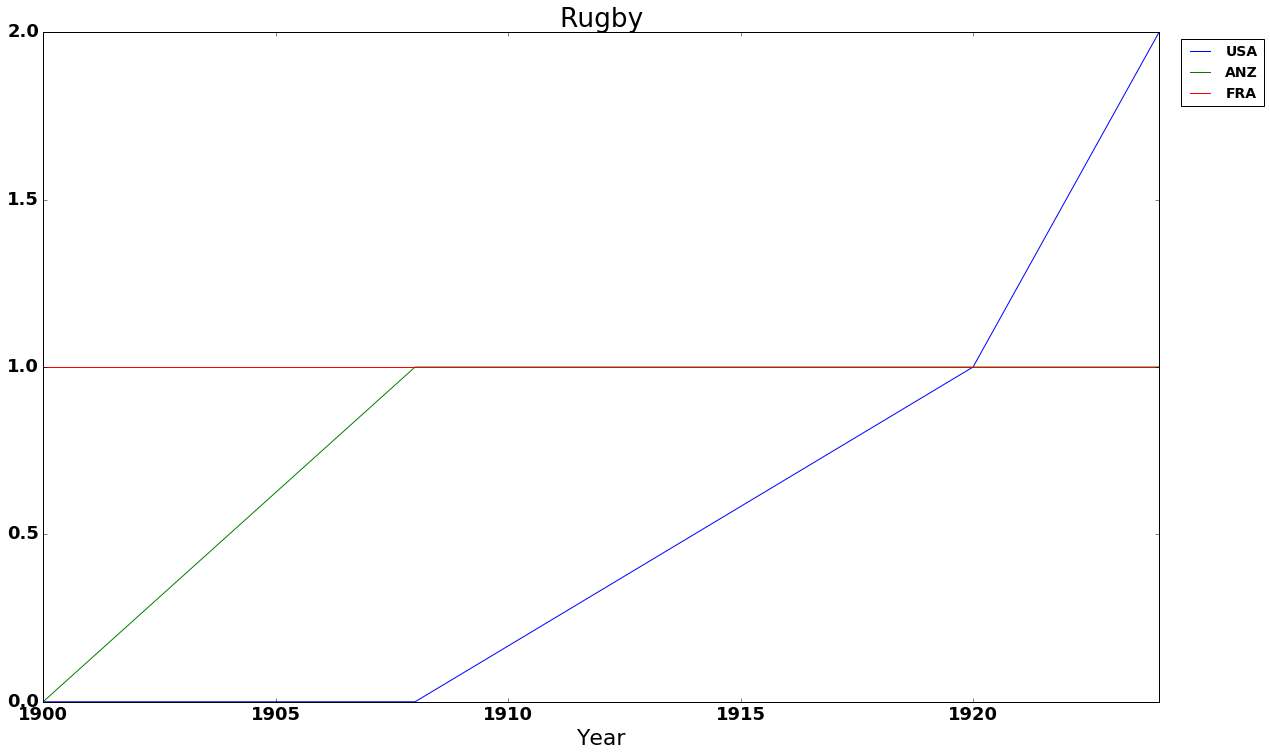

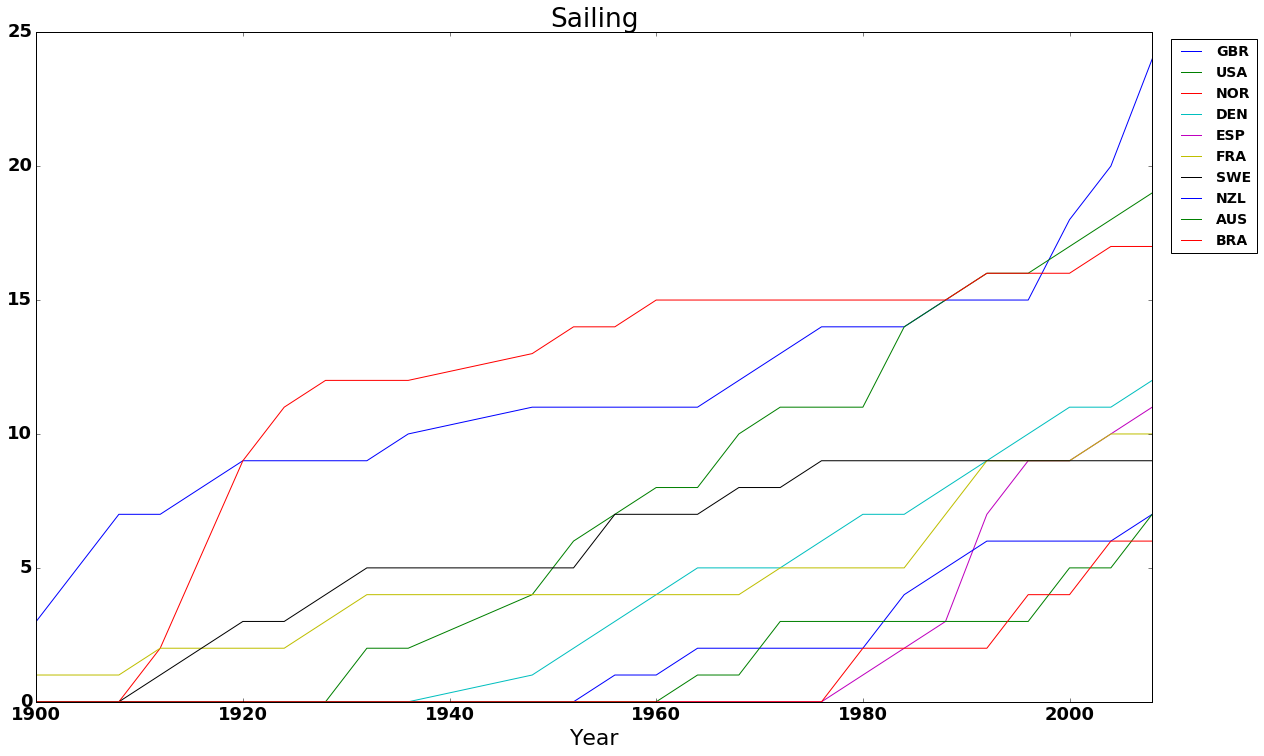

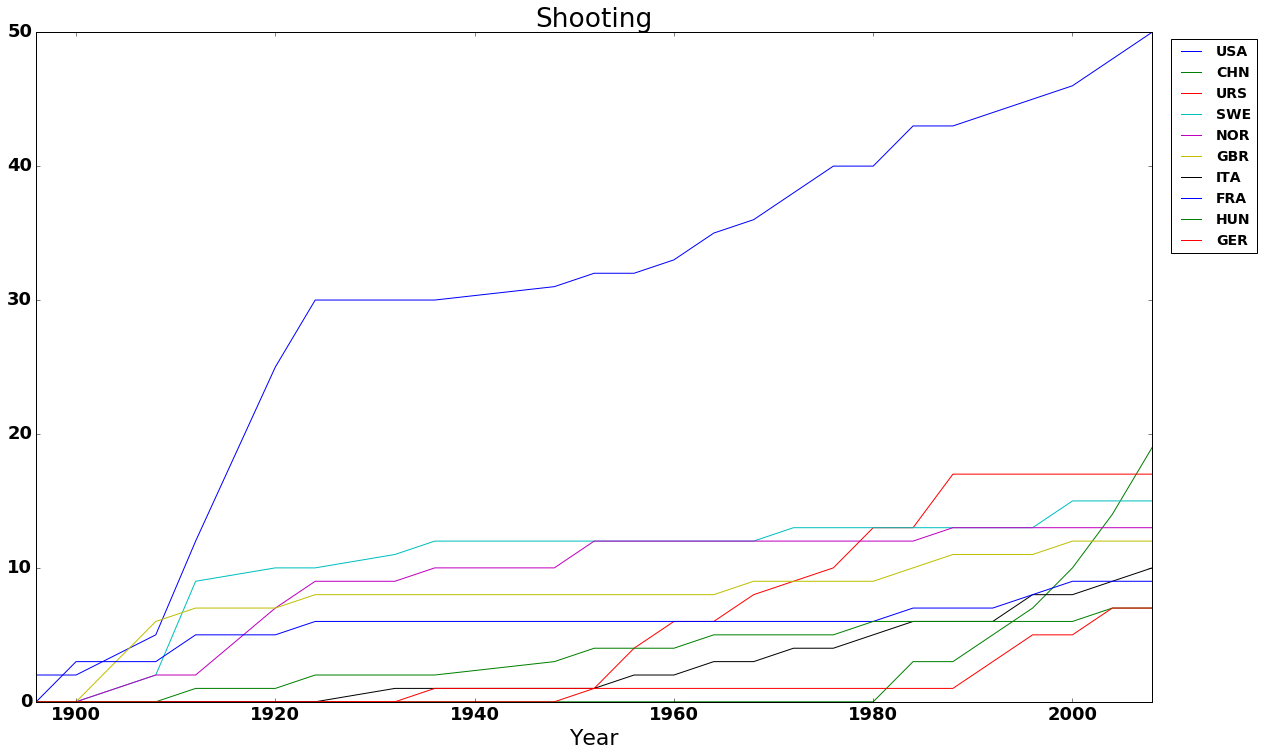

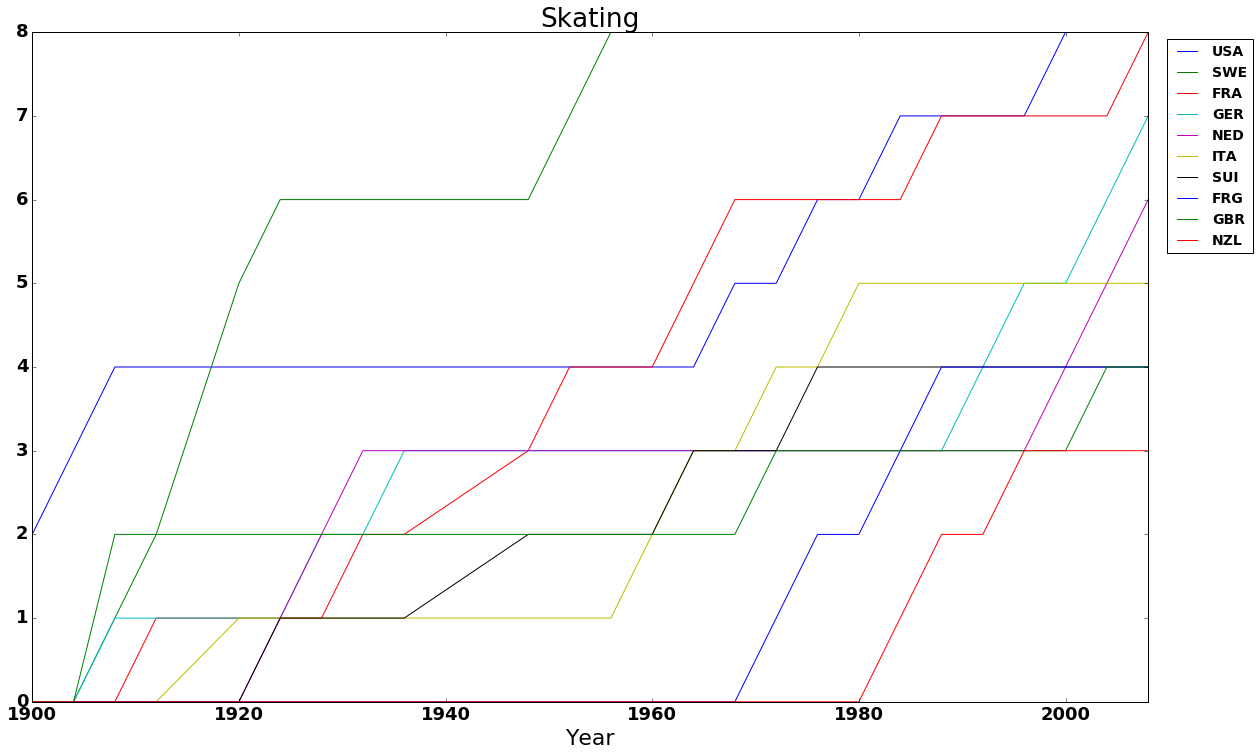

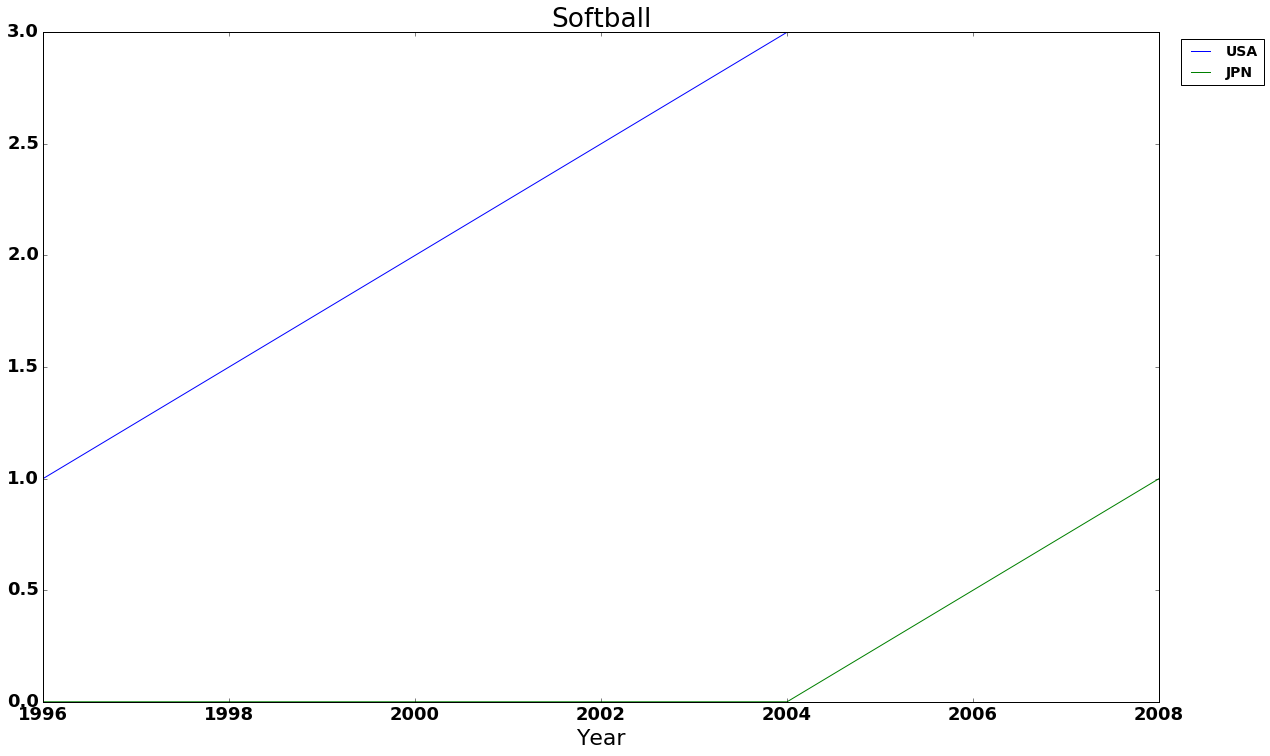

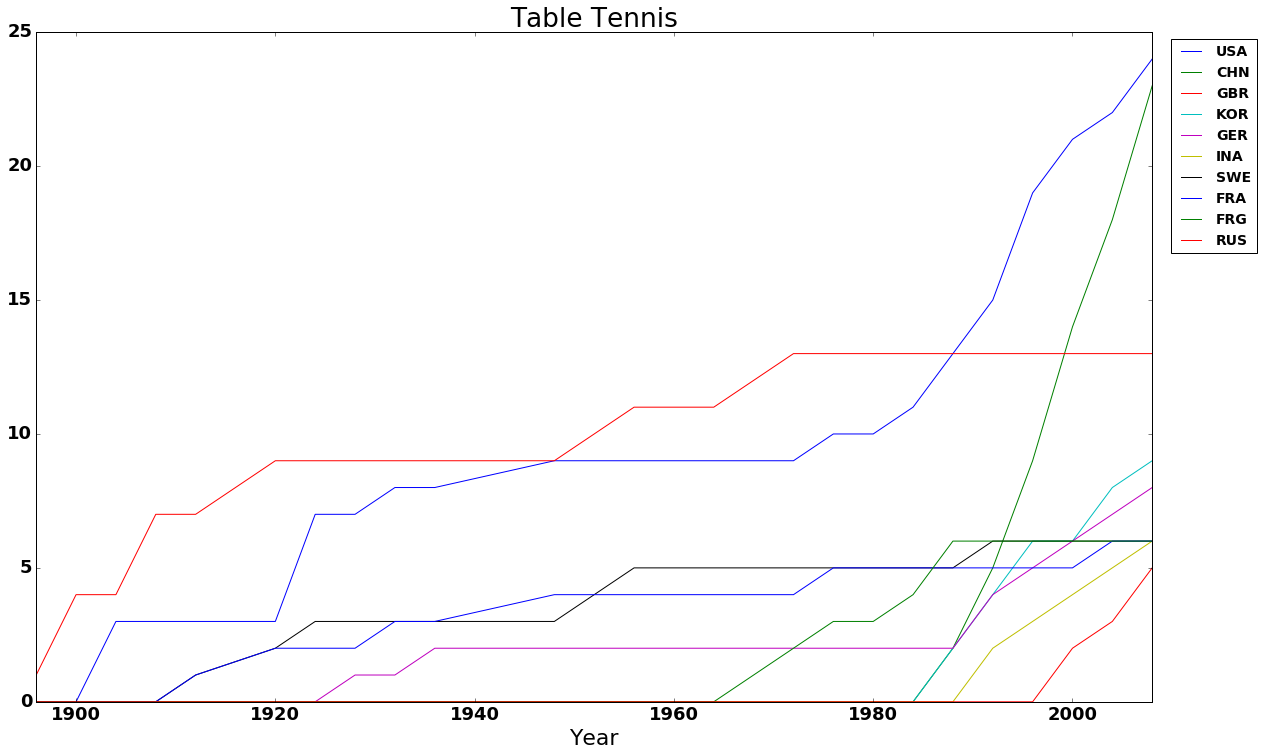

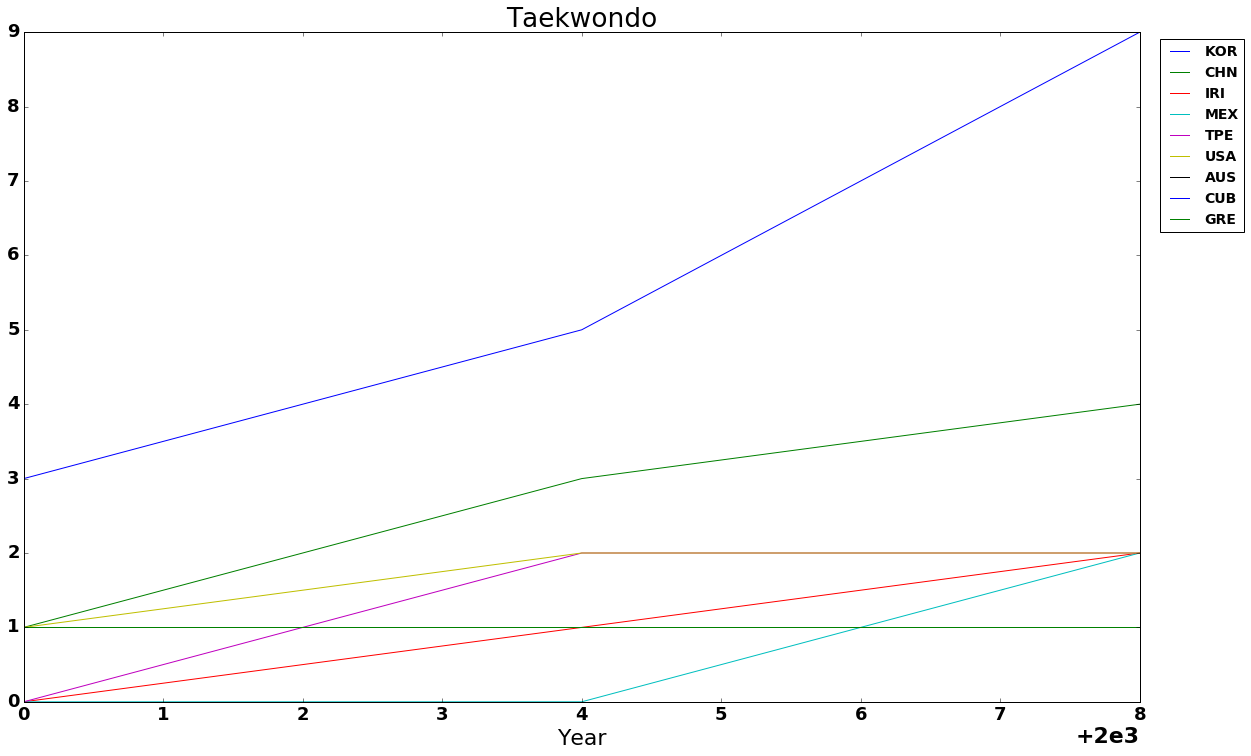

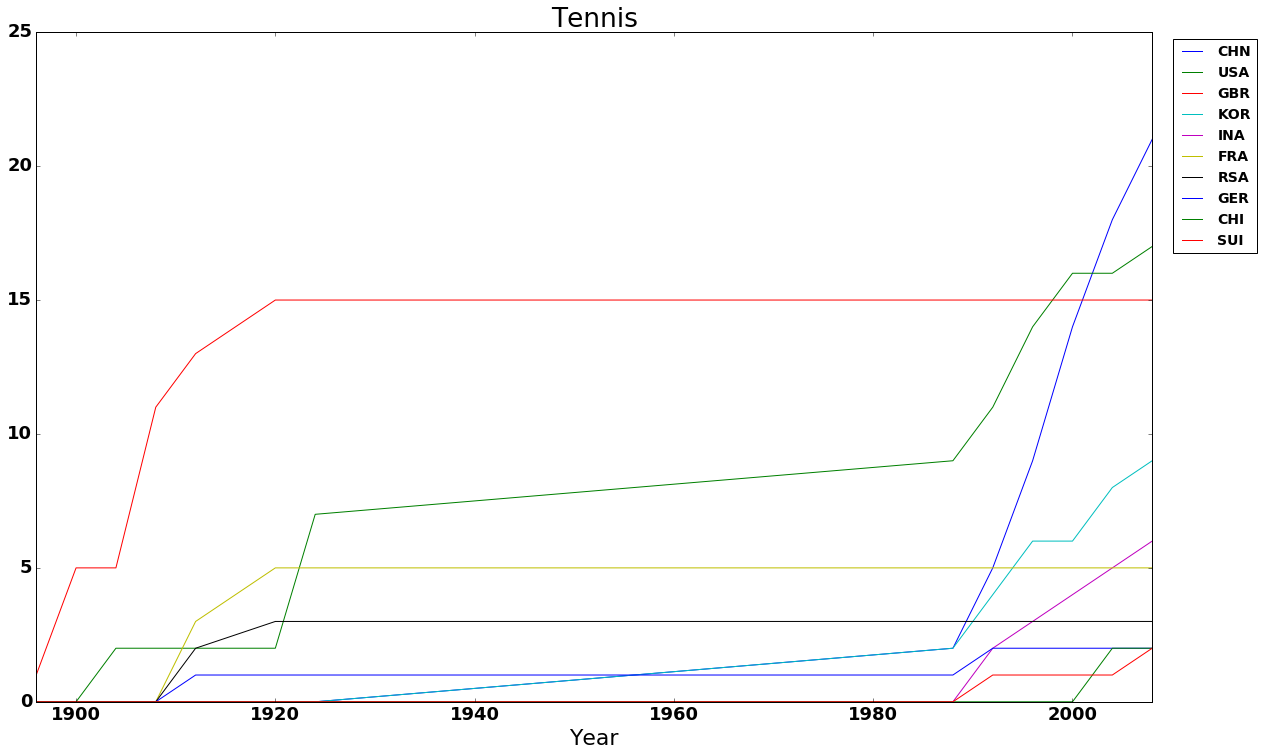

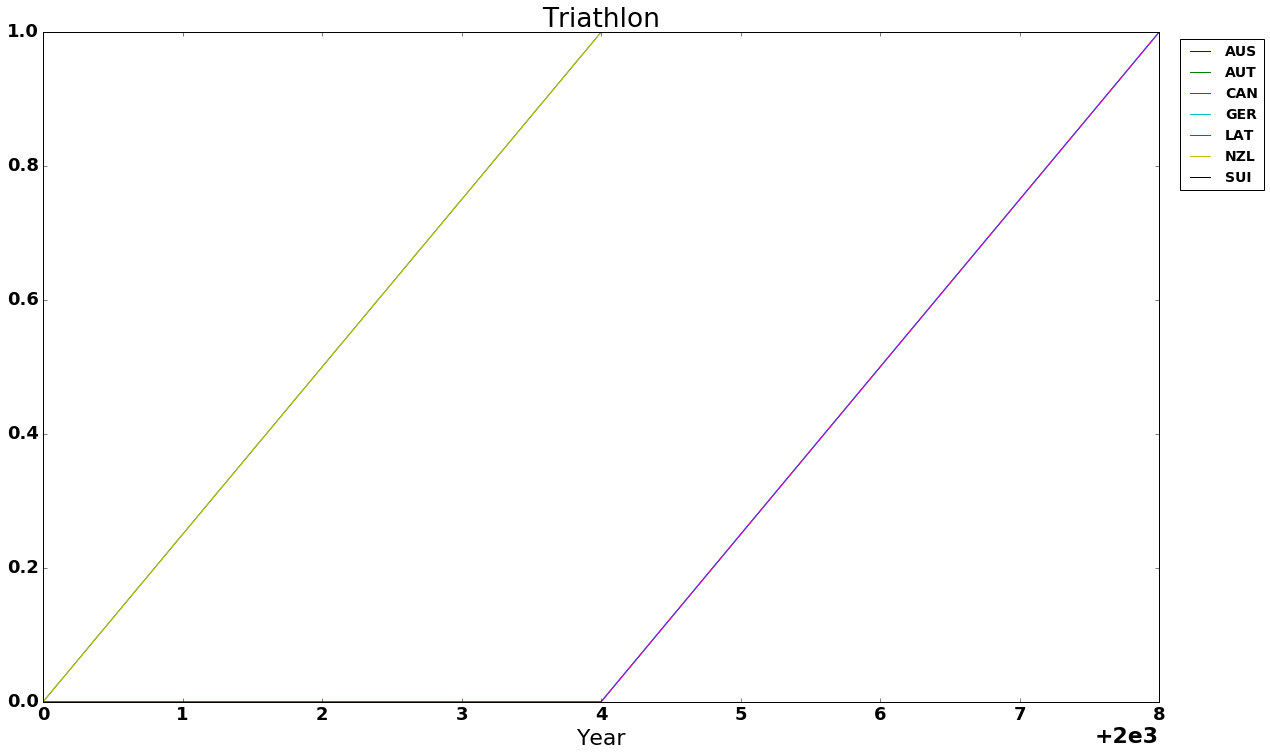

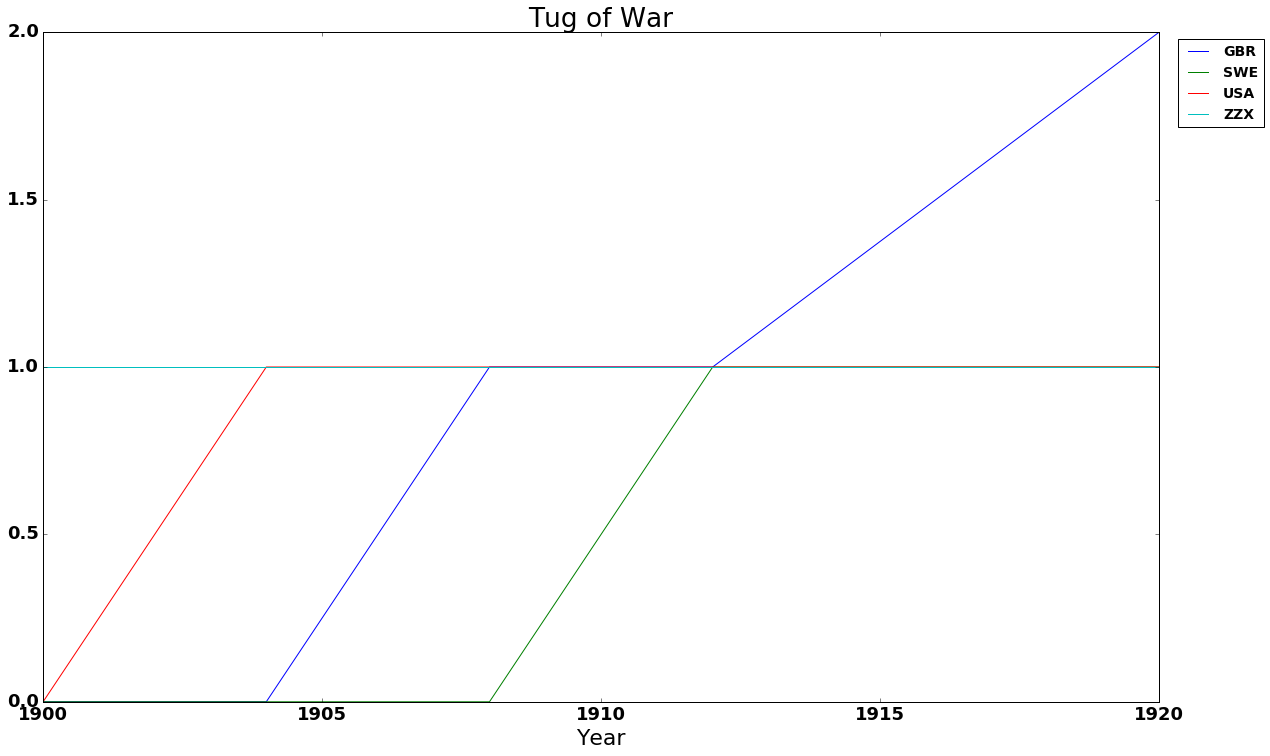

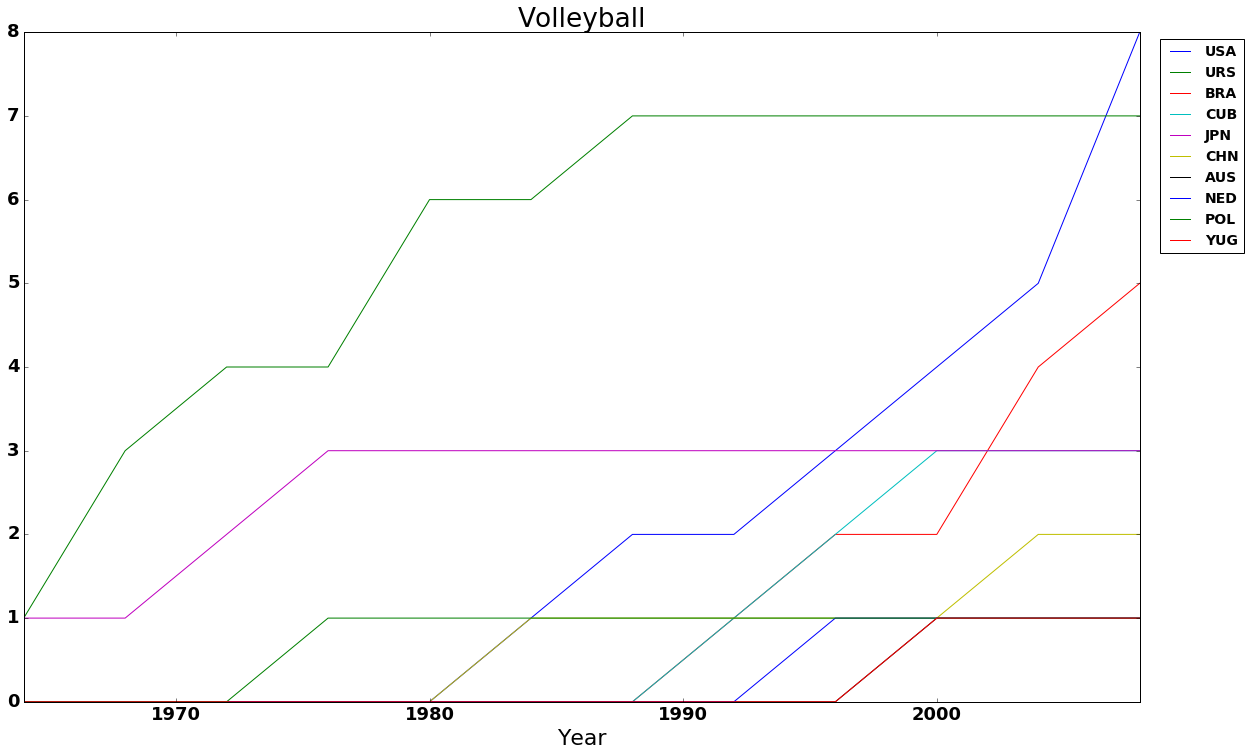

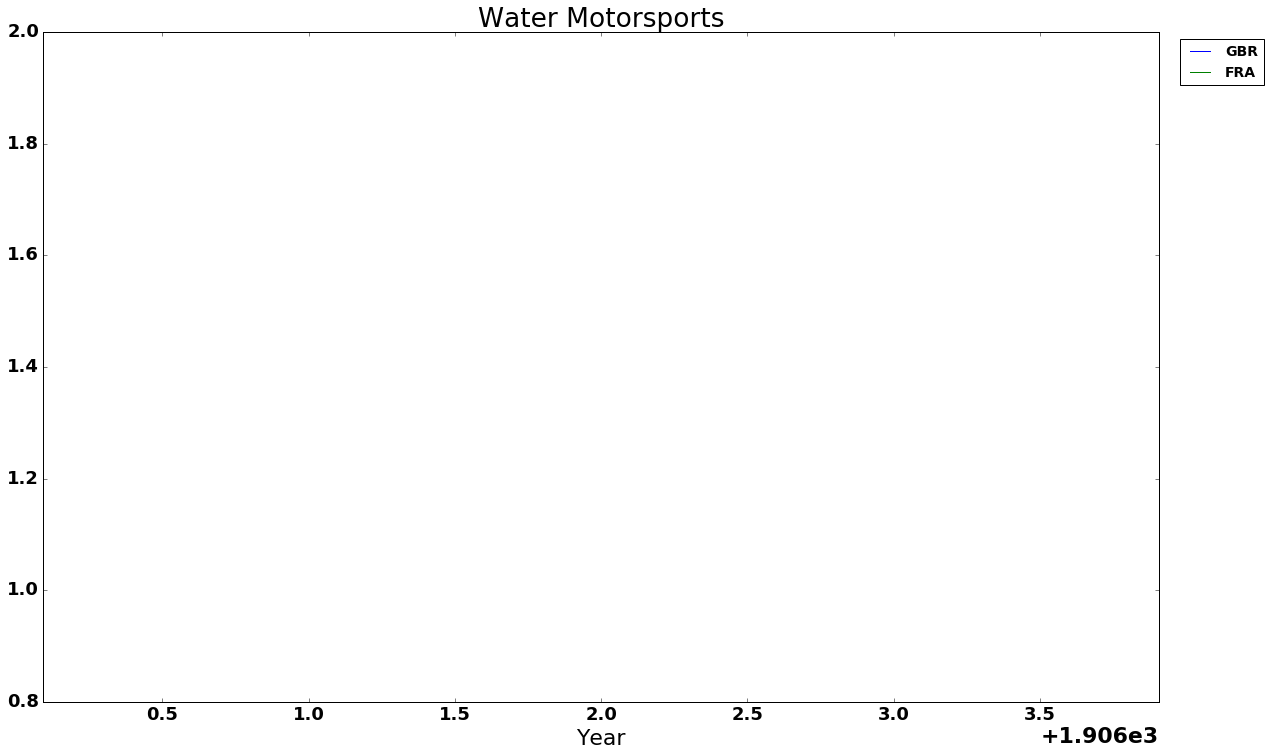

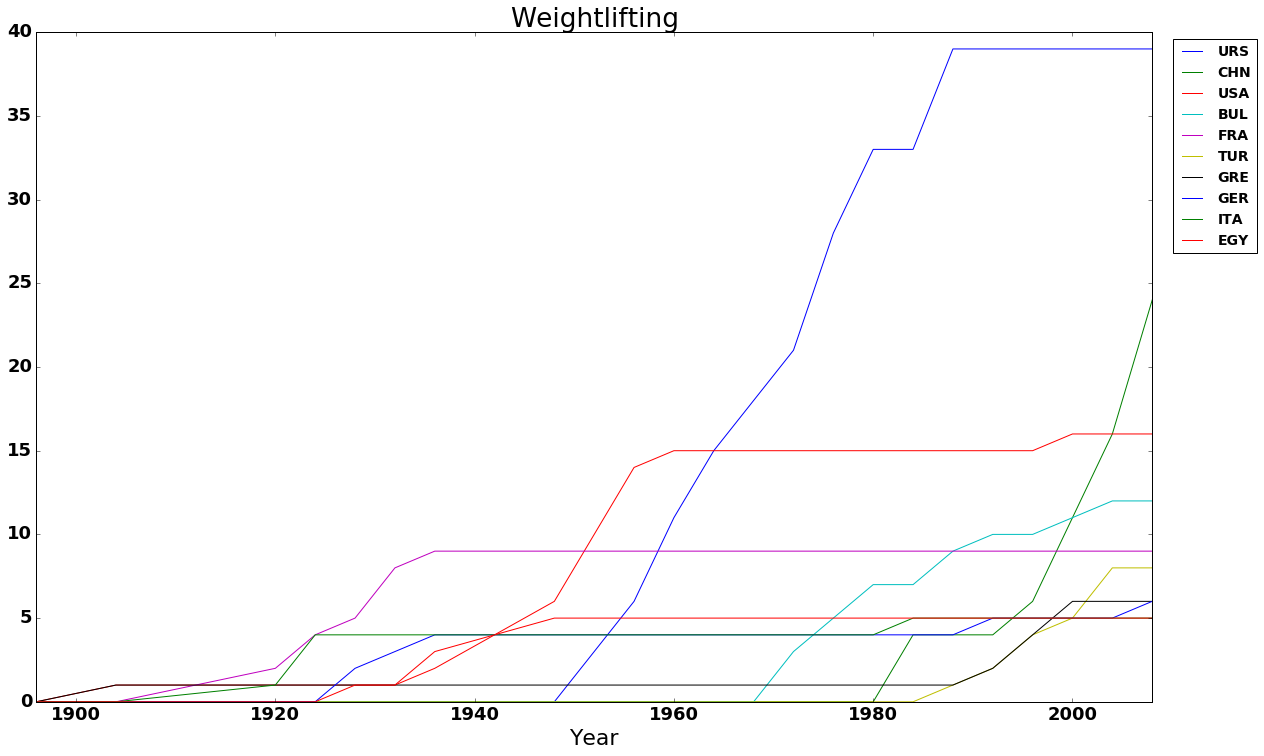

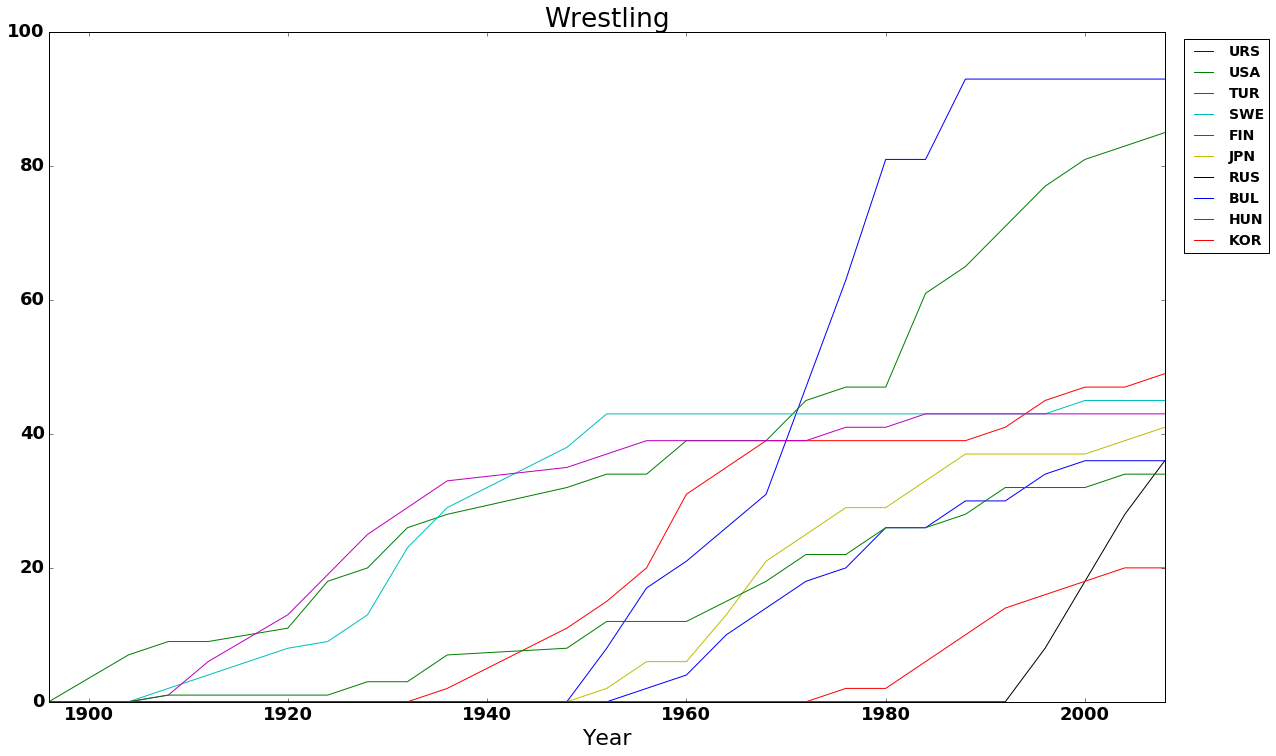

In [33]:
fig, axs = plt.subplots(1,sports_count)

sports = data.groupby(['Sport'])

for sport in sports:
    # sport_df = data[data['Sport'] == 'Weightlifting']
    sport_name = sport[0]
    sport_df = sport[1]

    # if sport_name != 'Weightlifting':
    #     continue

    # the medals in this list will be counted
    # normally only ['Gold'] or ['Gold, 'Silver', 'Bronze'] will be considered
    # medal_to_include = ['Gold', 'Silver', 'Bronze']
    
    medal_to_include = ['Gold']
    medals_we_care = sport_df[sport_df['Medal'].map(lambda x: x in medal_to_include)]

    # build the pivot table
    table = medals_we_care.drop(['Discipline', 'Event', 'Event gender', 'Sport'], 1).pivot_table(index=['NOC'], columns=['Year'], aggfunc='count')
    table = table.fillna(0).reset_index()

    # remove the multi-level columns
    new_table = table['Medal']
    # set index for as it's country name
    new_table = new_table.set_index(table['NOC'])
    # print(new_table.columns)
    
    for i, year in enumerate(new_table.columns):
        # we add a col to the next column in each loop,
        # to make a cumulative chart
        if i == (len(new_table.columns) - 1):
            continue

        next_year = new_table.columns[i+1]
        if next_year == 'NOC':
            continue

        new_table[next_year] = new_table[year] + new_table[next_year]

    new_table = new_table.sort_values(new_table.columns[-1], ascending=False)
    topten = new_table.iloc[0:10, :]

    # plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    topten.T.plot.line(figsize=(20,12), fontsize=18, title=sport_name).legend(bbox_to_anchor=(1.10, 1.0), fontsize=14)

<h1> Recent Dominance Analysis </h1>
There are some sports recently dominated by certain country, for example table tennis, badminton is dominated by China. Judo is dominated by Japan.
Try to find out here whether there are other cases like this under this section.

/Users/wangchi-an/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:32: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/wangchi-an/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:34: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Aquatics passed
Archery passed
Badminton passed
Baseball passed
Basketball passed
Fencing passed
Football passed
Handball passed
Hockey passed
Jeu de paume passed
Judo passed
Modern Pentathlon passed
Rackets passed
Roque passed
Skating passed
Softball passed
Table Tennis passed
Taekwondo passed
Tennis passed
Triathlon passed
Volleyball passed
Weightlifting passed
Wrestling passed
23


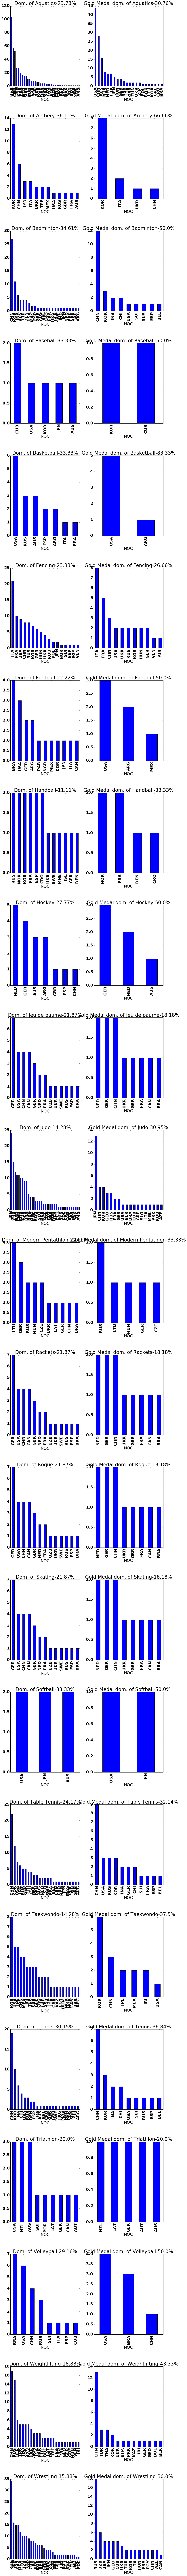

In [102]:
fig, axs = plt.subplots(23, 2, figsize=(15,250))

# print(axs)

fig.subplots_adjust(hspace = .4 )
recent_data = data[(data['Year'] >= 2004)]
plot_count = 0
pass_count = 0

for recent in recent_data.groupby('Sport'):

    recent_df = recent[1]
    dominance = recent_df.groupby(['NOC']).count()['Medal'].sort_values(ascending=False)
    
    dominance_g = recent_df[recent_df['Medal'] == 'Gold']    
    dominance_g = dominance_g.groupby(['NOC']).count()['Medal'].sort_values(ascending=False)
   
    
    # How many percent are occupied by the top country?
    # print(recent[0])
    # print(dominance[0]/sum(dominance))
    # print(dominance_g[0]/sum(dominance_g))
    # print('')
        
    if not ((dominance[0]/sum(dominance) >= 0.2) or (dominance_g[0]/sum(dominance_g) >= 0.3)):
        continue
    else:
        print(recent[0] + ' passed')
        pass_count = pass_count + 1
    
    # if the dominance is enough, we plot it.
    dominance.plot.bar( ax=axs[plot_count/2, 0], title='Dom. of ' + recent[0] + '-' + str( int(dominance[0]/sum(dominance)*10000)/100 ) + '%')

    dominance_g.plot.bar( ax=axs[plot_count/2, 1], title='Gold Medal dom. of ' + recent[0] + '-' + str( int(dominance_g[0]/sum(dominance_g)*10000)/100  )+ '%')
    
    # How many percent are occupied by the top country?
    plot_count = plot_count + 2


print(pass_count)


<h1> Simple Version of Sports Dominance Data</h1>
The blue bar charts were kind of too fancy, let's just make a simple table and show numeric data.
<font color='red'>ATTENTION: the data for this table is different from the blue bars, this one contains 2000-2012</font>

In [144]:
result_table = pd.DataFrame()

recent_data = data[data['Year'] >= 2000]
for recent in recent_data.groupby('Sport'):
    
    sport_name = recent[0]
    recent_df = recent[1]
    
    # take the top ten of total medals count
    dominance = recent_df.groupby(['NOC']).count().sort_values(['Medal'], ascending=False)
    dominance['dominance-all'] = np.around( list(dominance['Medal']/np.sum(dominance['Medal'])) , decimals=4)
    dominance = dominance[0:10]
    dominance['dominance-all'] = dominance['dominance-all']*100
    # print(dominance)
    
    # take the top ten of total gold medals count
    dominance_g = recent_df[recent_df['Medal'] == 'Gold']    
    dominance_g = dominance_g.groupby(['NOC']).count().sort_values(['Medal'], ascending=False)
    dominance_g['dominance-gold'] = dominance_g['Medal']/np.sum(dominance_g['Medal']) * 100
    dominance_g = dominance_g[0:10]
    dominance_g['dominance-gold'] = np.around(list(dominance_g['dominance-gold']), decimals=2)
    
    # Append four rows
    # 1. name of total medal counts NOC sorted by dominance
    # 2. dominance (in percentage)
    # 3. name of gold medal counts NOC sorted by gold dominance
    # 4. gold medal dominance (in percentage)
    
    result_table = result_table.append([ [sport_name] + list(dominance.index[0:10])])
    result_table = result_table.append([ [sport_name] + list(dominance['dominance-all'])])
    result_table = result_table.append([ [sport_name] + list(dominance_g.index[0:10])])
    result_table = result_table.append([ [sport_name] + list(dominance_g['dominance-gold'])])

result_table

0      1      2      3      4      5      6      7     8   \
0        Aquatics    USA    AUS    CHN    RUS    JPN    NED    FRA   GER   
0        Aquatics  23.99  13.84  11.03   6.65   5.78    4.2   3.85  3.85   
0        Aquatics    USA    CHN    AUS    RUS    NED    FRA    HUN   GER   
0        Aquatics  30.69  17.46  12.17   6.35   6.35    3.7   3.17  2.65   
0         Archery    KOR    CHN    ITA    JPN    UKR    USA    AUS   MEX   
0         Archery   37.5   12.5   8.33   6.25   6.25   6.25   4.17  4.17   
0         Archery    KOR    ITA    AUS    CHN    UKR    NaN    NaN   NaN   
0         Archery  68.75   12.5   6.25   6.25   6.25    NaN    NaN   NaN   
0       Athletics    USA    RUS    KEN    JAM    ETH    GBR    CUB   GER   
0       Athletics  16.46  11.63   6.98   6.44   5.19   3.58    3.4  2.86   
0       Athletics    USA    RUS    ETH    JAM    KEN    GBR    POL   CUB   
0       Athletics  16.85  11.41   7.07   6.52   5.98   5.43    3.8  2.72   
0       Badminton    CHN    KOR    INA    RUS    USA    DEN    CHI   ESP   
0       Badminton  33.93   12.5   8.04   5.36   5.36   4.46   3.57  2.68   
0       Badminton    CHN    INA    KOR    USA    CHI    RUS    BEL   CAN   
0       Badminton     50   8.82   8.82   8.82   5.88   5.88   2.94  2.94   
0        Baseball    CUB    KOR    USA    AUS    JPN    NaN    NaN   NaN   
0        Baseball  33.33  22.22  22.22  11.11  11.11    NaN    NaN   NaN   
0        Baseball    CUB    KOR    USA    NaN    NaN    NaN    NaN   NaN   
0        Baseball  33.33  33.33  33.33    NaN    NaN    NaN    NaN   NaN   
0      Basketball    USA    AUS    RUS    ARG    ESP    FRA    BRA   ITA   
0      Basketball  33.33  16.67   12.5   8.33   8.33   8.33   4.17  4.17   
0      Basketball    USA    ARG    NaN    NaN    NaN    NaN    NaN   NaN   
0      Basketball   87.5   12.5    NaN    NaN    NaN    NaN    NaN   NaN   
0          Boxing    CUB    RUS    KAZ    UKR    GBR    USA    ITA   THA   
0          Boxing  13.83   11.7   6.91   6.38   5.32   4.79   4.26  4.26   
0          Boxing    CUB    RUS    GBR    KAZ    CHN    THA    UKR   USA   
0          Boxing   23.4  17.02  10.64  10.64   6.38   6.38   6.38  4.26   
0           Canoe    GER    HUN    GBR    UKR    BLR    CAN    ESP   RUS   
0           Canoe  16.67   12.5   8.33   6.25   6.25   6.25   6.25  6.25   
..            ...    ...    ...    ...    ...    ...    ...    ...   ...   
0        Softball    USA    JPN    NaN    NaN    NaN    NaN    NaN   NaN   
0        Softball  66.67  33.33    NaN    NaN    NaN    NaN    NaN   NaN   
0    Table Tennis    CHN    KOR    USA    INA    RUS    GER    ESP   GBR   
0    Table Tennis  24.44  11.11   8.15   6.67   5.93   5.19    3.7   3.7   
0    Table Tennis    CHN    RUS    USA    GER    INA    KOR    CHI   AUS   
0    Table Tennis  34.15   12.2   12.2   7.32   7.32   7.32   4.88  2.44   
0       Taekwondo    KOR    TPE    USA    CHN    MEX    CUB    TUR   FRA   
0       Taekwondo     15   8.75    7.5   6.25   6.25      5      5     5   
0       Taekwondo    KOR    CHN    IRI    MEX    TPE    USA    AUS   CUB   
0       Taekwondo   37.5  16.67   8.33   8.33   8.33   8.33   4.17  4.17   
0          Tennis    CHN    KOR    INA    USA    RUS    CHI    ESP   FRA   
0          Tennis  30.93   13.4   9.28   6.19   5.15   4.12   3.09  3.09   
0          Tennis    CHN    INA    KOR    USA    CHI    RUS    BEL   CAN   
0          Tennis  41.38  10.34  10.34  10.34    6.9    6.9   3.45  3.45   
0       Triathlon    AUS    NZL    SUI    USA    CAN    GER    AUT   CZE   
0       Triathlon  19.05  14.29  14.29  14.29   9.52   9.52   4.76  4.76   
0       Triathlon    AUS    AUT    CAN    GER    LAT    NZL    SUI   NaN   
0       Triathlon  14.29  14.29  14.29  14.29  14.29  14.29  14.29   NaN   
0      Volleyball    BRA    USA    RUS    CHN    CUB    ITA    AUS   ESP   
0      Volleyball  30.56  19.44  13.89  11.11   5.56   5.56   2.78  2.78   
0      Volleyball    USA    BRA    AUS    CHN    CUB    YUG    

In [146]:
result_table.to_csv('generated data/olympics-domination.csv', index=False)